Generative Adversarial Networks (GANs) are generative models. They are uses unsupervised technique to generate new things. GAN models learns pattern in input data in such a way that they can generate new sample which resemble with the input data. The main aim of generative adversarial network is to match generated distribution with the original data distribution.

GANs are an exciting and rapidly changing field, delivering generative models ability to generate realistic examples across a range of problem domains, most notably in image-to-image translation tasks such as translating photos of summer to winter or day to night,coloring images and in generating fake photos that even human cannot categorized as fake image.
This <a href = 'https://thispersondoesnotexist.com/'> site </a> uses GAN to generate fake human faces which are similar to real human

### Components of GANs
<b> Generator </b>: Generator are neural network that learns to generate data which resemble with the input distribution. The generator model take fixed dimension random vector from Gaussian distribution as input and generate the sample out of it which resemble with input.

<b> Discriminator </b>: Discriminator are simple neural network that distinguish fake and real data.The discriminator model takes an example from the domain as input (real or generated) and predicts a binary class label of real or fake.

Generative adversarial networks are based on a game theoretic scenario in which the generator network must compete against an adversary. The generator network directly produces samples. Its adversary, the discriminator network, attempts to distinguish between samples drawn from the training data and samples drawn from the generator.

# Working of GANs
<img src = 'https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/11000153/g1.jpg'>

First of all we take batch of random vector from the Gaussian distribution and generate fake image out of it using generator. Since generator isn't trained so generated image donot resemble with the real input distribution. We take batches of image from the input distribution along with generated fake images and fed it to discriminator so that it learns to distinguish between real and fake images.
Now, after training discriminator, we take the batch of images that generator generated and fed them through discriminator again (here we donot fed real images), discriminator will provide an output probabilities, these values are then compared with the probability that the generator should generated (ie 1), error is calculated and backpropagated through the generator and the weight are updated.
This above process is repeated until generated images resemble with the input distribution.

## Objective: To generate fake faces of human

## Import necessary Libraries

In [1]:
import tensorflow as tf
import keras 
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tqdm import tqdm
import re
from keras.preprocessing.image import img_to_array
import time

## Load data
Here I have used face-mask-lite-dataset, out of available 10000 images i have only use 9090 image. I have read image using opencv since opencv reads image in bgr format i have converted it back to rgb format using cvtColor function. These images are resize into 128 by 128 using resize function and are finally converted to array and are appended in empty array

In [2]:
# to get the files in proper order
def sorted_alphanumeric(data):  
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)
# defining the size of the image
SIZE = 128
_img = []
path = '../input/face-mask-lite-dataset/without_mask'
files = os.listdir(path)
files = sorted_alphanumeric(files)
for i in tqdm(files):    
        if i == 'seed9090.png':
            break
        else:    
            img = cv2.imread(path + '/'+i,1)
            # open cv reads images in BGR format so we have to convert it to RGB
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            #resizing image
            img = cv2.resize(img, (SIZE, SIZE))
            img = (img - 127.5) / 127.5
            imh = img.astype(float)
            _img.append(img_to_array(img))


  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 2/10000 [00:00<11:08, 14.95it/s]


  0%|          | 4/10000 [00:00<11:43, 14.20it/s]


  0%|          | 6/10000 [00:00<10:40, 15.60it/s]


  0%|          | 8/10000 [00:00<09:57, 16.72it/s]


  0%|          | 10/10000 [00:00<09:43, 17.12it/s]


  0%|          | 12/10000 [00:00<09:23, 17.72it/s]


  0%|          | 14/10000 [00:00<09:14, 18.01it/s]


  0%|          | 16/10000 [00:00<09:03, 18.37it/s]


  0%|          | 18/10000 [00:01<09:07, 18.24it/s]


  0%|          | 20/10000 [00:01<09:07, 18.23it/s]


  0%|          | 22/10000 [00:01<09:04, 18.34it/s]


  0%|          | 24/10000 [00:01<09:19, 17.82it/s]


  0%|          | 26/10000 [00:01<09:15, 17.96it/s]


  0%|          | 28/10000 [00:01<09:15, 17.96it/s]


  0%|          | 30/10000 [00:01<09:06, 18.25it/s]


  0%|          | 32/10000 [00:01<09:11, 18.07it/s]


  0%|          | 34/10000 [00:01<09:25, 17.63it/s]


  0%|          | 36/10000 [00:02<09:16, 17.90it/s]


  0%|          | 38/10000 [00:02<09:03, 18.33it/s]


  0%|          | 40/10000 [00:02<08:57, 18.55it/s]


  0%|          | 42/10000 [00:02<08:55, 18.59it/s]


  0%|          | 44/10000 [00:02<08:54, 18.62it/s]


  0%|          | 46/10000 [00:02<09:06, 18.21it/s]


  0%|          | 48/10000 [00:02<09:00, 18.41it/s]


  0%|          | 50/10000 [00:02<08:54, 18.63it/s]


  1%|          | 52/10000 [00:02<08:54, 18.61it/s]


  1%|          | 54/10000 [00:03<08:51, 18.72it/s]


  1%|          | 56/10000 [00:03<08:55, 18.57it/s]


  1%|          | 58/10000 [00:03<08:54, 18.61it/s]


  1%|          | 60/10000 [00:03<08:54, 18.61it/s]


  1%|          | 62/10000 [00:03<09:00, 18.39it/s]


  1%|          | 64/10000 [00:03<09:16, 17.87it/s]


  1%|          | 66/10000 [00:03<09:12, 18.00it/s]


  1%|          | 68/10000 [00:03<09:15, 17.89it/s]


  1%|          | 70/10000 [00:03<09:01, 18.33it/s]


  1%|          | 72/10000 [00:03<09:06, 18.17it/s]


  1%|          | 74/10000 [00:04<08:59, 18.40it/s]


  1%|          | 76/10000 [00:04<09:04, 18.21it/s]


  1%|          | 78/10000 [00:04<09:18, 17.78it/s]


  1%|          | 80/10000 [00:04<09:15, 17.86it/s]


  1%|          | 82/10000 [00:04<09:01, 18.32it/s]


  1%|          | 84/10000 [00:04<08:57, 18.46it/s]


  1%|          | 86/10000 [00:04<08:49, 18.71it/s]


  1%|          | 88/10000 [00:04<08:56, 18.49it/s]


  1%|          | 90/10000 [00:04<09:07, 18.09it/s]


  1%|          | 92/10000 [00:05<09:00, 18.31it/s]


  1%|          | 94/10000 [00:05<08:55, 18.51it/s]


  1%|          | 96/10000 [00:05<08:52, 18.59it/s]


  1%|          | 98/10000 [00:05<08:52, 18.60it/s]


  1%|          | 100/10000 [00:05<08:49, 18.70it/s]


  1%|          | 102/10000 [00:05<08:52, 18.58it/s]


  1%|          | 104/10000 [00:05<08:51, 18.63it/s]


  1%|          | 106/10000 [00:05<08:48, 18.72it/s]


  1%|          | 108/10000 [00:05<08:52, 18.56it/s]


  1%|          | 110/10000 [00:06<09:02, 18.24it/s]


  1%|          | 112/10000 [00:06<09:01, 18.27it/s]


  1%|          | 114/10000 [00:06<08:59, 18.34it/s]


  1%|          | 116/10000 [00:06<08:51, 18.59it/s]


  1%|          | 118/10000 [00:06<08:48, 18.71it/s]


  1%|          | 120/10000 [00:06<08:39, 19.00it/s]


  1%|          | 122/10000 [00:06<08:35, 19.18it/s]


  1%|          | 124/10000 [00:06<08:40, 18.96it/s]


  1%|▏         | 126/10000 [00:06<08:46, 18.76it/s]


  1%|▏         | 128/10000 [00:07<09:21, 17.59it/s]


  1%|▏         | 130/10000 [00:07<09:10, 17.92it/s]


  1%|▏         | 132/10000 [00:07<08:55, 18.42it/s]


  1%|▏         | 134/10000 [00:07<08:50, 18.61it/s]


  1%|▏         | 136/10000 [00:07<08:45, 18.77it/s]


  1%|▏         | 138/10000 [00:07<08:41, 18.92it/s]


  1%|▏         | 140/10000 [00:07<08:37, 19.04it/s]


  1%|▏         | 142/10000 [00:07<08:34, 19.15it/s]


  1%|▏         | 144/10000 [00:07<08:37, 19.04it/s]


  1%|▏         | 146/10000 [00:07<08:34, 19.14it/s]


  1%|▏         | 148/10000 [00:08<09:10, 17.90it/s]


  2%|▏         | 150/10000 [00:08<09:04, 18.08it/s]


  2%|▏         | 152/10000 [00:08<09:31, 17.24it/s]


  2%|▏         | 154/10000 [00:08<09:32, 17.21it/s]


  2%|▏         | 156/10000 [00:08<09:56, 16.51it/s]


  2%|▏         | 158/10000 [00:08<09:30, 17.24it/s]


  2%|▏         | 160/10000 [00:08<09:20, 17.56it/s]


  2%|▏         | 162/10000 [00:08<09:10, 17.86it/s]


  2%|▏         | 164/10000 [00:09<08:55, 18.36it/s]


  2%|▏         | 166/10000 [00:09<08:49, 18.58it/s]


  2%|▏         | 168/10000 [00:09<08:46, 18.66it/s]


  2%|▏         | 170/10000 [00:09<11:15, 14.56it/s]


  2%|▏         | 172/10000 [00:09<10:21, 15.82it/s]


  2%|▏         | 174/10000 [00:09<10:05, 16.23it/s]


  2%|▏         | 176/10000 [00:09<09:34, 17.09it/s]


  2%|▏         | 178/10000 [00:09<09:25, 17.37it/s]


  2%|▏         | 180/10000 [00:09<09:16, 17.63it/s]


  2%|▏         | 182/10000 [00:10<09:02, 18.10it/s]


  2%|▏         | 184/10000 [00:10<08:52, 18.42it/s]


  2%|▏         | 186/10000 [00:10<08:45, 18.69it/s]


  2%|▏         | 188/10000 [00:10<09:40, 16.92it/s]


  2%|▏         | 190/10000 [00:10<09:50, 16.62it/s]


  2%|▏         | 192/10000 [00:10<09:22, 17.43it/s]


  2%|▏         | 194/10000 [00:10<09:09, 17.85it/s]


  2%|▏         | 196/10000 [00:10<08:59, 18.18it/s]


  2%|▏         | 198/10000 [00:10<08:52, 18.40it/s]


  2%|▏         | 200/10000 [00:11<09:04, 17.99it/s]


  2%|▏         | 202/10000 [00:11<08:58, 18.20it/s]


  2%|▏         | 204/10000 [00:11<09:04, 18.00it/s]


  2%|▏         | 206/10000 [00:11<09:09, 17.83it/s]


  2%|▏         | 208/10000 [00:11<09:15, 17.63it/s]


  2%|▏         | 210/10000 [00:11<09:07, 17.87it/s]


  2%|▏         | 212/10000 [00:11<09:00, 18.09it/s]


  2%|▏         | 214/10000 [00:11<08:54, 18.32it/s]


  2%|▏         | 216/10000 [00:11<08:48, 18.50it/s]


  2%|▏         | 218/10000 [00:12<08:44, 18.66it/s]


  2%|▏         | 220/10000 [00:12<08:40, 18.79it/s]


  2%|▏         | 222/10000 [00:12<08:33, 19.06it/s]


  2%|▏         | 224/10000 [00:12<08:40, 18.79it/s]


  2%|▏         | 226/10000 [00:12<08:44, 18.65it/s]


  2%|▏         | 228/10000 [00:12<08:35, 18.96it/s]


  2%|▏         | 230/10000 [00:12<08:39, 18.81it/s]


  2%|▏         | 232/10000 [00:12<08:44, 18.63it/s]


  2%|▏         | 234/10000 [00:12<08:41, 18.74it/s]


  2%|▏         | 236/10000 [00:13<08:34, 18.96it/s]


  2%|▏         | 238/10000 [00:13<08:37, 18.88it/s]


  2%|▏         | 240/10000 [00:13<08:34, 18.99it/s]


  2%|▏         | 242/10000 [00:13<08:32, 19.04it/s]


  2%|▏         | 244/10000 [00:13<08:32, 19.04it/s]


  2%|▏         | 246/10000 [00:13<08:35, 18.92it/s]


  2%|▏         | 248/10000 [00:13<08:44, 18.61it/s]


  2%|▎         | 250/10000 [00:13<08:47, 18.48it/s]


  3%|▎         | 252/10000 [00:13<08:38, 18.81it/s]


  3%|▎         | 254/10000 [00:13<08:33, 18.98it/s]


  3%|▎         | 256/10000 [00:14<08:47, 18.46it/s]


  3%|▎         | 258/10000 [00:14<08:55, 18.18it/s]


  3%|▎         | 260/10000 [00:14<09:16, 17.51it/s]


  3%|▎         | 262/10000 [00:14<09:09, 17.71it/s]


  3%|▎         | 264/10000 [00:14<09:06, 17.81it/s]


  3%|▎         | 266/10000 [00:14<09:02, 17.93it/s]


  3%|▎         | 268/10000 [00:14<08:57, 18.10it/s]


  3%|▎         | 270/10000 [00:14<08:54, 18.19it/s]


  3%|▎         | 272/10000 [00:14<09:11, 17.64it/s]


  3%|▎         | 274/10000 [00:15<08:57, 18.08it/s]


  3%|▎         | 276/10000 [00:15<08:52, 18.28it/s]


  3%|▎         | 278/10000 [00:15<08:46, 18.48it/s]


  3%|▎         | 280/10000 [00:15<08:51, 18.28it/s]


  3%|▎         | 282/10000 [00:15<08:51, 18.27it/s]


  3%|▎         | 284/10000 [00:15<08:51, 18.27it/s]


  3%|▎         | 286/10000 [00:15<09:06, 17.76it/s]


  3%|▎         | 288/10000 [00:15<09:06, 17.76it/s]


  3%|▎         | 290/10000 [00:15<08:58, 18.03it/s]


  3%|▎         | 292/10000 [00:16<09:03, 17.86it/s]


  3%|▎         | 294/10000 [00:16<09:15, 17.46it/s]


  3%|▎         | 296/10000 [00:16<08:58, 18.01it/s]


  3%|▎         | 298/10000 [00:16<08:50, 18.30it/s]


  3%|▎         | 300/10000 [00:16<08:45, 18.48it/s]


  3%|▎         | 302/10000 [00:16<08:39, 18.65it/s]


  3%|▎         | 304/10000 [00:16<08:39, 18.68it/s]


  3%|▎         | 306/10000 [00:16<08:38, 18.70it/s]


  3%|▎         | 308/10000 [00:16<08:44, 18.46it/s]


  3%|▎         | 310/10000 [00:17<08:46, 18.41it/s]


  3%|▎         | 312/10000 [00:17<08:47, 18.38it/s]


  3%|▎         | 314/10000 [00:17<08:46, 18.41it/s]


  3%|▎         | 316/10000 [00:17<08:56, 18.06it/s]


  3%|▎         | 318/10000 [00:17<08:49, 18.27it/s]


  3%|▎         | 320/10000 [00:17<08:48, 18.32it/s]


  3%|▎         | 322/10000 [00:17<08:46, 18.38it/s]


  3%|▎         | 324/10000 [00:17<08:40, 18.58it/s]


  3%|▎         | 326/10000 [00:17<08:42, 18.52it/s]


  3%|▎         | 328/10000 [00:18<08:37, 18.69it/s]


  3%|▎         | 330/10000 [00:18<08:33, 18.84it/s]


  3%|▎         | 332/10000 [00:18<08:30, 18.93it/s]


  3%|▎         | 334/10000 [00:18<08:36, 18.71it/s]


  3%|▎         | 336/10000 [00:18<08:50, 18.23it/s]


  3%|▎         | 338/10000 [00:18<08:53, 18.10it/s]


  3%|▎         | 340/10000 [00:18<08:54, 18.08it/s]


  3%|▎         | 342/10000 [00:18<08:53, 18.10it/s]


  3%|▎         | 344/10000 [00:18<08:56, 18.00it/s]


  3%|▎         | 346/10000 [00:19<08:57, 17.97it/s]


  3%|▎         | 348/10000 [00:19<08:49, 18.23it/s]


  4%|▎         | 350/10000 [00:19<08:43, 18.42it/s]


  4%|▎         | 352/10000 [00:19<08:34, 18.76it/s]


  4%|▎         | 354/10000 [00:19<08:32, 18.82it/s]


  4%|▎         | 356/10000 [00:19<08:51, 18.16it/s]


  4%|▎         | 358/10000 [00:19<08:45, 18.35it/s]


  4%|▎         | 360/10000 [00:19<08:33, 18.77it/s]


  4%|▎         | 362/10000 [00:19<08:29, 18.90it/s]


  4%|▎         | 364/10000 [00:19<08:27, 18.98it/s]


  4%|▎         | 366/10000 [00:20<08:32, 18.80it/s]


  4%|▎         | 368/10000 [00:20<08:39, 18.56it/s]


  4%|▎         | 370/10000 [00:20<08:50, 18.15it/s]


  4%|▎         | 372/10000 [00:20<08:41, 18.45it/s]


  4%|▎         | 374/10000 [00:20<08:31, 18.83it/s]


  4%|▍         | 376/10000 [00:20<08:35, 18.66it/s]


  4%|▍         | 378/10000 [00:20<08:29, 18.89it/s]


  4%|▍         | 380/10000 [00:20<08:28, 18.92it/s]


  4%|▍         | 382/10000 [00:20<08:30, 18.85it/s]


  4%|▍         | 384/10000 [00:21<08:38, 18.55it/s]


  4%|▍         | 386/10000 [00:21<08:34, 18.68it/s]


  4%|▍         | 388/10000 [00:21<09:02, 17.72it/s]


  4%|▍         | 390/10000 [00:21<08:59, 17.80it/s]


  4%|▍         | 392/10000 [00:21<08:59, 17.82it/s]


  4%|▍         | 394/10000 [00:21<08:53, 18.00it/s]


  4%|▍         | 396/10000 [00:21<08:43, 18.33it/s]


  4%|▍         | 398/10000 [00:21<08:43, 18.35it/s]


  4%|▍         | 400/10000 [00:21<08:49, 18.14it/s]


  4%|▍         | 402/10000 [00:22<08:44, 18.28it/s]


  4%|▍         | 404/10000 [00:22<08:36, 18.57it/s]


  4%|▍         | 406/10000 [00:22<08:36, 18.58it/s]


  4%|▍         | 408/10000 [00:22<08:36, 18.59it/s]


  4%|▍         | 410/10000 [00:22<08:48, 18.16it/s]


  4%|▍         | 412/10000 [00:22<08:47, 18.19it/s]


  4%|▍         | 414/10000 [00:22<08:43, 18.31it/s]


  4%|▍         | 416/10000 [00:22<08:35, 18.59it/s]


  4%|▍         | 418/10000 [00:22<08:29, 18.81it/s]


  4%|▍         | 420/10000 [00:23<08:33, 18.67it/s]


  4%|▍         | 422/10000 [00:23<08:25, 18.96it/s]


  4%|▍         | 424/10000 [00:23<08:24, 18.97it/s]


  4%|▍         | 426/10000 [00:23<08:27, 18.85it/s]


  4%|▍         | 428/10000 [00:23<08:26, 18.89it/s]


  4%|▍         | 430/10000 [00:23<08:24, 18.96it/s]


  4%|▍         | 432/10000 [00:23<08:33, 18.63it/s]


  4%|▍         | 434/10000 [00:23<08:34, 18.59it/s]


  4%|▍         | 436/10000 [00:23<08:27, 18.84it/s]


  4%|▍         | 438/10000 [00:23<08:24, 18.94it/s]


  4%|▍         | 440/10000 [00:24<08:35, 18.55it/s]


  4%|▍         | 442/10000 [00:24<08:36, 18.51it/s]


  4%|▍         | 444/10000 [00:24<08:44, 18.20it/s]


  4%|▍         | 446/10000 [00:24<08:40, 18.36it/s]


  4%|▍         | 448/10000 [00:24<08:40, 18.35it/s]


  4%|▍         | 450/10000 [00:24<08:37, 18.44it/s]


  5%|▍         | 452/10000 [00:24<08:27, 18.82it/s]


  5%|▍         | 454/10000 [00:24<08:40, 18.36it/s]


  5%|▍         | 456/10000 [00:24<08:34, 18.53it/s]


  5%|▍         | 458/10000 [00:25<08:42, 18.27it/s]


  5%|▍         | 460/10000 [00:25<08:31, 18.66it/s]


  5%|▍         | 462/10000 [00:25<08:38, 18.41it/s]


  5%|▍         | 464/10000 [00:25<08:38, 18.38it/s]


  5%|▍         | 466/10000 [00:25<08:32, 18.61it/s]


  5%|▍         | 468/10000 [00:25<08:31, 18.65it/s]


  5%|▍         | 470/10000 [00:25<08:47, 18.06it/s]


  5%|▍         | 472/10000 [00:25<08:47, 18.08it/s]


  5%|▍         | 474/10000 [00:25<08:48, 18.03it/s]


  5%|▍         | 476/10000 [00:26<08:37, 18.41it/s]


  5%|▍         | 478/10000 [00:26<08:28, 18.71it/s]


  5%|▍         | 480/10000 [00:26<09:03, 17.52it/s]


  5%|▍         | 482/10000 [00:26<08:59, 17.65it/s]


  5%|▍         | 484/10000 [00:26<08:45, 18.12it/s]


  5%|▍         | 486/10000 [00:26<08:38, 18.34it/s]


  5%|▍         | 488/10000 [00:26<08:54, 17.80it/s]


  5%|▍         | 490/10000 [00:26<08:47, 18.05it/s]


  5%|▍         | 492/10000 [00:26<08:40, 18.28it/s]


  5%|▍         | 494/10000 [00:27<08:47, 18.03it/s]


  5%|▍         | 496/10000 [00:27<08:39, 18.31it/s]


  5%|▍         | 498/10000 [00:27<08:31, 18.58it/s]


  5%|▌         | 500/10000 [00:27<08:28, 18.68it/s]


  5%|▌         | 502/10000 [00:27<08:31, 18.58it/s]


  5%|▌         | 504/10000 [00:27<08:24, 18.81it/s]


  5%|▌         | 506/10000 [00:27<08:26, 18.74it/s]


  5%|▌         | 508/10000 [00:27<08:26, 18.73it/s]


  5%|▌         | 510/10000 [00:27<08:26, 18.72it/s]


  5%|▌         | 512/10000 [00:28<08:23, 18.83it/s]


  5%|▌         | 514/10000 [00:28<08:57, 17.65it/s]


  5%|▌         | 516/10000 [00:28<08:56, 17.66it/s]


  5%|▌         | 518/10000 [00:28<09:16, 17.04it/s]


  5%|▌         | 520/10000 [00:28<09:21, 16.89it/s]


  5%|▌         | 522/10000 [00:28<09:09, 17.23it/s]


  5%|▌         | 524/10000 [00:28<08:58, 17.60it/s]


  5%|▌         | 526/10000 [00:28<09:11, 17.19it/s]


  5%|▌         | 528/10000 [00:28<08:53, 17.74it/s]


  5%|▌         | 530/10000 [00:29<08:44, 18.05it/s]


  5%|▌         | 532/10000 [00:29<08:47, 17.95it/s]


  5%|▌         | 534/10000 [00:29<08:46, 17.98it/s]


  5%|▌         | 536/10000 [00:29<08:32, 18.45it/s]


  5%|▌         | 538/10000 [00:29<09:00, 17.50it/s]


  5%|▌         | 540/10000 [00:29<08:55, 17.66it/s]


  5%|▌         | 542/10000 [00:29<09:14, 17.06it/s]


  5%|▌         | 544/10000 [00:29<08:54, 17.69it/s]


  5%|▌         | 546/10000 [00:29<08:40, 18.17it/s]


  5%|▌         | 548/10000 [00:30<08:30, 18.51it/s]


  6%|▌         | 550/10000 [00:30<08:33, 18.42it/s]


  6%|▌         | 552/10000 [00:30<08:23, 18.76it/s]


  6%|▌         | 554/10000 [00:30<08:33, 18.40it/s]


  6%|▌         | 556/10000 [00:30<08:44, 17.99it/s]


  6%|▌         | 558/10000 [00:30<09:19, 16.87it/s]


  6%|▌         | 560/10000 [00:30<09:11, 17.12it/s]


  6%|▌         | 562/10000 [00:30<08:53, 17.68it/s]


  6%|▌         | 564/10000 [00:30<08:49, 17.82it/s]


  6%|▌         | 566/10000 [00:31<11:05, 14.18it/s]


  6%|▌         | 568/10000 [00:31<10:15, 15.33it/s]


  6%|▌         | 570/10000 [00:31<09:42, 16.19it/s]


  6%|▌         | 572/10000 [00:31<09:09, 17.16it/s]


  6%|▌         | 574/10000 [00:31<08:55, 17.60it/s]


  6%|▌         | 576/10000 [00:31<08:47, 17.86it/s]


  6%|▌         | 578/10000 [00:31<09:24, 16.70it/s]


  6%|▌         | 580/10000 [00:31<09:09, 17.13it/s]


  6%|▌         | 582/10000 [00:32<08:51, 17.71it/s]


  6%|▌         | 585/10000 [00:32<08:33, 18.34it/s]


  6%|▌         | 587/10000 [00:32<08:33, 18.34it/s]


  6%|▌         | 589/10000 [00:32<08:27, 18.54it/s]


  6%|▌         | 591/10000 [00:32<08:33, 18.32it/s]


  6%|▌         | 593/10000 [00:32<08:57, 17.50it/s]


  6%|▌         | 595/10000 [00:32<08:52, 17.68it/s]


  6%|▌         | 597/10000 [00:32<08:37, 18.16it/s]


  6%|▌         | 599/10000 [00:32<08:43, 17.96it/s]


  6%|▌         | 601/10000 [00:33<08:43, 17.97it/s]


  6%|▌         | 603/10000 [00:33<08:41, 18.01it/s]


  6%|▌         | 605/10000 [00:33<08:38, 18.11it/s]


  6%|▌         | 607/10000 [00:33<08:40, 18.05it/s]


  6%|▌         | 609/10000 [00:33<08:40, 18.03it/s]


  6%|▌         | 611/10000 [00:33<08:53, 17.60it/s]


  6%|▌         | 613/10000 [00:33<08:51, 17.66it/s]


  6%|▌         | 615/10000 [00:33<08:40, 18.03it/s]


  6%|▌         | 617/10000 [00:33<08:29, 18.42it/s]


  6%|▌         | 619/10000 [00:34<08:26, 18.53it/s]


  6%|▌         | 621/10000 [00:34<08:22, 18.65it/s]


  6%|▌         | 623/10000 [00:34<08:23, 18.61it/s]


  6%|▋         | 625/10000 [00:34<08:29, 18.41it/s]


  6%|▋         | 627/10000 [00:34<09:17, 16.80it/s]


  6%|▋         | 629/10000 [00:34<09:06, 17.15it/s]


  6%|▋         | 631/10000 [00:34<09:47, 15.94it/s]


  6%|▋         | 633/10000 [00:34<09:43, 16.05it/s]


  6%|▋         | 636/10000 [00:35<08:55, 17.50it/s]


  6%|▋         | 638/10000 [00:35<08:48, 17.71it/s]


  6%|▋         | 640/10000 [00:35<08:34, 18.19it/s]


  6%|▋         | 642/10000 [00:35<08:28, 18.40it/s]


  6%|▋         | 644/10000 [00:35<08:22, 18.63it/s]


  6%|▋         | 646/10000 [00:35<08:22, 18.60it/s]


  6%|▋         | 648/10000 [00:35<08:16, 18.84it/s]


  6%|▋         | 650/10000 [00:35<08:22, 18.62it/s]


  7%|▋         | 652/10000 [00:35<08:17, 18.80it/s]


  7%|▋         | 654/10000 [00:36<08:32, 18.23it/s]


  7%|▋         | 656/10000 [00:36<08:30, 18.29it/s]


  7%|▋         | 658/10000 [00:36<08:34, 18.14it/s]


  7%|▋         | 660/10000 [00:36<09:00, 17.27it/s]


  7%|▋         | 662/10000 [00:36<09:10, 16.95it/s]


  7%|▋         | 664/10000 [00:36<08:47, 17.69it/s]


  7%|▋         | 666/10000 [00:36<08:43, 17.84it/s]


  7%|▋         | 668/10000 [00:36<08:29, 18.30it/s]


  7%|▋         | 670/10000 [00:36<08:43, 17.83it/s]


  7%|▋         | 672/10000 [00:37<08:48, 17.66it/s]


  7%|▋         | 674/10000 [00:37<08:57, 17.37it/s]


  7%|▋         | 676/10000 [00:37<08:50, 17.59it/s]


  7%|▋         | 678/10000 [00:37<09:00, 17.26it/s]


  7%|▋         | 680/10000 [00:37<08:52, 17.50it/s]


  7%|▋         | 682/10000 [00:37<08:37, 17.99it/s]


  7%|▋         | 684/10000 [00:37<08:37, 18.02it/s]


  7%|▋         | 686/10000 [00:37<09:17, 16.70it/s]


  7%|▋         | 688/10000 [00:38<09:14, 16.80it/s]


  7%|▋         | 690/10000 [00:38<09:12, 16.84it/s]


  7%|▋         | 692/10000 [00:38<09:15, 16.75it/s]


  7%|▋         | 694/10000 [00:38<09:17, 16.70it/s]


  7%|▋         | 696/10000 [00:38<09:26, 16.42it/s]


  7%|▋         | 698/10000 [00:38<09:19, 16.62it/s]


  7%|▋         | 700/10000 [00:38<09:15, 16.75it/s]


  7%|▋         | 702/10000 [00:38<10:06, 15.34it/s]


  7%|▋         | 704/10000 [00:38<09:45, 15.87it/s]


  7%|▋         | 706/10000 [00:39<09:18, 16.66it/s]


  7%|▋         | 708/10000 [00:39<09:01, 17.16it/s]


  7%|▋         | 710/10000 [00:39<08:55, 17.35it/s]


  7%|▋         | 712/10000 [00:39<08:41, 17.80it/s]


  7%|▋         | 714/10000 [00:39<08:51, 17.48it/s]


  7%|▋         | 716/10000 [00:39<08:49, 17.54it/s]


  7%|▋         | 718/10000 [00:39<08:42, 17.77it/s]


  7%|▋         | 720/10000 [00:39<08:44, 17.69it/s]


  7%|▋         | 722/10000 [00:39<08:36, 17.96it/s]


  7%|▋         | 724/10000 [00:40<08:38, 17.89it/s]


  7%|▋         | 727/10000 [00:40<08:20, 18.54it/s]


  7%|▋         | 729/10000 [00:40<08:21, 18.48it/s]


  7%|▋         | 731/10000 [00:40<08:32, 18.10it/s]


  7%|▋         | 733/10000 [00:40<08:26, 18.29it/s]


  7%|▋         | 735/10000 [00:40<08:25, 18.33it/s]


  7%|▋         | 737/10000 [00:40<08:19, 18.55it/s]


  7%|▋         | 739/10000 [00:40<08:24, 18.37it/s]


  7%|▋         | 741/10000 [00:41<08:29, 18.18it/s]


  7%|▋         | 743/10000 [00:41<08:29, 18.19it/s]


  7%|▋         | 745/10000 [00:41<08:33, 18.01it/s]


  7%|▋         | 747/10000 [00:41<08:20, 18.48it/s]


  7%|▋         | 749/10000 [00:41<08:11, 18.82it/s]


  8%|▊         | 752/10000 [00:41<08:41, 17.74it/s]


  8%|▊         | 754/10000 [00:41<08:39, 17.81it/s]


  8%|▊         | 756/10000 [00:41<08:35, 17.94it/s]


  8%|▊         | 758/10000 [00:41<08:33, 18.00it/s]


  8%|▊         | 760/10000 [00:42<09:26, 16.32it/s]


  8%|▊         | 762/10000 [00:42<09:07, 16.88it/s]


  8%|▊         | 764/10000 [00:42<08:58, 17.14it/s]


  8%|▊         | 766/10000 [00:42<08:39, 17.78it/s]


  8%|▊         | 768/10000 [00:42<08:34, 17.93it/s]


  8%|▊         | 770/10000 [00:42<08:25, 18.28it/s]


  8%|▊         | 772/10000 [00:42<08:22, 18.37it/s]


  8%|▊         | 774/10000 [00:42<08:14, 18.66it/s]


  8%|▊         | 776/10000 [00:43<09:10, 16.75it/s]


  8%|▊         | 778/10000 [00:43<08:54, 17.24it/s]


  8%|▊         | 780/10000 [00:43<08:44, 17.59it/s]


  8%|▊         | 782/10000 [00:43<08:30, 18.07it/s]


  8%|▊         | 784/10000 [00:43<08:37, 17.81it/s]


  8%|▊         | 786/10000 [00:43<08:34, 17.91it/s]


  8%|▊         | 788/10000 [00:43<08:28, 18.10it/s]


  8%|▊         | 790/10000 [00:43<08:32, 17.98it/s]


  8%|▊         | 792/10000 [00:43<08:44, 17.57it/s]


  8%|▊         | 794/10000 [00:44<09:39, 15.89it/s]


  8%|▊         | 796/10000 [00:44<09:14, 16.59it/s]


  8%|▊         | 798/10000 [00:44<08:54, 17.23it/s]


  8%|▊         | 800/10000 [00:44<08:46, 17.46it/s]


  8%|▊         | 802/10000 [00:44<08:45, 17.52it/s]


  8%|▊         | 804/10000 [00:44<09:03, 16.93it/s]


  8%|▊         | 806/10000 [00:44<08:46, 17.47it/s]


  8%|▊         | 808/10000 [00:44<08:44, 17.54it/s]


  8%|▊         | 810/10000 [00:44<08:41, 17.61it/s]


  8%|▊         | 812/10000 [00:45<08:28, 18.08it/s]


  8%|▊         | 815/10000 [00:45<08:23, 18.25it/s]


  8%|▊         | 817/10000 [00:45<08:19, 18.40it/s]


  8%|▊         | 819/10000 [00:45<08:18, 18.41it/s]


  8%|▊         | 821/10000 [00:45<08:25, 18.15it/s]


  8%|▊         | 823/10000 [00:45<08:40, 17.65it/s]


  8%|▊         | 825/10000 [00:45<08:39, 17.65it/s]


  8%|▊         | 827/10000 [00:45<08:46, 17.41it/s]


  8%|▊         | 829/10000 [00:46<08:47, 17.40it/s]


  8%|▊         | 831/10000 [00:46<09:09, 16.70it/s]


  8%|▊         | 833/10000 [00:46<09:19, 16.38it/s]


  8%|▊         | 835/10000 [00:46<08:57, 17.05it/s]


  8%|▊         | 837/10000 [00:46<09:07, 16.72it/s]


  8%|▊         | 839/10000 [00:46<08:54, 17.13it/s]


  8%|▊         | 841/10000 [00:46<08:33, 17.82it/s]


  8%|▊         | 843/10000 [00:46<08:53, 17.18it/s]


  8%|▊         | 845/10000 [00:46<08:42, 17.51it/s]


  8%|▊         | 847/10000 [00:47<08:33, 17.83it/s]


  8%|▊         | 849/10000 [00:47<08:25, 18.10it/s]


  9%|▊         | 851/10000 [00:47<08:20, 18.27it/s]


  9%|▊         | 853/10000 [00:47<08:21, 18.25it/s]


  9%|▊         | 855/10000 [00:47<08:24, 18.14it/s]


  9%|▊         | 857/10000 [00:47<08:25, 18.10it/s]


  9%|▊         | 859/10000 [00:47<08:22, 18.19it/s]


  9%|▊         | 861/10000 [00:47<08:18, 18.33it/s]


  9%|▊         | 863/10000 [00:47<08:16, 18.42it/s]


  9%|▊         | 865/10000 [00:48<08:10, 18.63it/s]


  9%|▊         | 867/10000 [00:48<08:08, 18.70it/s]


  9%|▊         | 869/10000 [00:48<08:13, 18.51it/s]


  9%|▊         | 871/10000 [00:48<08:21, 18.22it/s]


  9%|▊         | 873/10000 [00:48<08:31, 17.83it/s]


  9%|▉         | 875/10000 [00:48<08:29, 17.89it/s]


  9%|▉         | 877/10000 [00:48<08:17, 18.35it/s]


  9%|▉         | 879/10000 [00:48<08:21, 18.20it/s]


  9%|▉         | 881/10000 [00:48<08:22, 18.15it/s]


  9%|▉         | 883/10000 [00:49<09:12, 16.51it/s]


  9%|▉         | 885/10000 [00:49<08:50, 17.19it/s]


  9%|▉         | 887/10000 [00:49<08:40, 17.50it/s]


  9%|▉         | 889/10000 [00:49<08:39, 17.55it/s]


  9%|▉         | 891/10000 [00:49<08:51, 17.15it/s]


  9%|▉         | 893/10000 [00:49<08:39, 17.52it/s]


  9%|▉         | 895/10000 [00:49<08:31, 17.78it/s]


  9%|▉         | 897/10000 [00:49<08:33, 17.73it/s]


  9%|▉         | 899/10000 [00:49<08:37, 17.58it/s]


  9%|▉         | 901/10000 [00:50<08:49, 17.17it/s]


  9%|▉         | 903/10000 [00:50<08:35, 17.65it/s]


  9%|▉         | 905/10000 [00:50<08:24, 18.03it/s]


  9%|▉         | 907/10000 [00:50<09:02, 16.76it/s]


  9%|▉         | 909/10000 [00:50<08:52, 17.08it/s]


  9%|▉         | 911/10000 [00:50<08:38, 17.54it/s]


  9%|▉         | 913/10000 [00:50<08:33, 17.70it/s]


  9%|▉         | 915/10000 [00:50<08:37, 17.54it/s]


  9%|▉         | 917/10000 [00:50<08:34, 17.65it/s]


  9%|▉         | 919/10000 [00:51<08:35, 17.62it/s]


  9%|▉         | 921/10000 [00:51<08:28, 17.85it/s]


  9%|▉         | 923/10000 [00:51<08:32, 17.71it/s]


  9%|▉         | 925/10000 [00:51<08:19, 18.17it/s]


  9%|▉         | 927/10000 [00:51<08:17, 18.24it/s]


  9%|▉         | 929/10000 [00:51<08:12, 18.42it/s]


  9%|▉         | 931/10000 [00:51<08:09, 18.52it/s]


  9%|▉         | 933/10000 [00:51<08:04, 18.72it/s]


  9%|▉         | 935/10000 [00:51<08:15, 18.29it/s]


  9%|▉         | 937/10000 [00:52<08:06, 18.62it/s]


  9%|▉         | 939/10000 [00:52<08:46, 17.21it/s]


  9%|▉         | 941/10000 [00:52<08:38, 17.47it/s]


  9%|▉         | 943/10000 [00:52<08:24, 17.96it/s]


  9%|▉         | 945/10000 [00:52<08:11, 18.41it/s]


  9%|▉         | 947/10000 [00:52<08:10, 18.45it/s]


  9%|▉         | 949/10000 [00:52<08:03, 18.72it/s]


 10%|▉         | 951/10000 [00:52<08:05, 18.64it/s]


 10%|▉         | 953/10000 [00:52<08:03, 18.71it/s]


 10%|▉         | 955/10000 [00:53<08:43, 17.29it/s]


 10%|▉         | 957/10000 [00:53<10:39, 14.13it/s]


 10%|▉         | 959/10000 [00:53<09:55, 15.19it/s]


 10%|▉         | 961/10000 [00:53<09:26, 15.96it/s]


 10%|▉         | 963/10000 [00:53<09:00, 16.72it/s]


 10%|▉         | 965/10000 [00:53<08:51, 16.99it/s]


 10%|▉         | 967/10000 [00:53<08:57, 16.80it/s]


 10%|▉         | 969/10000 [00:53<08:38, 17.43it/s]


 10%|▉         | 971/10000 [00:54<08:25, 17.84it/s]


 10%|▉         | 973/10000 [00:54<08:16, 18.19it/s]


 10%|▉         | 975/10000 [00:54<08:05, 18.59it/s]


 10%|▉         | 977/10000 [00:54<08:09, 18.43it/s]


 10%|▉         | 979/10000 [00:54<08:08, 18.45it/s]


 10%|▉         | 981/10000 [00:54<08:15, 18.21it/s]


 10%|▉         | 983/10000 [00:54<08:07, 18.50it/s]


 10%|▉         | 985/10000 [00:54<08:20, 18.03it/s]


 10%|▉         | 987/10000 [00:54<08:15, 18.18it/s]


 10%|▉         | 989/10000 [00:55<08:09, 18.42it/s]


 10%|▉         | 991/10000 [00:55<08:17, 18.11it/s]


 10%|▉         | 993/10000 [00:55<08:54, 16.85it/s]


 10%|▉         | 995/10000 [00:55<08:59, 16.68it/s]


 10%|▉         | 997/10000 [00:55<08:45, 17.14it/s]


 10%|▉         | 999/10000 [00:55<08:32, 17.57it/s]


 10%|█         | 1001/10000 [00:55<08:26, 17.76it/s]


 10%|█         | 1003/10000 [00:55<08:37, 17.38it/s]


 10%|█         | 1005/10000 [00:55<08:38, 17.35it/s]


 10%|█         | 1007/10000 [00:56<08:33, 17.51it/s]


 10%|█         | 1009/10000 [00:56<08:25, 17.78it/s]


 10%|█         | 1011/10000 [00:56<11:20, 13.22it/s]


 10%|█         | 1013/10000 [00:56<10:16, 14.58it/s]


 10%|█         | 1015/10000 [00:56<09:41, 15.44it/s]


 10%|█         | 1017/10000 [00:56<10:00, 14.95it/s]


 10%|█         | 1019/10000 [00:56<09:18, 16.09it/s]


 10%|█         | 1021/10000 [00:57<08:57, 16.71it/s]


 10%|█         | 1023/10000 [00:57<08:43, 17.16it/s]


 10%|█         | 1025/10000 [00:57<08:27, 17.67it/s]


 10%|█         | 1027/10000 [00:57<08:19, 17.97it/s]


 10%|█         | 1029/10000 [00:57<08:14, 18.13it/s]


 10%|█         | 1031/10000 [00:57<08:10, 18.27it/s]


 10%|█         | 1033/10000 [00:57<08:44, 17.11it/s]


 10%|█         | 1035/10000 [00:57<08:35, 17.38it/s]


 10%|█         | 1037/10000 [00:57<08:21, 17.89it/s]


 10%|█         | 1039/10000 [00:58<08:16, 18.04it/s]


 10%|█         | 1041/10000 [00:58<08:37, 17.31it/s]


 10%|█         | 1043/10000 [00:58<08:48, 16.96it/s]


 10%|█         | 1045/10000 [00:58<08:39, 17.23it/s]


 10%|█         | 1047/10000 [00:58<08:30, 17.54it/s]


 10%|█         | 1049/10000 [00:58<08:25, 17.70it/s]


 11%|█         | 1051/10000 [00:58<09:04, 16.43it/s]


 11%|█         | 1053/10000 [00:58<08:43, 17.09it/s]


 11%|█         | 1055/10000 [00:58<09:25, 15.81it/s]


 11%|█         | 1057/10000 [00:59<08:52, 16.80it/s]


 11%|█         | 1059/10000 [00:59<08:42, 17.12it/s]


 11%|█         | 1061/10000 [00:59<08:30, 17.53it/s]


 11%|█         | 1063/10000 [00:59<08:23, 17.76it/s]


 11%|█         | 1065/10000 [00:59<08:19, 17.90it/s]


 11%|█         | 1067/10000 [00:59<08:15, 18.03it/s]


 11%|█         | 1069/10000 [00:59<08:05, 18.39it/s]


 11%|█         | 1071/10000 [00:59<07:58, 18.66it/s]


 11%|█         | 1073/10000 [00:59<07:51, 18.94it/s]


 11%|█         | 1075/10000 [01:00<07:43, 19.24it/s]


 11%|█         | 1077/10000 [01:00<07:40, 19.36it/s]


 11%|█         | 1079/10000 [01:00<08:26, 17.63it/s]


 11%|█         | 1081/10000 [01:00<08:19, 17.85it/s]


 11%|█         | 1083/10000 [01:00<08:08, 18.25it/s]


 11%|█         | 1085/10000 [01:00<08:25, 17.62it/s]


 11%|█         | 1087/10000 [01:00<08:29, 17.50it/s]


 11%|█         | 1089/10000 [01:00<08:17, 17.90it/s]


 11%|█         | 1091/10000 [01:00<08:05, 18.35it/s]


 11%|█         | 1093/10000 [01:01<08:04, 18.38it/s]


 11%|█         | 1095/10000 [01:01<08:39, 17.13it/s]


 11%|█         | 1097/10000 [01:01<08:19, 17.83it/s]


 11%|█         | 1099/10000 [01:01<08:17, 17.88it/s]


 11%|█         | 1101/10000 [01:01<08:07, 18.25it/s]


 11%|█         | 1103/10000 [01:01<08:02, 18.45it/s]


 11%|█         | 1105/10000 [01:01<07:55, 18.72it/s]


 11%|█         | 1107/10000 [01:01<07:56, 18.67it/s]


 11%|█         | 1109/10000 [01:01<07:49, 18.92it/s]


 11%|█         | 1111/10000 [01:02<07:52, 18.79it/s]


 11%|█         | 1113/10000 [01:02<08:06, 18.28it/s]


 11%|█         | 1115/10000 [01:02<07:59, 18.54it/s]


 11%|█         | 1117/10000 [01:02<07:57, 18.61it/s]


 11%|█         | 1119/10000 [01:02<07:53, 18.75it/s]


 11%|█         | 1121/10000 [01:02<07:49, 18.92it/s]


 11%|█         | 1123/10000 [01:02<07:44, 19.10it/s]


 11%|█▏        | 1125/10000 [01:02<07:57, 18.57it/s]


 11%|█▏        | 1127/10000 [01:02<08:03, 18.35it/s]


 11%|█▏        | 1129/10000 [01:03<08:16, 17.86it/s]


 11%|█▏        | 1131/10000 [01:03<08:05, 18.28it/s]


 11%|█▏        | 1133/10000 [01:03<07:55, 18.64it/s]


 11%|█▏        | 1135/10000 [01:03<07:46, 19.02it/s]


 11%|█▏        | 1137/10000 [01:03<07:49, 18.87it/s]


 11%|█▏        | 1139/10000 [01:03<08:01, 18.42it/s]


 11%|█▏        | 1141/10000 [01:03<07:59, 18.47it/s]


 11%|█▏        | 1143/10000 [01:03<07:57, 18.54it/s]


 11%|█▏        | 1145/10000 [01:03<07:51, 18.80it/s]


 11%|█▏        | 1147/10000 [01:03<07:46, 18.99it/s]


 11%|█▏        | 1149/10000 [01:04<07:51, 18.77it/s]


 12%|█▏        | 1151/10000 [01:04<08:12, 17.98it/s]


 12%|█▏        | 1153/10000 [01:04<08:07, 18.16it/s]


 12%|█▏        | 1155/10000 [01:04<08:12, 17.97it/s]


 12%|█▏        | 1157/10000 [01:04<08:04, 18.24it/s]


 12%|█▏        | 1159/10000 [01:04<07:56, 18.55it/s]


 12%|█▏        | 1161/10000 [01:04<07:55, 18.60it/s]


 12%|█▏        | 1163/10000 [01:04<07:58, 18.45it/s]


 12%|█▏        | 1165/10000 [01:04<07:53, 18.66it/s]


 12%|█▏        | 1167/10000 [01:05<07:59, 18.43it/s]


 12%|█▏        | 1169/10000 [01:05<08:02, 18.28it/s]


 12%|█▏        | 1171/10000 [01:05<08:01, 18.33it/s]


 12%|█▏        | 1173/10000 [01:05<08:11, 17.95it/s]


 12%|█▏        | 1175/10000 [01:05<08:06, 18.12it/s]


 12%|█▏        | 1177/10000 [01:05<07:59, 18.39it/s]


 12%|█▏        | 1179/10000 [01:05<07:52, 18.68it/s]


 12%|█▏        | 1181/10000 [01:05<07:51, 18.69it/s]


 12%|█▏        | 1183/10000 [01:05<08:02, 18.26it/s]


 12%|█▏        | 1185/10000 [01:06<08:02, 18.28it/s]


 12%|█▏        | 1187/10000 [01:06<07:56, 18.51it/s]


 12%|█▏        | 1189/10000 [01:06<07:54, 18.55it/s]


 12%|█▏        | 1191/10000 [01:06<07:48, 18.81it/s]


 12%|█▏        | 1193/10000 [01:06<07:50, 18.73it/s]


 12%|█▏        | 1195/10000 [01:06<07:45, 18.92it/s]


 12%|█▏        | 1197/10000 [01:06<07:52, 18.61it/s]


 12%|█▏        | 1199/10000 [01:06<08:00, 18.32it/s]


 12%|█▏        | 1201/10000 [01:06<08:02, 18.24it/s]


 12%|█▏        | 1203/10000 [01:07<07:54, 18.53it/s]


 12%|█▏        | 1205/10000 [01:07<07:56, 18.46it/s]


 12%|█▏        | 1207/10000 [01:07<07:50, 18.69it/s]


 12%|█▏        | 1209/10000 [01:07<07:47, 18.82it/s]


 12%|█▏        | 1211/10000 [01:07<08:23, 17.46it/s]


 12%|█▏        | 1213/10000 [01:07<08:19, 17.59it/s]


 12%|█▏        | 1215/10000 [01:07<08:06, 18.04it/s]


 12%|█▏        | 1217/10000 [01:07<08:00, 18.29it/s]


 12%|█▏        | 1219/10000 [01:07<08:00, 18.26it/s]


 12%|█▏        | 1221/10000 [01:07<07:50, 18.65it/s]


 12%|█▏        | 1223/10000 [01:08<07:42, 18.99it/s]


 12%|█▏        | 1225/10000 [01:08<07:39, 19.08it/s]


 12%|█▏        | 1227/10000 [01:08<07:58, 18.32it/s]


 12%|█▏        | 1229/10000 [01:08<08:05, 18.07it/s]


 12%|█▏        | 1231/10000 [01:08<09:07, 16.03it/s]


 12%|█▏        | 1233/10000 [01:08<09:05, 16.07it/s]


 12%|█▏        | 1235/10000 [01:08<08:46, 16.65it/s]


 12%|█▏        | 1237/10000 [01:08<08:34, 17.02it/s]


 12%|█▏        | 1239/10000 [01:09<08:21, 17.47it/s]


 12%|█▏        | 1241/10000 [01:09<08:19, 17.55it/s]


 12%|█▏        | 1243/10000 [01:09<08:09, 17.88it/s]


 12%|█▏        | 1245/10000 [01:09<08:08, 17.91it/s]


 12%|█▏        | 1247/10000 [01:09<08:01, 18.19it/s]


 12%|█▏        | 1249/10000 [01:09<08:06, 17.99it/s]


 13%|█▎        | 1251/10000 [01:09<08:15, 17.64it/s]


 13%|█▎        | 1253/10000 [01:09<08:15, 17.64it/s]


 13%|█▎        | 1255/10000 [01:09<08:06, 17.97it/s]


 13%|█▎        | 1257/10000 [01:10<08:00, 18.21it/s]


 13%|█▎        | 1259/10000 [01:10<07:55, 18.40it/s]


 13%|█▎        | 1261/10000 [01:10<07:53, 18.44it/s]


 13%|█▎        | 1263/10000 [01:10<07:49, 18.61it/s]


 13%|█▎        | 1265/10000 [01:10<07:45, 18.76it/s]


 13%|█▎        | 1267/10000 [01:10<07:39, 19.01it/s]


 13%|█▎        | 1269/10000 [01:10<07:41, 18.91it/s]


 13%|█▎        | 1271/10000 [01:10<07:40, 18.95it/s]


 13%|█▎        | 1273/10000 [01:10<07:46, 18.70it/s]


 13%|█▎        | 1275/10000 [01:10<07:46, 18.68it/s]


 13%|█▎        | 1277/10000 [01:11<07:40, 18.93it/s]


 13%|█▎        | 1279/10000 [01:11<07:40, 18.94it/s]


 13%|█▎        | 1281/10000 [01:11<07:43, 18.79it/s]


 13%|█▎        | 1283/10000 [01:11<07:42, 18.85it/s]


 13%|█▎        | 1285/10000 [01:11<07:37, 19.07it/s]


 13%|█▎        | 1287/10000 [01:11<07:39, 18.95it/s]


 13%|█▎        | 1289/10000 [01:11<07:43, 18.79it/s]


 13%|█▎        | 1291/10000 [01:11<07:47, 18.63it/s]


 13%|█▎        | 1293/10000 [01:11<07:44, 18.76it/s]


 13%|█▎        | 1295/10000 [01:12<07:56, 18.25it/s]


 13%|█▎        | 1297/10000 [01:12<07:58, 18.18it/s]


 13%|█▎        | 1299/10000 [01:12<07:48, 18.56it/s]


 13%|█▎        | 1301/10000 [01:12<07:40, 18.90it/s]


 13%|█▎        | 1303/10000 [01:12<07:35, 19.08it/s]


 13%|█▎        | 1305/10000 [01:12<07:39, 18.93it/s]


 13%|█▎        | 1307/10000 [01:12<07:41, 18.84it/s]


 13%|█▎        | 1309/10000 [01:12<07:43, 18.75it/s]


 13%|█▎        | 1311/10000 [01:12<07:44, 18.71it/s]


 13%|█▎        | 1313/10000 [01:13<07:37, 18.98it/s]


 13%|█▎        | 1315/10000 [01:13<07:35, 19.05it/s]


 13%|█▎        | 1317/10000 [01:13<07:34, 19.10it/s]


 13%|█▎        | 1319/10000 [01:13<07:35, 19.06it/s]


 13%|█▎        | 1321/10000 [01:13<07:53, 18.33it/s]


 13%|█▎        | 1323/10000 [01:13<07:47, 18.56it/s]


 13%|█▎        | 1325/10000 [01:13<07:42, 18.75it/s]


 13%|█▎        | 1327/10000 [01:13<07:37, 18.96it/s]


 13%|█▎        | 1329/10000 [01:13<08:04, 17.91it/s]


 13%|█▎        | 1331/10000 [01:13<07:55, 18.23it/s]


 13%|█▎        | 1333/10000 [01:14<07:47, 18.56it/s]


 13%|█▎        | 1335/10000 [01:14<07:52, 18.35it/s]


 13%|█▎        | 1337/10000 [01:14<07:45, 18.63it/s]


 13%|█▎        | 1339/10000 [01:14<07:54, 18.27it/s]


 13%|█▎        | 1341/10000 [01:14<07:55, 18.20it/s]


 13%|█▎        | 1344/10000 [01:14<07:39, 18.84it/s]


 13%|█▎        | 1346/10000 [01:14<07:36, 18.96it/s]


 13%|█▎        | 1349/10000 [01:14<07:27, 19.33it/s]


 14%|█▎        | 1351/10000 [01:15<07:39, 18.82it/s]


 14%|█▎        | 1353/10000 [01:15<07:46, 18.53it/s]


 14%|█▎        | 1355/10000 [01:15<07:50, 18.38it/s]


 14%|█▎        | 1357/10000 [01:15<07:54, 18.22it/s]


 14%|█▎        | 1359/10000 [01:15<07:51, 18.34it/s]


 14%|█▎        | 1361/10000 [01:15<07:44, 18.58it/s]


 14%|█▎        | 1363/10000 [01:15<07:40, 18.76it/s]


 14%|█▎        | 1365/10000 [01:15<08:03, 17.84it/s]


 14%|█▎        | 1367/10000 [01:15<09:06, 15.79it/s]


 14%|█▎        | 1369/10000 [01:16<08:43, 16.49it/s]


 14%|█▎        | 1371/10000 [01:16<08:19, 17.27it/s]


 14%|█▎        | 1373/10000 [01:16<08:05, 17.75it/s]


 14%|█▍        | 1375/10000 [01:16<07:57, 18.05it/s]


 14%|█▍        | 1377/10000 [01:16<08:00, 17.95it/s]


 14%|█▍        | 1379/10000 [01:16<07:55, 18.12it/s]


 14%|█▍        | 1381/10000 [01:16<07:49, 18.37it/s]


 14%|█▍        | 1383/10000 [01:16<07:41, 18.68it/s]


 14%|█▍        | 1385/10000 [01:16<07:46, 18.49it/s]


 14%|█▍        | 1387/10000 [01:17<07:51, 18.26it/s]


 14%|█▍        | 1389/10000 [01:17<07:43, 18.59it/s]


 14%|█▍        | 1391/10000 [01:17<07:45, 18.51it/s]


 14%|█▍        | 1393/10000 [01:17<07:49, 18.33it/s]


 14%|█▍        | 1395/10000 [01:17<07:53, 18.16it/s]


 14%|█▍        | 1397/10000 [01:17<07:46, 18.42it/s]


 14%|█▍        | 1399/10000 [01:17<07:48, 18.35it/s]


 14%|█▍        | 1401/10000 [01:17<07:44, 18.51it/s]


 14%|█▍        | 1403/10000 [01:17<08:01, 17.86it/s]


 14%|█▍        | 1405/10000 [01:18<08:41, 16.49it/s]


 14%|█▍        | 1407/10000 [01:18<08:30, 16.83it/s]


 14%|█▍        | 1409/10000 [01:18<08:30, 16.84it/s]


 14%|█▍        | 1411/10000 [01:18<08:18, 17.22it/s]


 14%|█▍        | 1413/10000 [01:18<08:37, 16.61it/s]


 14%|█▍        | 1415/10000 [01:18<08:21, 17.12it/s]


 14%|█▍        | 1417/10000 [01:18<08:08, 17.59it/s]


 14%|█▍        | 1419/10000 [01:18<07:57, 17.97it/s]


 14%|█▍        | 1421/10000 [01:19<08:47, 16.26it/s]


 14%|█▍        | 1423/10000 [01:19<08:41, 16.44it/s]


 14%|█▍        | 1425/10000 [01:19<08:21, 17.10it/s]


 14%|█▍        | 1427/10000 [01:19<08:03, 17.73it/s]


 14%|█▍        | 1429/10000 [01:19<07:53, 18.11it/s]


 14%|█▍        | 1431/10000 [01:19<08:16, 17.24it/s]


 14%|█▍        | 1433/10000 [01:19<08:13, 17.38it/s]


 14%|█▍        | 1435/10000 [01:19<07:55, 18.01it/s]


 14%|█▍        | 1437/10000 [01:19<07:43, 18.47it/s]


 14%|█▍        | 1439/10000 [01:20<07:38, 18.68it/s]


 14%|█▍        | 1441/10000 [01:20<07:39, 18.61it/s]


 14%|█▍        | 1443/10000 [01:20<07:30, 18.98it/s]


 14%|█▍        | 1445/10000 [01:20<09:20, 15.27it/s]


 14%|█▍        | 1447/10000 [01:20<08:52, 16.07it/s]


 14%|█▍        | 1449/10000 [01:20<08:28, 16.81it/s]


 15%|█▍        | 1451/10000 [01:20<08:10, 17.42it/s]


 15%|█▍        | 1453/10000 [01:20<07:56, 17.94it/s]


 15%|█▍        | 1455/10000 [01:20<07:49, 18.20it/s]


 15%|█▍        | 1457/10000 [01:21<07:40, 18.54it/s]


 15%|█▍        | 1459/10000 [01:21<07:45, 18.36it/s]


 15%|█▍        | 1461/10000 [01:21<07:41, 18.48it/s]


 15%|█▍        | 1463/10000 [01:21<07:38, 18.61it/s]


 15%|█▍        | 1465/10000 [01:21<07:38, 18.60it/s]


 15%|█▍        | 1467/10000 [01:21<07:41, 18.49it/s]


 15%|█▍        | 1469/10000 [01:21<07:59, 17.81it/s]


 15%|█▍        | 1471/10000 [01:21<08:09, 17.41it/s]


 15%|█▍        | 1473/10000 [01:21<08:02, 17.68it/s]


 15%|█▍        | 1475/10000 [01:22<08:03, 17.63it/s]


 15%|█▍        | 1477/10000 [01:22<07:49, 18.16it/s]


 15%|█▍        | 1479/10000 [01:22<07:42, 18.42it/s]


 15%|█▍        | 1481/10000 [01:22<07:35, 18.68it/s]


 15%|█▍        | 1483/10000 [01:22<07:32, 18.83it/s]


 15%|█▍        | 1485/10000 [01:22<07:30, 18.90it/s]


 15%|█▍        | 1487/10000 [01:22<07:26, 19.05it/s]


 15%|█▍        | 1489/10000 [01:22<07:30, 18.87it/s]


 15%|█▍        | 1491/10000 [01:22<07:29, 18.95it/s]


 15%|█▍        | 1493/10000 [01:22<07:31, 18.84it/s]


 15%|█▍        | 1495/10000 [01:23<07:31, 18.86it/s]


 15%|█▍        | 1497/10000 [01:23<07:42, 18.40it/s]


 15%|█▍        | 1499/10000 [01:23<07:37, 18.59it/s]


 15%|█▌        | 1501/10000 [01:23<07:30, 18.85it/s]


 15%|█▌        | 1503/10000 [01:23<07:32, 18.78it/s]


 15%|█▌        | 1505/10000 [01:23<07:31, 18.80it/s]


 15%|█▌        | 1507/10000 [01:23<07:27, 18.98it/s]


 15%|█▌        | 1509/10000 [01:23<07:35, 18.65it/s]


 15%|█▌        | 1511/10000 [01:23<07:32, 18.76it/s]


 15%|█▌        | 1513/10000 [01:24<07:26, 18.99it/s]


 15%|█▌        | 1515/10000 [01:24<07:27, 18.98it/s]


 15%|█▌        | 1517/10000 [01:24<07:36, 18.59it/s]


 15%|█▌        | 1519/10000 [01:24<07:30, 18.84it/s]


 15%|█▌        | 1521/10000 [01:24<07:27, 18.95it/s]


 15%|█▌        | 1523/10000 [01:24<07:26, 19.00it/s]


 15%|█▌        | 1525/10000 [01:24<07:19, 19.28it/s]


 15%|█▌        | 1527/10000 [01:24<07:21, 19.21it/s]


 15%|█▌        | 1529/10000 [01:24<07:16, 19.38it/s]


 15%|█▌        | 1531/10000 [01:24<07:22, 19.15it/s]


 15%|█▌        | 1533/10000 [01:25<07:27, 18.91it/s]


 15%|█▌        | 1535/10000 [01:25<07:24, 19.03it/s]


 15%|█▌        | 1537/10000 [01:25<07:20, 19.22it/s]


 15%|█▌        | 1539/10000 [01:25<07:23, 19.06it/s]


 15%|█▌        | 1541/10000 [01:25<07:30, 18.76it/s]


 15%|█▌        | 1543/10000 [01:25<07:37, 18.47it/s]


 15%|█▌        | 1545/10000 [01:25<07:34, 18.60it/s]


 15%|█▌        | 1547/10000 [01:25<07:31, 18.71it/s]


 15%|█▌        | 1549/10000 [01:25<07:28, 18.84it/s]


 16%|█▌        | 1551/10000 [01:26<07:35, 18.57it/s]


 16%|█▌        | 1553/10000 [01:26<07:28, 18.82it/s]


 16%|█▌        | 1555/10000 [01:26<07:29, 18.77it/s]


 16%|█▌        | 1557/10000 [01:26<07:31, 18.71it/s]


 16%|█▌        | 1559/10000 [01:26<07:34, 18.55it/s]


 16%|█▌        | 1561/10000 [01:26<07:33, 18.59it/s]


 16%|█▌        | 1563/10000 [01:26<07:29, 18.78it/s]


 16%|█▌        | 1565/10000 [01:26<07:23, 19.02it/s]


 16%|█▌        | 1567/10000 [01:26<07:19, 19.19it/s]


 16%|█▌        | 1569/10000 [01:27<07:20, 19.14it/s]


 16%|█▌        | 1571/10000 [01:27<07:24, 18.94it/s]


 16%|█▌        | 1573/10000 [01:27<07:25, 18.91it/s]


 16%|█▌        | 1575/10000 [01:27<07:27, 18.84it/s]


 16%|█▌        | 1577/10000 [01:27<07:27, 18.82it/s]


 16%|█▌        | 1579/10000 [01:27<07:22, 19.04it/s]


 16%|█▌        | 1581/10000 [01:27<07:18, 19.20it/s]


 16%|█▌        | 1583/10000 [01:27<07:27, 18.81it/s]


 16%|█▌        | 1585/10000 [01:27<07:26, 18.83it/s]


 16%|█▌        | 1587/10000 [01:27<07:21, 19.07it/s]


 16%|█▌        | 1589/10000 [01:28<07:20, 19.09it/s]


 16%|█▌        | 1591/10000 [01:28<07:30, 18.67it/s]


 16%|█▌        | 1593/10000 [01:28<07:40, 18.27it/s]


 16%|█▌        | 1595/10000 [01:28<07:36, 18.40it/s]


 16%|█▌        | 1597/10000 [01:28<07:45, 18.06it/s]


 16%|█▌        | 1599/10000 [01:28<08:00, 17.49it/s]


 16%|█▌        | 1601/10000 [01:28<08:09, 17.18it/s]


 16%|█▌        | 1603/10000 [01:28<07:57, 17.60it/s]


 16%|█▌        | 1605/10000 [01:28<08:03, 17.37it/s]


 16%|█▌        | 1607/10000 [01:29<07:54, 17.69it/s]


 16%|█▌        | 1610/10000 [01:29<07:34, 18.45it/s]


 16%|█▌        | 1612/10000 [01:29<07:45, 18.04it/s]


 16%|█▌        | 1614/10000 [01:29<08:00, 17.44it/s]


 16%|█▌        | 1616/10000 [01:29<08:05, 17.26it/s]


 16%|█▌        | 1618/10000 [01:29<07:58, 17.51it/s]


 16%|█▌        | 1620/10000 [01:29<07:51, 17.75it/s]


 16%|█▌        | 1622/10000 [01:29<07:46, 17.95it/s]


 16%|█▌        | 1624/10000 [01:30<08:01, 17.38it/s]


 16%|█▋        | 1626/10000 [01:30<07:47, 17.91it/s]


 16%|█▋        | 1628/10000 [01:30<07:38, 18.24it/s]


 16%|█▋        | 1630/10000 [01:30<07:38, 18.26it/s]


 16%|█▋        | 1632/10000 [01:30<07:35, 18.38it/s]


 16%|█▋        | 1634/10000 [01:30<07:32, 18.50it/s]


 16%|█▋        | 1636/10000 [01:30<07:36, 18.31it/s]


 16%|█▋        | 1638/10000 [01:30<07:37, 18.27it/s]


 16%|█▋        | 1640/10000 [01:30<07:48, 17.84it/s]


 16%|█▋        | 1642/10000 [01:31<07:38, 18.24it/s]


 16%|█▋        | 1644/10000 [01:31<07:36, 18.29it/s]


 16%|█▋        | 1646/10000 [01:31<07:39, 18.17it/s]


 16%|█▋        | 1648/10000 [01:31<07:41, 18.11it/s]


 16%|█▋        | 1650/10000 [01:31<07:45, 17.92it/s]


 17%|█▋        | 1652/10000 [01:31<07:37, 18.23it/s]


 17%|█▋        | 1654/10000 [01:31<07:45, 17.91it/s]


 17%|█▋        | 1656/10000 [01:31<07:43, 17.99it/s]


 17%|█▋        | 1658/10000 [01:31<07:39, 18.14it/s]


 17%|█▋        | 1660/10000 [01:32<07:35, 18.32it/s]


 17%|█▋        | 1662/10000 [01:32<07:38, 18.19it/s]


 17%|█▋        | 1664/10000 [01:32<07:52, 17.63it/s]


 17%|█▋        | 1666/10000 [01:32<07:51, 17.69it/s]


 17%|█▋        | 1668/10000 [01:32<07:45, 17.91it/s]


 17%|█▋        | 1670/10000 [01:32<07:40, 18.09it/s]


 17%|█▋        | 1672/10000 [01:32<07:42, 18.01it/s]


 17%|█▋        | 1674/10000 [01:32<07:40, 18.06it/s]


 17%|█▋        | 1676/10000 [01:32<07:36, 18.25it/s]


 17%|█▋        | 1678/10000 [01:33<07:29, 18.51it/s]


 17%|█▋        | 1680/10000 [01:33<07:54, 17.53it/s]


 17%|█▋        | 1682/10000 [01:33<08:19, 16.67it/s]


 17%|█▋        | 1684/10000 [01:33<08:06, 17.08it/s]


 17%|█▋        | 1686/10000 [01:33<07:48, 17.75it/s]


 17%|█▋        | 1688/10000 [01:33<07:41, 18.00it/s]


 17%|█▋        | 1690/10000 [01:33<07:35, 18.25it/s]


 17%|█▋        | 1692/10000 [01:33<07:34, 18.29it/s]


 17%|█▋        | 1694/10000 [01:33<07:35, 18.25it/s]


 17%|█▋        | 1696/10000 [01:34<07:28, 18.51it/s]


 17%|█▋        | 1698/10000 [01:34<07:44, 17.88it/s]


 17%|█▋        | 1700/10000 [01:34<07:45, 17.83it/s]


 17%|█▋        | 1702/10000 [01:34<07:42, 17.92it/s]


 17%|█▋        | 1704/10000 [01:34<07:34, 18.27it/s]


 17%|█▋        | 1706/10000 [01:34<07:45, 17.81it/s]


 17%|█▋        | 1708/10000 [01:34<07:34, 18.24it/s]


 17%|█▋        | 1710/10000 [01:34<08:07, 17.02it/s]


 17%|█▋        | 1712/10000 [01:34<08:16, 16.71it/s]


 17%|█▋        | 1714/10000 [01:35<08:10, 16.88it/s]


 17%|█▋        | 1716/10000 [01:35<07:51, 17.58it/s]


 17%|█▋        | 1718/10000 [01:35<07:45, 17.77it/s]


 17%|█▋        | 1720/10000 [01:35<07:58, 17.31it/s]


 17%|█▋        | 1722/10000 [01:35<07:49, 17.63it/s]


 17%|█▋        | 1724/10000 [01:35<07:45, 17.79it/s]


 17%|█▋        | 1726/10000 [01:35<07:35, 18.18it/s]


 17%|█▋        | 1728/10000 [01:35<07:42, 17.90it/s]


 17%|█▋        | 1730/10000 [01:35<07:42, 17.89it/s]


 17%|█▋        | 1732/10000 [01:36<07:33, 18.21it/s]


 17%|█▋        | 1734/10000 [01:36<07:34, 18.18it/s]


 17%|█▋        | 1736/10000 [01:36<07:34, 18.19it/s]


 17%|█▋        | 1738/10000 [01:36<07:30, 18.32it/s]


 17%|█▋        | 1740/10000 [01:36<07:48, 17.62it/s]


 17%|█▋        | 1742/10000 [01:36<07:37, 18.06it/s]


 17%|█▋        | 1744/10000 [01:36<07:30, 18.33it/s]


 17%|█▋        | 1746/10000 [01:36<07:38, 17.98it/s]


 17%|█▋        | 1748/10000 [01:36<07:42, 17.83it/s]


 18%|█▊        | 1750/10000 [01:37<07:37, 18.05it/s]


 18%|█▊        | 1753/10000 [01:37<07:19, 18.78it/s]


 18%|█▊        | 1755/10000 [01:37<07:17, 18.85it/s]


 18%|█▊        | 1757/10000 [01:37<07:29, 18.33it/s]


 18%|█▊        | 1759/10000 [01:37<07:33, 18.17it/s]


 18%|█▊        | 1761/10000 [01:37<07:34, 18.14it/s]


 18%|█▊        | 1763/10000 [01:37<07:33, 18.15it/s]


 18%|█▊        | 1765/10000 [01:37<08:17, 16.55it/s]


 18%|█▊        | 1767/10000 [01:38<07:57, 17.25it/s]


 18%|█▊        | 1769/10000 [01:38<08:11, 16.74it/s]


 18%|█▊        | 1771/10000 [01:38<07:54, 17.34it/s]


 18%|█▊        | 1773/10000 [01:38<07:57, 17.24it/s]


 18%|█▊        | 1775/10000 [01:38<08:07, 16.88it/s]


 18%|█▊        | 1777/10000 [01:38<08:00, 17.11it/s]


 18%|█▊        | 1779/10000 [01:38<08:22, 16.37it/s]


 18%|█▊        | 1781/10000 [01:38<08:33, 16.01it/s]


 18%|█▊        | 1783/10000 [01:38<08:17, 16.52it/s]


 18%|█▊        | 1785/10000 [01:39<08:19, 16.43it/s]


 18%|█▊        | 1787/10000 [01:39<08:12, 16.67it/s]


 18%|█▊        | 1789/10000 [01:39<07:54, 17.32it/s]


 18%|█▊        | 1791/10000 [01:39<08:10, 16.73it/s]


 18%|█▊        | 1793/10000 [01:39<08:14, 16.61it/s]


 18%|█▊        | 1795/10000 [01:39<08:05, 16.91it/s]


 18%|█▊        | 1797/10000 [01:39<07:52, 17.36it/s]


 18%|█▊        | 1799/10000 [01:39<07:35, 17.99it/s]


 18%|█▊        | 1801/10000 [01:40<07:33, 18.10it/s]


 18%|█▊        | 1803/10000 [01:40<07:42, 17.71it/s]


 18%|█▊        | 1805/10000 [01:40<08:15, 16.55it/s]


 18%|█▊        | 1807/10000 [01:40<08:03, 16.94it/s]


 18%|█▊        | 1809/10000 [01:40<07:59, 17.09it/s]


 18%|█▊        | 1811/10000 [01:40<07:53, 17.28it/s]


 18%|█▊        | 1813/10000 [01:40<08:00, 17.03it/s]


 18%|█▊        | 1815/10000 [01:40<07:47, 17.52it/s]


 18%|█▊        | 1817/10000 [01:40<07:49, 17.44it/s]


 18%|█▊        | 1819/10000 [01:41<07:35, 17.95it/s]


 18%|█▊        | 1821/10000 [01:41<07:35, 17.94it/s]


 18%|█▊        | 1823/10000 [01:41<07:29, 18.21it/s]


 18%|█▊        | 1825/10000 [01:41<07:23, 18.44it/s]


 18%|█▊        | 1827/10000 [01:41<07:30, 18.15it/s]


 18%|█▊        | 1829/10000 [01:41<07:34, 17.99it/s]


 18%|█▊        | 1831/10000 [01:41<07:25, 18.34it/s]


 18%|█▊        | 1833/10000 [01:41<07:25, 18.33it/s]


 18%|█▊        | 1835/10000 [01:41<07:43, 17.61it/s]


 18%|█▊        | 1837/10000 [01:42<07:36, 17.89it/s]


 18%|█▊        | 1839/10000 [01:42<07:30, 18.11it/s]


 18%|█▊        | 1841/10000 [01:42<07:26, 18.29it/s]


 18%|█▊        | 1843/10000 [01:42<07:26, 18.25it/s]


 18%|█▊        | 1845/10000 [01:42<07:32, 18.01it/s]


 18%|█▊        | 1847/10000 [01:42<07:28, 18.16it/s]


 18%|█▊        | 1849/10000 [01:42<07:27, 18.19it/s]


 19%|█▊        | 1851/10000 [01:42<07:32, 18.00it/s]


 19%|█▊        | 1853/10000 [01:42<07:51, 17.29it/s]


 19%|█▊        | 1855/10000 [01:43<08:03, 16.83it/s]


 19%|█▊        | 1857/10000 [01:43<08:08, 16.67it/s]


 19%|█▊        | 1859/10000 [01:43<08:06, 16.72it/s]


 19%|█▊        | 1861/10000 [01:43<08:00, 16.95it/s]


 19%|█▊        | 1863/10000 [01:43<07:46, 17.46it/s]


 19%|█▊        | 1865/10000 [01:43<07:45, 17.49it/s]


 19%|█▊        | 1867/10000 [01:43<07:34, 17.88it/s]


 19%|█▊        | 1869/10000 [01:43<07:28, 18.12it/s]


 19%|█▊        | 1871/10000 [01:43<07:26, 18.22it/s]


 19%|█▊        | 1873/10000 [01:44<07:48, 17.36it/s]


 19%|█▉        | 1875/10000 [01:44<07:37, 17.77it/s]


 19%|█▉        | 1877/10000 [01:44<07:30, 18.04it/s]


 19%|█▉        | 1879/10000 [01:44<07:49, 17.30it/s]


 19%|█▉        | 1881/10000 [01:44<07:35, 17.82it/s]


 19%|█▉        | 1883/10000 [01:44<07:39, 17.68it/s]


 19%|█▉        | 1885/10000 [01:44<07:34, 17.87it/s]


 19%|█▉        | 1887/10000 [01:44<07:45, 17.42it/s]


 19%|█▉        | 1889/10000 [01:45<07:34, 17.87it/s]


 19%|█▉        | 1891/10000 [01:45<07:36, 17.76it/s]


 19%|█▉        | 1893/10000 [01:45<07:55, 17.04it/s]


 19%|█▉        | 1895/10000 [01:45<07:49, 17.26it/s]


 19%|█▉        | 1897/10000 [01:45<08:14, 16.37it/s]


 19%|█▉        | 1899/10000 [01:45<09:00, 14.99it/s]


 19%|█▉        | 1901/10000 [01:45<08:46, 15.38it/s]


 19%|█▉        | 1903/10000 [01:45<10:27, 12.90it/s]


 19%|█▉        | 1905/10000 [01:46<09:27, 14.28it/s]


 19%|█▉        | 1907/10000 [01:46<08:39, 15.57it/s]


 19%|█▉        | 1909/10000 [01:46<08:34, 15.73it/s]


 19%|█▉        | 1911/10000 [01:46<08:13, 16.38it/s]


 19%|█▉        | 1913/10000 [01:46<08:09, 16.54it/s]


 19%|█▉        | 1915/10000 [01:46<07:57, 16.92it/s]


 19%|█▉        | 1917/10000 [01:46<08:08, 16.55it/s]


 19%|█▉        | 1919/10000 [01:46<08:09, 16.51it/s]


 19%|█▉        | 1921/10000 [01:47<07:51, 17.12it/s]


 19%|█▉        | 1923/10000 [01:47<07:36, 17.71it/s]


 19%|█▉        | 1925/10000 [01:47<07:27, 18.03it/s]


 19%|█▉        | 1927/10000 [01:47<07:24, 18.17it/s]


 19%|█▉        | 1929/10000 [01:47<07:33, 17.78it/s]


 19%|█▉        | 1931/10000 [01:47<08:04, 16.65it/s]


 19%|█▉        | 1933/10000 [01:47<07:46, 17.28it/s]


 19%|█▉        | 1935/10000 [01:47<07:35, 17.70it/s]


 19%|█▉        | 1937/10000 [01:47<07:25, 18.10it/s]


 19%|█▉        | 1939/10000 [01:48<07:27, 18.00it/s]


 19%|█▉        | 1941/10000 [01:48<07:30, 17.90it/s]


 19%|█▉        | 1943/10000 [01:48<07:30, 17.87it/s]


 19%|█▉        | 1945/10000 [01:48<07:37, 17.61it/s]


 19%|█▉        | 1947/10000 [01:48<07:44, 17.33it/s]


 19%|█▉        | 1949/10000 [01:48<08:10, 16.41it/s]


 20%|█▉        | 1951/10000 [01:48<07:52, 17.05it/s]


 20%|█▉        | 1953/10000 [01:48<07:37, 17.58it/s]


 20%|█▉        | 1955/10000 [01:48<07:47, 17.19it/s]


 20%|█▉        | 1957/10000 [01:49<07:47, 17.21it/s]


 20%|█▉        | 1959/10000 [01:49<07:43, 17.33it/s]


 20%|█▉        | 1961/10000 [01:49<08:27, 15.86it/s]


 20%|█▉        | 1963/10000 [01:49<08:03, 16.61it/s]


 20%|█▉        | 1965/10000 [01:49<07:51, 17.04it/s]


 20%|█▉        | 1967/10000 [01:49<07:55, 16.91it/s]


 20%|█▉        | 1969/10000 [01:49<07:52, 17.01it/s]


 20%|█▉        | 1971/10000 [01:49<07:41, 17.41it/s]


 20%|█▉        | 1973/10000 [01:50<07:38, 17.50it/s]


 20%|█▉        | 1975/10000 [01:50<07:31, 17.76it/s]


 20%|█▉        | 1977/10000 [01:50<07:47, 17.15it/s]


 20%|█▉        | 1979/10000 [01:50<07:35, 17.60it/s]


 20%|█▉        | 1981/10000 [01:50<07:31, 17.78it/s]


 20%|█▉        | 1983/10000 [01:50<07:27, 17.93it/s]


 20%|█▉        | 1985/10000 [01:50<07:18, 18.29it/s]


 20%|█▉        | 1987/10000 [01:50<07:18, 18.28it/s]


 20%|█▉        | 1989/10000 [01:50<07:18, 18.28it/s]


 20%|█▉        | 1991/10000 [01:51<07:18, 18.27it/s]


 20%|█▉        | 1993/10000 [01:51<07:12, 18.52it/s]


 20%|█▉        | 1995/10000 [01:51<07:10, 18.59it/s]


 20%|█▉        | 1997/10000 [01:51<07:23, 18.05it/s]


 20%|█▉        | 1999/10000 [01:51<07:35, 17.56it/s]


 20%|██        | 2001/10000 [01:51<07:26, 17.93it/s]


 20%|██        | 2003/10000 [01:51<07:16, 18.32it/s]


 20%|██        | 2005/10000 [01:51<07:16, 18.34it/s]


 20%|██        | 2007/10000 [01:51<07:09, 18.59it/s]


 20%|██        | 2009/10000 [01:51<07:07, 18.71it/s]


 20%|██        | 2011/10000 [01:52<07:18, 18.21it/s]


 20%|██        | 2013/10000 [01:52<07:14, 18.39it/s]


 20%|██        | 2015/10000 [01:52<07:08, 18.66it/s]


 20%|██        | 2018/10000 [01:52<06:57, 19.10it/s]


 20%|██        | 2020/10000 [01:52<07:10, 18.55it/s]


 20%|██        | 2022/10000 [01:52<07:06, 18.73it/s]


 20%|██        | 2024/10000 [01:52<07:02, 18.88it/s]


 20%|██        | 2026/10000 [01:52<06:58, 19.06it/s]


 20%|██        | 2028/10000 [01:52<06:56, 19.13it/s]


 20%|██        | 2030/10000 [01:53<06:58, 19.03it/s]


 20%|██        | 2032/10000 [01:53<07:16, 18.27it/s]


 20%|██        | 2034/10000 [01:53<07:15, 18.30it/s]


 20%|██        | 2036/10000 [01:53<07:16, 18.24it/s]


 20%|██        | 2038/10000 [01:53<07:27, 17.79it/s]


 20%|██        | 2040/10000 [01:53<07:37, 17.41it/s]


 20%|██        | 2042/10000 [01:53<07:23, 17.93it/s]


 20%|██        | 2044/10000 [01:53<07:17, 18.18it/s]


 20%|██        | 2046/10000 [01:53<07:10, 18.47it/s]


 20%|██        | 2048/10000 [01:54<07:13, 18.33it/s]


 20%|██        | 2050/10000 [01:54<07:10, 18.48it/s]


 21%|██        | 2052/10000 [01:54<07:05, 18.66it/s]


 21%|██        | 2054/10000 [01:54<07:22, 17.97it/s]


 21%|██        | 2056/10000 [01:54<07:14, 18.29it/s]


 21%|██        | 2058/10000 [01:54<07:15, 18.22it/s]


 21%|██        | 2060/10000 [01:54<07:12, 18.36it/s]


 21%|██        | 2062/10000 [01:54<07:31, 17.57it/s]


 21%|██        | 2064/10000 [01:55<07:32, 17.53it/s]


 21%|██        | 2066/10000 [01:55<07:22, 17.93it/s]


 21%|██        | 2068/10000 [01:55<07:22, 17.94it/s]


 21%|██        | 2070/10000 [01:55<07:17, 18.14it/s]


 21%|██        | 2072/10000 [01:55<07:28, 17.69it/s]


 21%|██        | 2074/10000 [01:55<07:40, 17.20it/s]


 21%|██        | 2076/10000 [01:55<07:38, 17.28it/s]


 21%|██        | 2078/10000 [01:55<07:31, 17.56it/s]


 21%|██        | 2080/10000 [01:55<07:32, 17.50it/s]


 21%|██        | 2082/10000 [01:56<07:26, 17.73it/s]


 21%|██        | 2084/10000 [01:56<07:23, 17.83it/s]


 21%|██        | 2086/10000 [01:56<07:11, 18.34it/s]


 21%|██        | 2088/10000 [01:56<07:06, 18.56it/s]


 21%|██        | 2090/10000 [01:56<07:06, 18.54it/s]


 21%|██        | 2092/10000 [01:56<08:04, 16.33it/s]


 21%|██        | 2094/10000 [01:56<07:40, 17.15it/s]


 21%|██        | 2096/10000 [01:56<07:26, 17.69it/s]


 21%|██        | 2098/10000 [01:56<07:19, 18.00it/s]


 21%|██        | 2100/10000 [01:57<08:48, 14.95it/s]


 21%|██        | 2102/10000 [01:57<08:18, 15.85it/s]


 21%|██        | 2104/10000 [01:57<07:56, 16.58it/s]


 21%|██        | 2106/10000 [01:57<07:38, 17.23it/s]


 21%|██        | 2108/10000 [01:57<07:25, 17.71it/s]


 21%|██        | 2110/10000 [01:57<07:24, 17.76it/s]


 21%|██        | 2112/10000 [01:57<07:17, 18.02it/s]


 21%|██        | 2114/10000 [01:57<07:07, 18.46it/s]


 21%|██        | 2116/10000 [01:57<06:58, 18.82it/s]


 21%|██        | 2118/10000 [01:58<07:04, 18.58it/s]


 21%|██        | 2120/10000 [01:58<07:08, 18.38it/s]


 21%|██        | 2122/10000 [01:58<07:00, 18.75it/s]


 21%|██        | 2124/10000 [01:58<07:04, 18.55it/s]


 21%|██▏       | 2126/10000 [01:58<07:14, 18.11it/s]


 21%|██▏       | 2128/10000 [01:58<07:17, 17.97it/s]


 21%|██▏       | 2130/10000 [01:58<07:20, 17.85it/s]


 21%|██▏       | 2132/10000 [01:58<07:11, 18.22it/s]


 21%|██▏       | 2134/10000 [01:58<07:05, 18.47it/s]


 21%|██▏       | 2136/10000 [01:59<07:10, 18.28it/s]


 21%|██▏       | 2138/10000 [01:59<07:04, 18.52it/s]


 21%|██▏       | 2140/10000 [01:59<06:58, 18.77it/s]


 21%|██▏       | 2142/10000 [01:59<06:57, 18.80it/s]


 21%|██▏       | 2144/10000 [01:59<07:10, 18.26it/s]


 21%|██▏       | 2146/10000 [01:59<07:14, 18.06it/s]


 21%|██▏       | 2148/10000 [01:59<07:08, 18.33it/s]


 22%|██▏       | 2150/10000 [01:59<06:59, 18.69it/s]


 22%|██▏       | 2152/10000 [01:59<07:08, 18.33it/s]


 22%|██▏       | 2154/10000 [02:00<07:03, 18.53it/s]


 22%|██▏       | 2156/10000 [02:00<06:57, 18.77it/s]


 22%|██▏       | 2158/10000 [02:00<06:53, 18.95it/s]


 22%|██▏       | 2160/10000 [02:00<07:56, 16.46it/s]


 22%|██▏       | 2162/10000 [02:00<07:51, 16.63it/s]


 22%|██▏       | 2164/10000 [02:00<07:48, 16.71it/s]


 22%|██▏       | 2166/10000 [02:00<07:34, 17.23it/s]


 22%|██▏       | 2168/10000 [02:00<07:23, 17.68it/s]


 22%|██▏       | 2170/10000 [02:00<07:11, 18.13it/s]


 22%|██▏       | 2172/10000 [02:01<07:07, 18.30it/s]


 22%|██▏       | 2174/10000 [02:01<07:05, 18.40it/s]


 22%|██▏       | 2176/10000 [02:01<07:01, 18.57it/s]


 22%|██▏       | 2178/10000 [02:01<06:55, 18.84it/s]


 22%|██▏       | 2180/10000 [02:01<06:54, 18.86it/s]


 22%|██▏       | 2182/10000 [02:01<06:54, 18.88it/s]


 22%|██▏       | 2184/10000 [02:01<06:52, 18.97it/s]


 22%|██▏       | 2186/10000 [02:01<07:12, 18.07it/s]


 22%|██▏       | 2188/10000 [02:01<07:07, 18.26it/s]


 22%|██▏       | 2190/10000 [02:02<07:02, 18.47it/s]


 22%|██▏       | 2192/10000 [02:02<07:00, 18.56it/s]


 22%|██▏       | 2194/10000 [02:02<07:04, 18.37it/s]


 22%|██▏       | 2196/10000 [02:02<07:05, 18.34it/s]


 22%|██▏       | 2198/10000 [02:02<07:06, 18.27it/s]


 22%|██▏       | 2200/10000 [02:02<07:10, 18.11it/s]


 22%|██▏       | 2202/10000 [02:02<07:13, 18.00it/s]


 22%|██▏       | 2204/10000 [02:02<07:09, 18.14it/s]


 22%|██▏       | 2206/10000 [02:02<07:45, 16.73it/s]


 22%|██▏       | 2208/10000 [02:03<07:31, 17.26it/s]


 22%|██▏       | 2210/10000 [02:03<07:33, 17.18it/s]


 22%|██▏       | 2212/10000 [02:03<07:18, 17.77it/s]


 22%|██▏       | 2214/10000 [02:03<07:22, 17.59it/s]


 22%|██▏       | 2216/10000 [02:03<07:15, 17.88it/s]


 22%|██▏       | 2218/10000 [02:03<07:09, 18.11it/s]


 22%|██▏       | 2220/10000 [02:03<07:08, 18.15it/s]


 22%|██▏       | 2222/10000 [02:03<07:03, 18.37it/s]


 22%|██▏       | 2224/10000 [02:03<07:05, 18.26it/s]


 22%|██▏       | 2226/10000 [02:04<07:23, 17.53it/s]


 22%|██▏       | 2228/10000 [02:04<08:27, 15.32it/s]


 22%|██▏       | 2230/10000 [02:04<07:56, 16.31it/s]


 22%|██▏       | 2232/10000 [02:04<07:41, 16.83it/s]


 22%|██▏       | 2234/10000 [02:04<07:34, 17.10it/s]


 22%|██▏       | 2236/10000 [02:04<07:16, 17.80it/s]


 22%|██▏       | 2238/10000 [02:04<07:16, 17.79it/s]


 22%|██▏       | 2240/10000 [02:04<07:07, 18.15it/s]


 22%|██▏       | 2242/10000 [02:04<06:58, 18.53it/s]


 22%|██▏       | 2244/10000 [02:05<07:00, 18.44it/s]


 22%|██▏       | 2246/10000 [02:05<06:55, 18.68it/s]


 22%|██▏       | 2248/10000 [02:05<07:02, 18.35it/s]


 22%|██▎       | 2250/10000 [02:05<07:53, 16.38it/s]


 23%|██▎       | 2252/10000 [02:05<07:27, 17.30it/s]


 23%|██▎       | 2254/10000 [02:05<07:16, 17.77it/s]


 23%|██▎       | 2256/10000 [02:05<07:14, 17.83it/s]


 23%|██▎       | 2258/10000 [02:05<07:07, 18.11it/s]


 23%|██▎       | 2260/10000 [02:05<07:07, 18.09it/s]


 23%|██▎       | 2262/10000 [02:06<07:13, 17.86it/s]


 23%|██▎       | 2264/10000 [02:06<07:07, 18.08it/s]


 23%|██▎       | 2266/10000 [02:06<07:04, 18.21it/s]


 23%|██▎       | 2268/10000 [02:06<06:58, 18.47it/s]


 23%|██▎       | 2270/10000 [02:06<06:52, 18.73it/s]


 23%|██▎       | 2272/10000 [02:06<06:52, 18.73it/s]


 23%|██▎       | 2274/10000 [02:06<06:54, 18.64it/s]


 23%|██▎       | 2276/10000 [02:06<06:56, 18.56it/s]


 23%|██▎       | 2278/10000 [02:06<06:54, 18.62it/s]


 23%|██▎       | 2280/10000 [02:07<06:57, 18.49it/s]


 23%|██▎       | 2282/10000 [02:07<06:53, 18.66it/s]


 23%|██▎       | 2284/10000 [02:07<06:51, 18.74it/s]


 23%|██▎       | 2286/10000 [02:07<06:51, 18.75it/s]


 23%|██▎       | 2288/10000 [02:07<06:51, 18.75it/s]


 23%|██▎       | 2290/10000 [02:07<06:50, 18.80it/s]


 23%|██▎       | 2292/10000 [02:07<06:48, 18.89it/s]


 23%|██▎       | 2294/10000 [02:07<06:47, 18.93it/s]


 23%|██▎       | 2296/10000 [02:07<06:43, 19.09it/s]


 23%|██▎       | 2298/10000 [02:07<06:44, 19.05it/s]


 23%|██▎       | 2300/10000 [02:08<06:40, 19.21it/s]


 23%|██▎       | 2302/10000 [02:08<06:41, 19.15it/s]


 23%|██▎       | 2304/10000 [02:08<06:48, 18.82it/s]


 23%|██▎       | 2306/10000 [02:08<07:10, 17.89it/s]


 23%|██▎       | 2308/10000 [02:08<07:19, 17.52it/s]


 23%|██▎       | 2310/10000 [02:08<07:08, 17.95it/s]


 23%|██▎       | 2312/10000 [02:08<07:13, 17.76it/s]


 23%|██▎       | 2314/10000 [02:08<07:35, 16.86it/s]


 23%|██▎       | 2316/10000 [02:09<07:16, 17.59it/s]


 23%|██▎       | 2318/10000 [02:09<07:36, 16.84it/s]


 23%|██▎       | 2320/10000 [02:09<07:38, 16.76it/s]


 23%|██▎       | 2322/10000 [02:09<07:17, 17.54it/s]


 23%|██▎       | 2324/10000 [02:09<07:10, 17.82it/s]


 23%|██▎       | 2326/10000 [02:09<07:00, 18.24it/s]


 23%|██▎       | 2328/10000 [02:09<07:12, 17.74it/s]


 23%|██▎       | 2330/10000 [02:09<07:00, 18.24it/s]


 23%|██▎       | 2332/10000 [02:09<07:04, 18.05it/s]


 23%|██▎       | 2334/10000 [02:10<06:57, 18.36it/s]


 23%|██▎       | 2336/10000 [02:10<06:47, 18.81it/s]


 23%|██▎       | 2338/10000 [02:10<06:42, 19.05it/s]


 23%|██▎       | 2340/10000 [02:10<06:37, 19.27it/s]


 23%|██▎       | 2342/10000 [02:10<06:58, 18.29it/s]


 23%|██▎       | 2344/10000 [02:10<06:53, 18.50it/s]


 23%|██▎       | 2346/10000 [02:10<06:50, 18.65it/s]


 23%|██▎       | 2348/10000 [02:10<06:48, 18.74it/s]


 24%|██▎       | 2350/10000 [02:10<06:42, 18.99it/s]


 24%|██▎       | 2352/10000 [02:10<06:39, 19.13it/s]


 24%|██▎       | 2354/10000 [02:11<06:39, 19.15it/s]


 24%|██▎       | 2356/10000 [02:11<06:50, 18.62it/s]


 24%|██▎       | 2358/10000 [02:11<07:01, 18.13it/s]


 24%|██▎       | 2360/10000 [02:11<07:08, 17.82it/s]


 24%|██▎       | 2362/10000 [02:11<07:01, 18.14it/s]


 24%|██▎       | 2364/10000 [02:11<07:38, 16.65it/s]


 24%|██▎       | 2366/10000 [02:11<07:24, 17.19it/s]


 24%|██▎       | 2368/10000 [02:11<07:18, 17.42it/s]


 24%|██▎       | 2370/10000 [02:11<07:08, 17.79it/s]


 24%|██▎       | 2372/10000 [02:12<07:04, 17.97it/s]


 24%|██▎       | 2374/10000 [02:12<07:43, 16.46it/s]


 24%|██▍       | 2376/10000 [02:12<07:35, 16.75it/s]


 24%|██▍       | 2378/10000 [02:12<07:58, 15.92it/s]


 24%|██▍       | 2380/10000 [02:12<07:52, 16.13it/s]


 24%|██▍       | 2382/10000 [02:12<07:35, 16.71it/s]


 24%|██▍       | 2384/10000 [02:12<07:29, 16.93it/s]


 24%|██▍       | 2386/10000 [02:12<07:19, 17.33it/s]


 24%|██▍       | 2388/10000 [02:13<07:11, 17.66it/s]


 24%|██▍       | 2390/10000 [02:13<07:05, 17.89it/s]


 24%|██▍       | 2392/10000 [02:13<07:10, 17.67it/s]


 24%|██▍       | 2394/10000 [02:13<07:27, 17.00it/s]


 24%|██▍       | 2396/10000 [02:13<07:12, 17.57it/s]


 24%|██▍       | 2398/10000 [02:13<07:06, 17.81it/s]


 24%|██▍       | 2400/10000 [02:13<06:57, 18.19it/s]


 24%|██▍       | 2403/10000 [02:13<06:42, 18.86it/s]


 24%|██▍       | 2406/10000 [02:14<06:31, 19.37it/s]


 24%|██▍       | 2408/10000 [02:14<06:34, 19.26it/s]


 24%|██▍       | 2410/10000 [02:14<06:32, 19.32it/s]


 24%|██▍       | 2412/10000 [02:14<06:32, 19.34it/s]


 24%|██▍       | 2414/10000 [02:14<06:31, 19.38it/s]


 24%|██▍       | 2416/10000 [02:14<06:39, 18.99it/s]


 24%|██▍       | 2418/10000 [02:14<06:38, 19.02it/s]


 24%|██▍       | 2420/10000 [02:14<06:40, 18.91it/s]


 24%|██▍       | 2422/10000 [02:14<06:46, 18.66it/s]


 24%|██▍       | 2424/10000 [02:14<06:55, 18.25it/s]


 24%|██▍       | 2426/10000 [02:15<06:47, 18.60it/s]


 24%|██▍       | 2428/10000 [02:15<06:46, 18.61it/s]


 24%|██▍       | 2430/10000 [02:15<06:40, 18.89it/s]


 24%|██▍       | 2432/10000 [02:15<06:39, 18.96it/s]


 24%|██▍       | 2434/10000 [02:15<06:43, 18.74it/s]


 24%|██▍       | 2436/10000 [02:15<06:45, 18.64it/s]


 24%|██▍       | 2438/10000 [02:15<06:39, 18.91it/s]


 24%|██▍       | 2440/10000 [02:15<06:37, 19.03it/s]


 24%|██▍       | 2442/10000 [02:15<06:44, 18.67it/s]


 24%|██▍       | 2444/10000 [02:16<06:39, 18.92it/s]


 24%|██▍       | 2446/10000 [02:16<06:45, 18.63it/s]


 24%|██▍       | 2449/10000 [02:16<06:36, 19.07it/s]


 25%|██▍       | 2451/10000 [02:16<06:32, 19.26it/s]


 25%|██▍       | 2453/10000 [02:16<06:39, 18.90it/s]


 25%|██▍       | 2455/10000 [02:16<06:39, 18.89it/s]


 25%|██▍       | 2457/10000 [02:16<06:38, 18.94it/s]


 25%|██▍       | 2459/10000 [02:16<06:36, 19.02it/s]


 25%|██▍       | 2461/10000 [02:16<06:35, 19.07it/s]


 25%|██▍       | 2463/10000 [02:17<06:36, 18.99it/s]


 25%|██▍       | 2465/10000 [02:17<07:19, 17.15it/s]


 25%|██▍       | 2467/10000 [02:17<07:05, 17.72it/s]


 25%|██▍       | 2469/10000 [02:17<07:05, 17.69it/s]


 25%|██▍       | 2471/10000 [02:17<06:55, 18.11it/s]


 25%|██▍       | 2473/10000 [02:17<07:33, 16.59it/s]


 25%|██▍       | 2475/10000 [02:17<07:16, 17.22it/s]


 25%|██▍       | 2478/10000 [02:17<06:53, 18.18it/s]


 25%|██▍       | 2480/10000 [02:18<06:54, 18.13it/s]


 25%|██▍       | 2482/10000 [02:18<06:51, 18.28it/s]


 25%|██▍       | 2484/10000 [02:18<06:46, 18.51it/s]


 25%|██▍       | 2486/10000 [02:18<06:45, 18.53it/s]


 25%|██▍       | 2488/10000 [02:18<06:49, 18.36it/s]


 25%|██▍       | 2490/10000 [02:18<07:06, 17.62it/s]


 25%|██▍       | 2492/10000 [02:18<07:00, 17.87it/s]


 25%|██▍       | 2494/10000 [02:18<06:55, 18.06it/s]


 25%|██▍       | 2496/10000 [02:18<06:50, 18.28it/s]


 25%|██▍       | 2498/10000 [02:19<07:00, 17.85it/s]


 25%|██▌       | 2500/10000 [02:19<06:50, 18.25it/s]


 25%|██▌       | 2502/10000 [02:19<06:43, 18.56it/s]


 25%|██▌       | 2504/10000 [02:19<06:38, 18.83it/s]


 25%|██▌       | 2506/10000 [02:19<06:47, 18.39it/s]


 25%|██▌       | 2508/10000 [02:19<07:04, 17.65it/s]


 25%|██▌       | 2510/10000 [02:19<06:56, 17.98it/s]


 25%|██▌       | 2512/10000 [02:19<07:03, 17.67it/s]


 25%|██▌       | 2514/10000 [02:19<07:16, 17.15it/s]


 25%|██▌       | 2516/10000 [02:20<07:09, 17.42it/s]


 25%|██▌       | 2518/10000 [02:20<07:03, 17.66it/s]


 25%|██▌       | 2520/10000 [02:20<06:59, 17.83it/s]


 25%|██▌       | 2522/10000 [02:20<06:53, 18.10it/s]


 25%|██▌       | 2524/10000 [02:20<06:50, 18.22it/s]


 25%|██▌       | 2526/10000 [02:20<07:05, 17.55it/s]


 25%|██▌       | 2528/10000 [02:20<07:16, 17.12it/s]


 25%|██▌       | 2530/10000 [02:20<07:11, 17.33it/s]


 25%|██▌       | 2532/10000 [02:20<07:07, 17.47it/s]


 25%|██▌       | 2534/10000 [02:21<07:19, 17.00it/s]


 25%|██▌       | 2536/10000 [02:21<07:24, 16.79it/s]


 25%|██▌       | 2538/10000 [02:21<07:29, 16.61it/s]


 25%|██▌       | 2540/10000 [02:21<07:20, 16.93it/s]


 25%|██▌       | 2542/10000 [02:21<07:31, 16.50it/s]


 25%|██▌       | 2544/10000 [02:21<07:15, 17.14it/s]


 25%|██▌       | 2546/10000 [02:21<07:02, 17.63it/s]


 25%|██▌       | 2548/10000 [02:21<06:52, 18.09it/s]


 26%|██▌       | 2550/10000 [02:21<06:49, 18.20it/s]


 26%|██▌       | 2552/10000 [02:22<06:40, 18.59it/s]


 26%|██▌       | 2554/10000 [02:22<06:34, 18.90it/s]


 26%|██▌       | 2556/10000 [02:22<06:36, 18.76it/s]


 26%|██▌       | 2558/10000 [02:22<06:33, 18.92it/s]


 26%|██▌       | 2560/10000 [02:22<06:30, 19.08it/s]


 26%|██▌       | 2562/10000 [02:22<06:28, 19.16it/s]


 26%|██▌       | 2564/10000 [02:22<06:28, 19.12it/s]


 26%|██▌       | 2566/10000 [02:22<06:30, 19.03it/s]


 26%|██▌       | 2568/10000 [02:22<06:34, 18.82it/s]


 26%|██▌       | 2570/10000 [02:23<06:32, 18.95it/s]


 26%|██▌       | 2572/10000 [02:23<06:32, 18.94it/s]


 26%|██▌       | 2574/10000 [02:23<06:34, 18.84it/s]


 26%|██▌       | 2576/10000 [02:23<06:36, 18.73it/s]


 26%|██▌       | 2578/10000 [02:23<06:42, 18.43it/s]


 26%|██▌       | 2580/10000 [02:23<06:49, 18.10it/s]


 26%|██▌       | 2582/10000 [02:23<06:41, 18.45it/s]


 26%|██▌       | 2584/10000 [02:23<06:37, 18.64it/s]


 26%|██▌       | 2586/10000 [02:23<06:35, 18.77it/s]


 26%|██▌       | 2588/10000 [02:23<06:29, 19.05it/s]


 26%|██▌       | 2590/10000 [02:24<06:30, 18.95it/s]


 26%|██▌       | 2592/10000 [02:24<06:26, 19.18it/s]


 26%|██▌       | 2595/10000 [02:24<06:22, 19.37it/s]


 26%|██▌       | 2597/10000 [02:24<06:23, 19.31it/s]


 26%|██▌       | 2599/10000 [02:24<06:31, 18.91it/s]


 26%|██▌       | 2601/10000 [02:24<06:27, 19.09it/s]


 26%|██▌       | 2603/10000 [02:24<06:26, 19.12it/s]


 26%|██▌       | 2605/10000 [02:24<06:30, 18.94it/s]


 26%|██▌       | 2607/10000 [02:24<06:26, 19.11it/s]


 26%|██▌       | 2610/10000 [02:25<06:17, 19.58it/s]


 26%|██▌       | 2612/10000 [02:25<06:18, 19.54it/s]


 26%|██▌       | 2614/10000 [02:25<06:18, 19.53it/s]


 26%|██▌       | 2616/10000 [02:25<06:41, 18.37it/s]


 26%|██▌       | 2618/10000 [02:25<06:36, 18.61it/s]


 26%|██▌       | 2620/10000 [02:25<06:37, 18.55it/s]


 26%|██▌       | 2622/10000 [02:25<07:22, 16.68it/s]


 26%|██▌       | 2624/10000 [02:25<07:42, 15.93it/s]


 26%|██▋       | 2626/10000 [02:26<07:28, 16.44it/s]


 26%|██▋       | 2628/10000 [02:26<07:24, 16.59it/s]


 26%|██▋       | 2630/10000 [02:26<07:09, 17.17it/s]


 26%|██▋       | 2632/10000 [02:26<07:15, 16.91it/s]


 26%|██▋       | 2634/10000 [02:26<07:01, 17.47it/s]


 26%|██▋       | 2636/10000 [02:26<07:39, 16.03it/s]


 26%|██▋       | 2638/10000 [02:26<07:23, 16.59it/s]


 26%|██▋       | 2640/10000 [02:26<07:06, 17.24it/s]


 26%|██▋       | 2642/10000 [02:26<06:53, 17.82it/s]


 26%|██▋       | 2644/10000 [02:27<06:53, 17.78it/s]


 26%|██▋       | 2646/10000 [02:27<06:42, 18.26it/s]


 26%|██▋       | 2648/10000 [02:27<06:34, 18.62it/s]


 26%|██▋       | 2650/10000 [02:27<06:38, 18.45it/s]


 27%|██▋       | 2652/10000 [02:27<06:41, 18.31it/s]


 27%|██▋       | 2654/10000 [02:27<06:49, 17.92it/s]


 27%|██▋       | 2656/10000 [02:27<06:49, 17.94it/s]


 27%|██▋       | 2658/10000 [02:27<06:49, 17.94it/s]


 27%|██▋       | 2660/10000 [02:27<06:43, 18.19it/s]


 27%|██▋       | 2662/10000 [02:28<06:49, 17.94it/s]


 27%|██▋       | 2664/10000 [02:28<06:55, 17.67it/s]


 27%|██▋       | 2666/10000 [02:28<07:01, 17.42it/s]


 27%|██▋       | 2668/10000 [02:28<06:53, 17.75it/s]


 27%|██▋       | 2670/10000 [02:28<06:57, 17.56it/s]


 27%|██▋       | 2672/10000 [02:28<07:03, 17.30it/s]


 27%|██▋       | 2674/10000 [02:28<06:55, 17.63it/s]


 27%|██▋       | 2676/10000 [02:28<06:45, 18.07it/s]


 27%|██▋       | 2678/10000 [02:28<06:39, 18.34it/s]


 27%|██▋       | 2680/10000 [02:29<06:58, 17.48it/s]


 27%|██▋       | 2682/10000 [02:29<07:02, 17.31it/s]


 27%|██▋       | 2684/10000 [02:29<07:55, 15.38it/s]


 27%|██▋       | 2686/10000 [02:29<07:33, 16.14it/s]


 27%|██▋       | 2688/10000 [02:29<07:17, 16.72it/s]


 27%|██▋       | 2690/10000 [02:29<06:58, 17.47it/s]


 27%|██▋       | 2692/10000 [02:29<06:43, 18.10it/s]


 27%|██▋       | 2694/10000 [02:29<06:39, 18.28it/s]


 27%|██▋       | 2696/10000 [02:30<06:36, 18.44it/s]


 27%|██▋       | 2698/10000 [02:30<06:27, 18.83it/s]


 27%|██▋       | 2700/10000 [02:30<06:33, 18.56it/s]


 27%|██▋       | 2702/10000 [02:30<06:45, 18.00it/s]


 27%|██▋       | 2704/10000 [02:30<06:39, 18.28it/s]


 27%|██▋       | 2706/10000 [02:30<06:53, 17.64it/s]


 27%|██▋       | 2708/10000 [02:30<06:40, 18.20it/s]


 27%|██▋       | 2710/10000 [02:30<06:39, 18.25it/s]


 27%|██▋       | 2712/10000 [02:30<06:33, 18.50it/s]


 27%|██▋       | 2714/10000 [02:31<06:42, 18.09it/s]


 27%|██▋       | 2716/10000 [02:31<06:35, 18.40it/s]


 27%|██▋       | 2718/10000 [02:31<06:31, 18.61it/s]


 27%|██▋       | 2720/10000 [02:31<06:27, 18.80it/s]


 27%|██▋       | 2722/10000 [02:31<06:27, 18.76it/s]


 27%|██▋       | 2724/10000 [02:31<06:26, 18.83it/s]


 27%|██▋       | 2726/10000 [02:31<06:28, 18.70it/s]


 27%|██▋       | 2728/10000 [02:31<06:34, 18.42it/s]


 27%|██▋       | 2730/10000 [02:31<06:31, 18.56it/s]


 27%|██▋       | 2732/10000 [02:31<06:35, 18.37it/s]


 27%|██▋       | 2734/10000 [02:32<06:44, 17.97it/s]


 27%|██▋       | 2736/10000 [02:32<06:52, 17.62it/s]


 27%|██▋       | 2738/10000 [02:32<07:04, 17.11it/s]


 27%|██▋       | 2740/10000 [02:32<07:11, 16.81it/s]


 27%|██▋       | 2742/10000 [02:32<06:59, 17.29it/s]


 27%|██▋       | 2744/10000 [02:32<06:47, 17.81it/s]


 27%|██▋       | 2746/10000 [02:32<06:37, 18.26it/s]


 27%|██▋       | 2748/10000 [02:32<06:45, 17.87it/s]


 28%|██▊       | 2750/10000 [02:33<06:56, 17.41it/s]


 28%|██▊       | 2752/10000 [02:33<06:48, 17.73it/s]


 28%|██▊       | 2754/10000 [02:33<06:38, 18.19it/s]


 28%|██▊       | 2756/10000 [02:33<06:35, 18.30it/s]


 28%|██▊       | 2758/10000 [02:33<06:27, 18.67it/s]


 28%|██▊       | 2760/10000 [02:33<06:26, 18.72it/s]


 28%|██▊       | 2762/10000 [02:33<06:25, 18.78it/s]


 28%|██▊       | 2764/10000 [02:33<06:44, 17.91it/s]


 28%|██▊       | 2766/10000 [02:33<06:55, 17.43it/s]


 28%|██▊       | 2768/10000 [02:34<07:01, 17.18it/s]


 28%|██▊       | 2770/10000 [02:34<06:49, 17.64it/s]


 28%|██▊       | 2772/10000 [02:34<06:50, 17.60it/s]


 28%|██▊       | 2774/10000 [02:34<06:52, 17.51it/s]


 28%|██▊       | 2776/10000 [02:34<06:53, 17.46it/s]


 28%|██▊       | 2778/10000 [02:34<06:45, 17.79it/s]


 28%|██▊       | 2780/10000 [02:34<06:39, 18.07it/s]


 28%|██▊       | 2782/10000 [02:34<06:56, 17.31it/s]


 28%|██▊       | 2784/10000 [02:34<06:46, 17.74it/s]


 28%|██▊       | 2786/10000 [02:35<06:39, 18.04it/s]


 28%|██▊       | 2788/10000 [02:35<06:45, 17.78it/s]


 28%|██▊       | 2790/10000 [02:35<06:40, 18.00it/s]


 28%|██▊       | 2792/10000 [02:35<06:31, 18.43it/s]


 28%|██▊       | 2794/10000 [02:35<06:33, 18.33it/s]


 28%|██▊       | 2796/10000 [02:35<06:30, 18.45it/s]


 28%|██▊       | 2798/10000 [02:35<06:25, 18.68it/s]


 28%|██▊       | 2800/10000 [02:35<06:37, 18.09it/s]


 28%|██▊       | 2802/10000 [02:35<06:51, 17.50it/s]


 28%|██▊       | 2804/10000 [02:36<06:43, 17.81it/s]


 28%|██▊       | 2806/10000 [02:36<06:33, 18.26it/s]


 28%|██▊       | 2808/10000 [02:36<06:38, 18.06it/s]


 28%|██▊       | 2810/10000 [02:36<06:29, 18.45it/s]


 28%|██▊       | 2812/10000 [02:36<06:23, 18.76it/s]


 28%|██▊       | 2814/10000 [02:36<06:34, 18.23it/s]


 28%|██▊       | 2816/10000 [02:36<06:31, 18.35it/s]


 28%|██▊       | 2818/10000 [02:36<06:38, 18.02it/s]


 28%|██▊       | 2820/10000 [02:36<06:55, 17.27it/s]


 28%|██▊       | 2822/10000 [02:37<06:41, 17.87it/s]


 28%|██▊       | 2824/10000 [02:37<06:45, 17.69it/s]


 28%|██▊       | 2826/10000 [02:37<07:02, 16.99it/s]


 28%|██▊       | 2828/10000 [02:37<07:19, 16.32it/s]


 28%|██▊       | 2830/10000 [02:37<07:07, 16.77it/s]


 28%|██▊       | 2832/10000 [02:37<07:26, 16.06it/s]


 28%|██▊       | 2834/10000 [02:37<07:21, 16.25it/s]


 28%|██▊       | 2836/10000 [02:37<07:19, 16.29it/s]


 28%|██▊       | 2838/10000 [02:37<07:10, 16.62it/s]


 28%|██▊       | 2840/10000 [02:38<06:58, 17.10it/s]


 28%|██▊       | 2842/10000 [02:38<06:56, 17.17it/s]


 28%|██▊       | 2844/10000 [02:38<07:31, 15.85it/s]


 28%|██▊       | 2846/10000 [02:38<07:18, 16.30it/s]


 28%|██▊       | 2848/10000 [02:38<07:28, 15.95it/s]


 28%|██▊       | 2850/10000 [02:38<07:10, 16.62it/s]


 29%|██▊       | 2852/10000 [02:38<07:13, 16.48it/s]


 29%|██▊       | 2854/10000 [02:39<07:45, 15.36it/s]


 29%|██▊       | 2856/10000 [02:39<07:26, 16.00it/s]


 29%|██▊       | 2858/10000 [02:39<07:29, 15.88it/s]


 29%|██▊       | 2860/10000 [02:39<07:12, 16.49it/s]


 29%|██▊       | 2862/10000 [02:39<07:01, 16.95it/s]


 29%|██▊       | 2864/10000 [02:39<06:46, 17.54it/s]


 29%|██▊       | 2866/10000 [02:39<06:38, 17.89it/s]


 29%|██▊       | 2868/10000 [02:39<06:32, 18.16it/s]


 29%|██▊       | 2870/10000 [02:39<06:36, 17.99it/s]


 29%|██▊       | 2872/10000 [02:39<06:26, 18.46it/s]


 29%|██▊       | 2874/10000 [02:40<06:33, 18.11it/s]


 29%|██▉       | 2876/10000 [02:40<06:27, 18.36it/s]


 29%|██▉       | 2878/10000 [02:40<06:37, 17.94it/s]


 29%|██▉       | 2880/10000 [02:40<06:36, 17.96it/s]


 29%|██▉       | 2882/10000 [02:40<06:45, 17.56it/s]


 29%|██▉       | 2884/10000 [02:40<06:41, 17.73it/s]


 29%|██▉       | 2886/10000 [02:40<06:36, 17.94it/s]


 29%|██▉       | 2888/10000 [02:40<06:33, 18.07it/s]


 29%|██▉       | 2890/10000 [02:41<06:43, 17.61it/s]


 29%|██▉       | 2892/10000 [02:41<06:40, 17.73it/s]


 29%|██▉       | 2894/10000 [02:41<06:40, 17.73it/s]


 29%|██▉       | 2896/10000 [02:41<06:39, 17.77it/s]


 29%|██▉       | 2898/10000 [02:41<06:36, 17.91it/s]


 29%|██▉       | 2900/10000 [02:41<06:41, 17.71it/s]


 29%|██▉       | 2902/10000 [02:41<06:31, 18.12it/s]


 29%|██▉       | 2904/10000 [02:41<06:56, 17.02it/s]


 29%|██▉       | 2906/10000 [02:41<06:45, 17.48it/s]


 29%|██▉       | 2908/10000 [02:42<06:36, 17.91it/s]


 29%|██▉       | 2910/10000 [02:42<06:35, 17.93it/s]


 29%|██▉       | 2912/10000 [02:42<06:33, 18.01it/s]


 29%|██▉       | 2914/10000 [02:42<06:40, 17.71it/s]


 29%|██▉       | 2916/10000 [02:42<06:33, 17.99it/s]


 29%|██▉       | 2918/10000 [02:42<06:30, 18.12it/s]


 29%|██▉       | 2920/10000 [02:42<06:24, 18.41it/s]


 29%|██▉       | 2922/10000 [02:42<06:19, 18.66it/s]


 29%|██▉       | 2924/10000 [02:42<06:22, 18.48it/s]


 29%|██▉       | 2926/10000 [02:43<06:33, 17.96it/s]


 29%|██▉       | 2928/10000 [02:43<06:32, 18.01it/s]


 29%|██▉       | 2930/10000 [02:43<06:29, 18.17it/s]


 29%|██▉       | 2932/10000 [02:43<06:31, 18.06it/s]


 29%|██▉       | 2934/10000 [02:43<06:40, 17.63it/s]


 29%|██▉       | 2936/10000 [02:43<06:31, 18.02it/s]


 29%|██▉       | 2938/10000 [02:43<06:33, 17.95it/s]


 29%|██▉       | 2940/10000 [02:43<06:24, 18.38it/s]


 29%|██▉       | 2942/10000 [02:43<06:34, 17.90it/s]


 29%|██▉       | 2944/10000 [02:44<06:29, 18.11it/s]


 29%|██▉       | 2946/10000 [02:44<06:21, 18.48it/s]


 29%|██▉       | 2948/10000 [02:44<06:33, 17.93it/s]


 30%|██▉       | 2950/10000 [02:44<06:27, 18.21it/s]


 30%|██▉       | 2952/10000 [02:44<06:22, 18.40it/s]


 30%|██▉       | 2954/10000 [02:44<06:28, 18.15it/s]


 30%|██▉       | 2956/10000 [02:44<06:34, 17.83it/s]


 30%|██▉       | 2958/10000 [02:44<06:25, 18.27it/s]


 30%|██▉       | 2960/10000 [02:44<06:35, 17.79it/s]


 30%|██▉       | 2962/10000 [02:45<06:34, 17.84it/s]


 30%|██▉       | 2964/10000 [02:45<06:30, 18.03it/s]


 30%|██▉       | 2966/10000 [02:45<06:29, 18.07it/s]


 30%|██▉       | 2968/10000 [02:45<06:27, 18.16it/s]


 30%|██▉       | 2970/10000 [02:45<06:24, 18.29it/s]


 30%|██▉       | 2972/10000 [02:45<07:09, 16.36it/s]


 30%|██▉       | 2974/10000 [02:45<07:45, 15.10it/s]


 30%|██▉       | 2976/10000 [02:45<07:21, 15.90it/s]


 30%|██▉       | 2978/10000 [02:45<07:06, 16.47it/s]


 30%|██▉       | 2980/10000 [02:46<06:48, 17.17it/s]


 30%|██▉       | 2982/10000 [02:46<06:44, 17.34it/s]


 30%|██▉       | 2984/10000 [02:46<06:47, 17.20it/s]


 30%|██▉       | 2986/10000 [02:46<06:38, 17.62it/s]


 30%|██▉       | 2988/10000 [02:46<06:45, 17.27it/s]


 30%|██▉       | 2990/10000 [02:46<06:52, 16.98it/s]


 30%|██▉       | 2992/10000 [02:46<06:39, 17.55it/s]


 30%|██▉       | 2994/10000 [02:46<06:34, 17.76it/s]


 30%|██▉       | 2996/10000 [02:46<06:22, 18.31it/s]


 30%|██▉       | 2998/10000 [02:47<06:18, 18.50it/s]


 30%|███       | 3000/10000 [02:47<06:35, 17.69it/s]


 30%|███       | 3002/10000 [02:47<06:35, 17.71it/s]


 30%|███       | 3004/10000 [02:47<06:40, 17.47it/s]


 30%|███       | 3006/10000 [02:47<06:43, 17.33it/s]


 30%|███       | 3008/10000 [02:47<06:33, 17.76it/s]


 30%|███       | 3010/10000 [02:47<06:30, 17.89it/s]


 30%|███       | 3012/10000 [02:47<06:22, 18.27it/s]


 30%|███       | 3014/10000 [02:48<06:38, 17.52it/s]


 30%|███       | 3016/10000 [02:48<07:09, 16.26it/s]


 30%|███       | 3018/10000 [02:48<06:52, 16.93it/s]


 30%|███       | 3020/10000 [02:48<06:51, 16.97it/s]


 30%|███       | 3022/10000 [02:48<06:58, 16.66it/s]


 30%|███       | 3024/10000 [02:48<06:49, 17.02it/s]


 30%|███       | 3026/10000 [02:48<06:41, 17.39it/s]


 30%|███       | 3028/10000 [02:48<06:31, 17.83it/s]


 30%|███       | 3030/10000 [02:48<06:22, 18.20it/s]


 30%|███       | 3032/10000 [02:49<06:17, 18.47it/s]


 30%|███       | 3034/10000 [02:49<06:13, 18.66it/s]


 30%|███       | 3036/10000 [02:49<06:07, 18.93it/s]


 30%|███       | 3038/10000 [02:49<06:03, 19.14it/s]


 30%|███       | 3040/10000 [02:49<06:07, 18.93it/s]


 30%|███       | 3042/10000 [02:49<06:06, 18.97it/s]


 30%|███       | 3044/10000 [02:49<06:09, 18.83it/s]


 30%|███       | 3046/10000 [02:49<06:08, 18.89it/s]


 30%|███       | 3048/10000 [02:49<06:14, 18.55it/s]


 30%|███       | 3050/10000 [02:49<06:09, 18.82it/s]


 31%|███       | 3052/10000 [02:50<06:09, 18.80it/s]


 31%|███       | 3054/10000 [02:50<06:03, 19.09it/s]


 31%|███       | 3056/10000 [02:50<06:04, 19.04it/s]


 31%|███       | 3058/10000 [02:50<06:07, 18.90it/s]


 31%|███       | 3060/10000 [02:50<06:06, 18.95it/s]


 31%|███       | 3062/10000 [02:50<06:04, 19.01it/s]


 31%|███       | 3064/10000 [02:50<06:05, 18.96it/s]


 31%|███       | 3066/10000 [02:50<06:07, 18.89it/s]


 31%|███       | 3068/10000 [02:50<06:09, 18.75it/s]


 31%|███       | 3070/10000 [02:51<06:09, 18.76it/s]


 31%|███       | 3072/10000 [02:51<06:12, 18.58it/s]


 31%|███       | 3074/10000 [02:51<06:11, 18.62it/s]


 31%|███       | 3076/10000 [02:51<06:26, 17.93it/s]


 31%|███       | 3078/10000 [02:51<06:17, 18.33it/s]


 31%|███       | 3080/10000 [02:51<06:20, 18.20it/s]


 31%|███       | 3082/10000 [02:51<06:15, 18.44it/s]


 31%|███       | 3084/10000 [02:51<06:13, 18.52it/s]


 31%|███       | 3086/10000 [02:51<06:17, 18.30it/s]


 31%|███       | 3088/10000 [02:52<06:22, 18.05it/s]


 31%|███       | 3090/10000 [02:52<06:28, 17.78it/s]


 31%|███       | 3092/10000 [02:52<06:42, 17.16it/s]


 31%|███       | 3094/10000 [02:52<06:45, 17.04it/s]


 31%|███       | 3096/10000 [02:52<06:32, 17.60it/s]


 31%|███       | 3098/10000 [02:52<06:28, 17.77it/s]


 31%|███       | 3100/10000 [02:52<06:20, 18.12it/s]


 31%|███       | 3102/10000 [02:52<06:15, 18.35it/s]


 31%|███       | 3104/10000 [02:52<06:15, 18.36it/s]


 31%|███       | 3106/10000 [02:53<06:08, 18.73it/s]


 31%|███       | 3108/10000 [02:53<06:07, 18.74it/s]


 31%|███       | 3110/10000 [02:53<06:07, 18.74it/s]


 31%|███       | 3112/10000 [02:53<06:05, 18.87it/s]


 31%|███       | 3114/10000 [02:53<06:06, 18.79it/s]


 31%|███       | 3116/10000 [02:53<06:07, 18.71it/s]


 31%|███       | 3118/10000 [02:53<06:15, 18.32it/s]


 31%|███       | 3120/10000 [02:53<06:12, 18.46it/s]


 31%|███       | 3122/10000 [02:53<06:14, 18.36it/s]


 31%|███       | 3124/10000 [02:53<06:10, 18.54it/s]


 31%|███▏      | 3126/10000 [02:54<06:07, 18.71it/s]


 31%|███▏      | 3128/10000 [02:54<06:05, 18.79it/s]


 31%|███▏      | 3130/10000 [02:54<06:09, 18.61it/s]


 31%|███▏      | 3132/10000 [02:54<06:02, 18.96it/s]


 31%|███▏      | 3134/10000 [02:54<06:00, 19.02it/s]


 31%|███▏      | 3136/10000 [02:54<06:09, 18.56it/s]


 31%|███▏      | 3139/10000 [02:54<05:59, 19.09it/s]


 31%|███▏      | 3141/10000 [02:54<06:29, 17.62it/s]


 31%|███▏      | 3143/10000 [02:55<06:32, 17.46it/s]


 31%|███▏      | 3145/10000 [02:55<06:36, 17.28it/s]


 31%|███▏      | 3147/10000 [02:55<06:23, 17.88it/s]


 31%|███▏      | 3149/10000 [02:55<06:24, 17.81it/s]


 32%|███▏      | 3151/10000 [02:55<06:22, 17.90it/s]


 32%|███▏      | 3153/10000 [02:55<06:14, 18.28it/s]


 32%|███▏      | 3155/10000 [02:55<06:19, 18.03it/s]


 32%|███▏      | 3157/10000 [02:55<06:18, 18.07it/s]


 32%|███▏      | 3159/10000 [02:55<06:14, 18.27it/s]


 32%|███▏      | 3161/10000 [02:56<06:14, 18.26it/s]


 32%|███▏      | 3163/10000 [02:56<06:09, 18.52it/s]


 32%|███▏      | 3165/10000 [02:56<06:07, 18.62it/s]


 32%|███▏      | 3167/10000 [02:56<06:13, 18.30it/s]


 32%|███▏      | 3169/10000 [02:56<06:22, 17.84it/s]


 32%|███▏      | 3171/10000 [02:56<06:15, 18.20it/s]


 32%|███▏      | 3173/10000 [02:56<06:10, 18.42it/s]


 32%|███▏      | 3175/10000 [02:56<06:07, 18.56it/s]


 32%|███▏      | 3177/10000 [02:56<06:05, 18.69it/s]


 32%|███▏      | 3179/10000 [02:57<06:14, 18.19it/s]


 32%|███▏      | 3181/10000 [02:57<06:11, 18.37it/s]


 32%|███▏      | 3183/10000 [02:57<06:07, 18.53it/s]


 32%|███▏      | 3185/10000 [02:57<06:05, 18.64it/s]


 32%|███▏      | 3187/10000 [02:57<05:59, 18.97it/s]


 32%|███▏      | 3189/10000 [02:57<06:00, 18.91it/s]


 32%|███▏      | 3191/10000 [02:57<05:56, 19.11it/s]


 32%|███▏      | 3193/10000 [02:57<05:52, 19.31it/s]


 32%|███▏      | 3195/10000 [02:57<05:54, 19.17it/s]


 32%|███▏      | 3197/10000 [02:57<05:55, 19.13it/s]


 32%|███▏      | 3199/10000 [02:58<05:52, 19.28it/s]


 32%|███▏      | 3201/10000 [02:58<05:56, 19.09it/s]


 32%|███▏      | 3203/10000 [02:58<06:04, 18.63it/s]


 32%|███▏      | 3205/10000 [02:58<06:02, 18.72it/s]


 32%|███▏      | 3207/10000 [02:58<06:01, 18.78it/s]


 32%|███▏      | 3209/10000 [02:58<06:21, 17.78it/s]


 32%|███▏      | 3211/10000 [02:58<06:09, 18.37it/s]


 32%|███▏      | 3213/10000 [02:58<06:06, 18.50it/s]


 32%|███▏      | 3215/10000 [02:58<06:12, 18.22it/s]


 32%|███▏      | 3217/10000 [02:59<06:06, 18.51it/s]


 32%|███▏      | 3219/10000 [02:59<05:58, 18.92it/s]


 32%|███▏      | 3222/10000 [02:59<07:19, 15.43it/s]


 32%|███▏      | 3224/10000 [02:59<06:56, 16.27it/s]


 32%|███▏      | 3226/10000 [02:59<06:37, 17.06it/s]


 32%|███▏      | 3228/10000 [02:59<06:25, 17.57it/s]


 32%|███▏      | 3230/10000 [02:59<06:18, 17.91it/s]


 32%|███▏      | 3232/10000 [02:59<07:02, 16.01it/s]


 32%|███▏      | 3234/10000 [03:00<06:45, 16.70it/s]


 32%|███▏      | 3236/10000 [03:00<06:32, 17.25it/s]


 32%|███▏      | 3238/10000 [03:00<06:25, 17.52it/s]


 32%|███▏      | 3240/10000 [03:00<06:22, 17.69it/s]


 32%|███▏      | 3242/10000 [03:00<06:20, 17.77it/s]


 32%|███▏      | 3244/10000 [03:00<06:11, 18.20it/s]


 32%|███▏      | 3246/10000 [03:00<06:18, 17.85it/s]


 32%|███▏      | 3248/10000 [03:00<06:10, 18.21it/s]


 32%|███▎      | 3250/10000 [03:00<06:08, 18.34it/s]


 33%|███▎      | 3252/10000 [03:01<06:05, 18.45it/s]


 33%|███▎      | 3254/10000 [03:01<06:09, 18.26it/s]


 33%|███▎      | 3256/10000 [03:01<06:06, 18.40it/s]


 33%|███▎      | 3258/10000 [03:01<06:05, 18.43it/s]


 33%|███▎      | 3260/10000 [03:01<06:00, 18.72it/s]


 33%|███▎      | 3262/10000 [03:01<06:04, 18.47it/s]


 33%|███▎      | 3264/10000 [03:01<06:06, 18.40it/s]


 33%|███▎      | 3266/10000 [03:01<06:00, 18.69it/s]


 33%|███▎      | 3268/10000 [03:01<06:06, 18.36it/s]


 33%|███▎      | 3270/10000 [03:02<06:17, 17.82it/s]


 33%|███▎      | 3272/10000 [03:02<06:26, 17.42it/s]


 33%|███▎      | 3274/10000 [03:02<06:15, 17.89it/s]


 33%|███▎      | 3276/10000 [03:02<06:07, 18.30it/s]


 33%|███▎      | 3278/10000 [03:02<06:02, 18.54it/s]


 33%|███▎      | 3280/10000 [03:02<06:01, 18.56it/s]


 33%|███▎      | 3282/10000 [03:02<06:05, 18.38it/s]


 33%|███▎      | 3284/10000 [03:02<06:02, 18.53it/s]


 33%|███▎      | 3286/10000 [03:02<06:08, 18.24it/s]


 33%|███▎      | 3288/10000 [03:03<06:20, 17.63it/s]


 33%|███▎      | 3290/10000 [03:03<06:22, 17.54it/s]


 33%|███▎      | 3292/10000 [03:03<06:22, 17.56it/s]


 33%|███▎      | 3294/10000 [03:03<06:17, 17.75it/s]


 33%|███▎      | 3296/10000 [03:03<06:11, 18.06it/s]


 33%|███▎      | 3298/10000 [03:03<06:09, 18.14it/s]


 33%|███▎      | 3300/10000 [03:03<06:14, 17.90it/s]


 33%|███▎      | 3302/10000 [03:03<06:09, 18.12it/s]


 33%|███▎      | 3304/10000 [03:03<06:08, 18.18it/s]


 33%|███▎      | 3306/10000 [03:04<06:15, 17.82it/s]


 33%|███▎      | 3308/10000 [03:04<06:13, 17.89it/s]


 33%|███▎      | 3310/10000 [03:04<06:09, 18.13it/s]


 33%|███▎      | 3312/10000 [03:04<06:05, 18.31it/s]


 33%|███▎      | 3314/10000 [03:04<06:00, 18.54it/s]


 33%|███▎      | 3316/10000 [03:04<06:03, 18.40it/s]


 33%|███▎      | 3318/10000 [03:04<06:02, 18.45it/s]


 33%|███▎      | 3320/10000 [03:04<05:58, 18.62it/s]


 33%|███▎      | 3322/10000 [03:04<05:54, 18.86it/s]


 33%|███▎      | 3324/10000 [03:04<05:51, 19.01it/s]


 33%|███▎      | 3326/10000 [03:05<05:47, 19.23it/s]


 33%|███▎      | 3328/10000 [03:05<05:57, 18.66it/s]


 33%|███▎      | 3330/10000 [03:05<05:52, 18.93it/s]


 33%|███▎      | 3332/10000 [03:05<05:49, 19.07it/s]


 33%|███▎      | 3334/10000 [03:05<05:54, 18.79it/s]


 33%|███▎      | 3336/10000 [03:05<05:49, 19.07it/s]


 33%|███▎      | 3338/10000 [03:05<06:03, 18.33it/s]


 33%|███▎      | 3340/10000 [03:05<06:34, 16.87it/s]


 33%|███▎      | 3342/10000 [03:05<06:21, 17.44it/s]


 33%|███▎      | 3344/10000 [03:06<06:20, 17.50it/s]


 33%|███▎      | 3346/10000 [03:06<06:11, 17.93it/s]


 33%|███▎      | 3348/10000 [03:06<06:02, 18.37it/s]


 34%|███▎      | 3350/10000 [03:06<06:03, 18.30it/s]


 34%|███▎      | 3352/10000 [03:06<05:58, 18.54it/s]


 34%|███▎      | 3354/10000 [03:06<05:54, 18.74it/s]


 34%|███▎      | 3356/10000 [03:06<05:48, 19.06it/s]


 34%|███▎      | 3358/10000 [03:06<05:52, 18.85it/s]


 34%|███▎      | 3360/10000 [03:06<05:53, 18.79it/s]


 34%|███▎      | 3362/10000 [03:07<06:02, 18.33it/s]


 34%|███▎      | 3364/10000 [03:07<05:53, 18.78it/s]


 34%|███▎      | 3366/10000 [03:07<06:02, 18.28it/s]


 34%|███▎      | 3368/10000 [03:07<05:58, 18.52it/s]


 34%|███▎      | 3370/10000 [03:07<05:54, 18.68it/s]


 34%|███▎      | 3372/10000 [03:07<05:53, 18.75it/s]


 34%|███▎      | 3374/10000 [03:07<05:54, 18.68it/s]


 34%|███▍      | 3376/10000 [03:07<05:50, 18.92it/s]


 34%|███▍      | 3378/10000 [03:07<05:50, 18.87it/s]


 34%|███▍      | 3380/10000 [03:08<05:58, 18.48it/s]


 34%|███▍      | 3382/10000 [03:08<06:07, 18.01it/s]


 34%|███▍      | 3384/10000 [03:08<06:15, 17.63it/s]


 34%|███▍      | 3386/10000 [03:08<06:27, 17.07it/s]


 34%|███▍      | 3388/10000 [03:08<06:23, 17.22it/s]


 34%|███▍      | 3390/10000 [03:08<06:21, 17.34it/s]


 34%|███▍      | 3392/10000 [03:08<06:37, 16.64it/s]


 34%|███▍      | 3394/10000 [03:08<06:37, 16.61it/s]


 34%|███▍      | 3396/10000 [03:08<06:23, 17.20it/s]


 34%|███▍      | 3398/10000 [03:09<06:17, 17.49it/s]


 34%|███▍      | 3400/10000 [03:09<06:08, 17.92it/s]


 34%|███▍      | 3402/10000 [03:09<06:07, 17.95it/s]


 34%|███▍      | 3404/10000 [03:09<06:00, 18.28it/s]


 34%|███▍      | 3406/10000 [03:09<05:52, 18.73it/s]


 34%|███▍      | 3408/10000 [03:09<05:51, 18.77it/s]


 34%|███▍      | 3410/10000 [03:09<05:50, 18.79it/s]


 34%|███▍      | 3412/10000 [03:09<05:47, 18.97it/s]


 34%|███▍      | 3414/10000 [03:09<05:43, 19.17it/s]


 34%|███▍      | 3416/10000 [03:10<05:41, 19.29it/s]


 34%|███▍      | 3418/10000 [03:10<05:40, 19.36it/s]


 34%|███▍      | 3420/10000 [03:10<05:41, 19.25it/s]


 34%|███▍      | 3422/10000 [03:10<05:42, 19.21it/s]


 34%|███▍      | 3424/10000 [03:10<05:44, 19.10it/s]


 34%|███▍      | 3426/10000 [03:10<05:43, 19.15it/s]


 34%|███▍      | 3428/10000 [03:10<05:40, 19.29it/s]


 34%|███▍      | 3430/10000 [03:10<05:40, 19.29it/s]


 34%|███▍      | 3432/10000 [03:10<05:42, 19.16it/s]


 34%|███▍      | 3434/10000 [03:10<05:42, 19.18it/s]


 34%|███▍      | 3436/10000 [03:11<05:42, 19.19it/s]


 34%|███▍      | 3438/10000 [03:11<05:41, 19.24it/s]


 34%|███▍      | 3440/10000 [03:11<05:45, 18.96it/s]


 34%|███▍      | 3442/10000 [03:11<05:47, 18.85it/s]


 34%|███▍      | 3444/10000 [03:11<05:45, 18.97it/s]


 34%|███▍      | 3446/10000 [03:11<05:43, 19.10it/s]


 34%|███▍      | 3448/10000 [03:11<05:45, 18.97it/s]


 34%|███▍      | 3450/10000 [03:11<05:51, 18.65it/s]


 35%|███▍      | 3452/10000 [03:11<05:45, 18.94it/s]


 35%|███▍      | 3454/10000 [03:12<05:43, 19.05it/s]


 35%|███▍      | 3456/10000 [03:12<05:43, 19.08it/s]


 35%|███▍      | 3458/10000 [03:12<05:41, 19.15it/s]


 35%|███▍      | 3460/10000 [03:12<05:38, 19.33it/s]


 35%|███▍      | 3462/10000 [03:12<05:41, 19.14it/s]


 35%|███▍      | 3464/10000 [03:12<05:42, 19.10it/s]


 35%|███▍      | 3466/10000 [03:12<05:41, 19.13it/s]


 35%|███▍      | 3468/10000 [03:12<05:39, 19.25it/s]


 35%|███▍      | 3470/10000 [03:12<05:37, 19.34it/s]


 35%|███▍      | 3472/10000 [03:12<05:39, 19.25it/s]


 35%|███▍      | 3474/10000 [03:13<05:37, 19.33it/s]


 35%|███▍      | 3476/10000 [03:13<05:41, 19.08it/s]


 35%|███▍      | 3478/10000 [03:13<05:42, 19.05it/s]


 35%|███▍      | 3480/10000 [03:13<05:46, 18.82it/s]


 35%|███▍      | 3482/10000 [03:13<05:49, 18.65it/s]


 35%|███▍      | 3484/10000 [03:13<05:45, 18.88it/s]


 35%|███▍      | 3486/10000 [03:13<05:41, 19.07it/s]


 35%|███▍      | 3488/10000 [03:13<05:43, 18.95it/s]


 35%|███▍      | 3490/10000 [03:13<05:47, 18.76it/s]


 35%|███▍      | 3492/10000 [03:14<06:04, 17.86it/s]


 35%|███▍      | 3494/10000 [03:14<05:57, 18.20it/s]


 35%|███▍      | 3496/10000 [03:14<05:52, 18.44it/s]


 35%|███▍      | 3498/10000 [03:14<05:55, 18.26it/s]


 35%|███▌      | 3500/10000 [03:14<05:50, 18.56it/s]


 35%|███▌      | 3502/10000 [03:14<05:50, 18.55it/s]


 35%|███▌      | 3504/10000 [03:14<05:50, 18.55it/s]


 35%|███▌      | 3506/10000 [03:14<05:46, 18.76it/s]


 35%|███▌      | 3508/10000 [03:14<05:57, 18.17it/s]


 35%|███▌      | 3510/10000 [03:15<05:57, 18.14it/s]


 35%|███▌      | 3512/10000 [03:15<05:58, 18.09it/s]


 35%|███▌      | 3514/10000 [03:15<05:52, 18.39it/s]


 35%|███▌      | 3516/10000 [03:15<05:51, 18.46it/s]


 35%|███▌      | 3518/10000 [03:15<05:47, 18.63it/s]


 35%|███▌      | 3520/10000 [03:15<05:45, 18.76it/s]


 35%|███▌      | 3522/10000 [03:15<05:52, 18.39it/s]


 35%|███▌      | 3524/10000 [03:15<05:46, 18.69it/s]


 35%|███▌      | 3526/10000 [03:15<05:41, 18.96it/s]


 35%|███▌      | 3528/10000 [03:15<05:40, 19.02it/s]


 35%|███▌      | 3530/10000 [03:16<05:47, 18.62it/s]


 35%|███▌      | 3532/10000 [03:16<05:44, 18.78it/s]


 35%|███▌      | 3534/10000 [03:16<05:42, 18.87it/s]


 35%|███▌      | 3536/10000 [03:16<05:41, 18.91it/s]


 35%|███▌      | 3538/10000 [03:16<05:37, 19.15it/s]


 35%|███▌      | 3540/10000 [03:16<05:35, 19.23it/s]


 35%|███▌      | 3542/10000 [03:16<06:05, 17.65it/s]


 35%|███▌      | 3544/10000 [03:16<05:56, 18.11it/s]


 35%|███▌      | 3546/10000 [03:16<05:48, 18.51it/s]


 35%|███▌      | 3548/10000 [03:17<05:43, 18.79it/s]


 36%|███▌      | 3550/10000 [03:17<05:49, 18.44it/s]


 36%|███▌      | 3552/10000 [03:17<05:44, 18.70it/s]


 36%|███▌      | 3554/10000 [03:17<05:39, 19.00it/s]


 36%|███▌      | 3556/10000 [03:17<05:37, 19.11it/s]


 36%|███▌      | 3558/10000 [03:17<05:44, 18.69it/s]


 36%|███▌      | 3560/10000 [03:17<05:40, 18.91it/s]


 36%|███▌      | 3562/10000 [03:17<05:39, 18.96it/s]


 36%|███▌      | 3564/10000 [03:17<05:49, 18.40it/s]


 36%|███▌      | 3566/10000 [03:18<05:47, 18.49it/s]


 36%|███▌      | 3568/10000 [03:18<05:46, 18.59it/s]


 36%|███▌      | 3570/10000 [03:18<05:44, 18.66it/s]


 36%|███▌      | 3572/10000 [03:18<05:48, 18.46it/s]


 36%|███▌      | 3574/10000 [03:18<05:48, 18.41it/s]


 36%|███▌      | 3576/10000 [03:18<05:53, 18.16it/s]


 36%|███▌      | 3578/10000 [03:18<05:44, 18.62it/s]


 36%|███▌      | 3580/10000 [03:18<05:39, 18.94it/s]


 36%|███▌      | 3582/10000 [03:18<05:36, 19.06it/s]


 36%|███▌      | 3584/10000 [03:18<05:37, 19.01it/s]


 36%|███▌      | 3586/10000 [03:19<05:38, 18.93it/s]


 36%|███▌      | 3588/10000 [03:19<05:35, 19.11it/s]


 36%|███▌      | 3590/10000 [03:19<05:39, 18.86it/s]


 36%|███▌      | 3592/10000 [03:19<07:03, 15.11it/s]


 36%|███▌      | 3594/10000 [03:19<06:41, 15.97it/s]


 36%|███▌      | 3596/10000 [03:19<06:18, 16.93it/s]


 36%|███▌      | 3598/10000 [03:19<06:02, 17.68it/s]


 36%|███▌      | 3600/10000 [03:19<06:02, 17.66it/s]


 36%|███▌      | 3602/10000 [03:20<05:51, 18.18it/s]


 36%|███▌      | 3604/10000 [03:20<05:48, 18.38it/s]


 36%|███▌      | 3606/10000 [03:20<05:46, 18.44it/s]


 36%|███▌      | 3608/10000 [03:20<05:58, 17.84it/s]


 36%|███▌      | 3610/10000 [03:20<06:07, 17.38it/s]


 36%|███▌      | 3612/10000 [03:20<05:57, 17.89it/s]


 36%|███▌      | 3614/10000 [03:20<05:52, 18.11it/s]


 36%|███▌      | 3616/10000 [03:20<06:25, 16.57it/s]


 36%|███▌      | 3618/10000 [03:20<06:11, 17.19it/s]


 36%|███▌      | 3620/10000 [03:21<06:06, 17.39it/s]


 36%|███▌      | 3622/10000 [03:21<05:55, 17.95it/s]


 36%|███▌      | 3624/10000 [03:21<05:51, 18.14it/s]


 36%|███▋      | 3626/10000 [03:21<05:42, 18.62it/s]


 36%|███▋      | 3628/10000 [03:21<05:43, 18.54it/s]


 36%|███▋      | 3630/10000 [03:21<05:38, 18.82it/s]


 36%|███▋      | 3632/10000 [03:21<05:33, 19.08it/s]


 36%|███▋      | 3634/10000 [03:21<05:37, 18.89it/s]


 36%|███▋      | 3636/10000 [03:21<05:35, 18.95it/s]


 36%|███▋      | 3638/10000 [03:21<05:34, 19.02it/s]


 36%|███▋      | 3640/10000 [03:22<05:33, 19.04it/s]


 36%|███▋      | 3642/10000 [03:22<05:32, 19.12it/s]


 36%|███▋      | 3644/10000 [03:22<05:34, 18.98it/s]


 36%|███▋      | 3646/10000 [03:22<05:35, 18.95it/s]


 36%|███▋      | 3648/10000 [03:22<05:32, 19.11it/s]


 36%|███▋      | 3650/10000 [03:22<05:35, 18.94it/s]


 37%|███▋      | 3652/10000 [03:22<05:33, 19.06it/s]


 37%|███▋      | 3654/10000 [03:22<05:31, 19.17it/s]


 37%|███▋      | 3656/10000 [03:22<05:30, 19.19it/s]


 37%|███▋      | 3658/10000 [03:23<05:40, 18.61it/s]


 37%|███▋      | 3660/10000 [03:23<05:40, 18.59it/s]


 37%|███▋      | 3662/10000 [03:23<05:37, 18.80it/s]


 37%|███▋      | 3664/10000 [03:23<05:35, 18.90it/s]


 37%|███▋      | 3667/10000 [03:23<05:28, 19.27it/s]


 37%|███▋      | 3669/10000 [03:23<05:31, 19.08it/s]


 37%|███▋      | 3671/10000 [03:23<05:37, 18.73it/s]


 37%|███▋      | 3673/10000 [03:23<05:59, 17.61it/s]


 37%|███▋      | 3675/10000 [03:23<05:57, 17.68it/s]


 37%|███▋      | 3677/10000 [03:24<06:11, 17.03it/s]


 37%|███▋      | 3679/10000 [03:24<06:05, 17.31it/s]


 37%|███▋      | 3681/10000 [03:24<06:11, 17.00it/s]


 37%|███▋      | 3683/10000 [03:24<06:07, 17.17it/s]


 37%|███▋      | 3685/10000 [03:24<06:01, 17.49it/s]


 37%|███▋      | 3687/10000 [03:24<05:57, 17.67it/s]


 37%|███▋      | 3689/10000 [03:24<05:47, 18.15it/s]


 37%|███▋      | 3691/10000 [03:24<05:41, 18.46it/s]


 37%|███▋      | 3693/10000 [03:24<05:40, 18.53it/s]


 37%|███▋      | 3695/10000 [03:25<05:37, 18.69it/s]


 37%|███▋      | 3697/10000 [03:25<05:37, 18.69it/s]


 37%|███▋      | 3699/10000 [03:25<05:31, 18.99it/s]


 37%|███▋      | 3701/10000 [03:25<05:38, 18.61it/s]


 37%|███▋      | 3703/10000 [03:25<05:35, 18.78it/s]


 37%|███▋      | 3705/10000 [03:25<05:31, 18.98it/s]


 37%|███▋      | 3707/10000 [03:25<05:32, 18.93it/s]


 37%|███▋      | 3709/10000 [03:25<05:28, 19.16it/s]


 37%|███▋      | 3711/10000 [03:25<05:29, 19.09it/s]


 37%|███▋      | 3713/10000 [03:26<05:34, 18.78it/s]


 37%|███▋      | 3715/10000 [03:26<05:33, 18.83it/s]


 37%|███▋      | 3717/10000 [03:26<05:44, 18.24it/s]


 37%|███▋      | 3719/10000 [03:26<05:41, 18.39it/s]


 37%|███▋      | 3721/10000 [03:26<05:39, 18.51it/s]


 37%|███▋      | 3723/10000 [03:26<05:39, 18.51it/s]


 37%|███▋      | 3725/10000 [03:26<05:40, 18.45it/s]


 37%|███▋      | 3727/10000 [03:26<05:41, 18.38it/s]


 37%|███▋      | 3729/10000 [03:26<05:44, 18.21it/s]


 37%|███▋      | 3731/10000 [03:27<05:39, 18.46it/s]


 37%|███▋      | 3733/10000 [03:27<05:36, 18.64it/s]


 37%|███▋      | 3735/10000 [03:27<05:41, 18.34it/s]


 37%|███▋      | 3737/10000 [03:27<05:36, 18.59it/s]


 37%|███▋      | 3739/10000 [03:27<05:36, 18.61it/s]


 37%|███▋      | 3741/10000 [03:27<05:34, 18.72it/s]


 37%|███▋      | 3743/10000 [03:27<05:33, 18.77it/s]


 37%|███▋      | 3745/10000 [03:27<05:36, 18.57it/s]


 37%|███▋      | 3747/10000 [03:27<05:31, 18.84it/s]


 37%|███▋      | 3749/10000 [03:27<05:30, 18.92it/s]


 38%|███▊      | 3751/10000 [03:28<05:28, 19.04it/s]


 38%|███▊      | 3753/10000 [03:28<05:35, 18.63it/s]


 38%|███▊      | 3755/10000 [03:28<05:40, 18.35it/s]


 38%|███▊      | 3757/10000 [03:28<05:40, 18.33it/s]


 38%|███▊      | 3759/10000 [03:28<05:46, 18.01it/s]


 38%|███▊      | 3761/10000 [03:28<05:52, 17.69it/s]


 38%|███▊      | 3763/10000 [03:28<05:55, 17.54it/s]


 38%|███▊      | 3765/10000 [03:28<05:53, 17.66it/s]


 38%|███▊      | 3767/10000 [03:28<05:46, 17.97it/s]


 38%|███▊      | 3769/10000 [03:29<05:48, 17.87it/s]


 38%|███▊      | 3771/10000 [03:29<05:47, 17.94it/s]


 38%|███▊      | 3773/10000 [03:29<05:43, 18.15it/s]


 38%|███▊      | 3775/10000 [03:29<05:42, 18.15it/s]


 38%|███▊      | 3777/10000 [03:29<05:35, 18.56it/s]


 38%|███▊      | 3779/10000 [03:29<05:31, 18.75it/s]


 38%|███▊      | 3781/10000 [03:29<06:01, 17.19it/s]


 38%|███▊      | 3783/10000 [03:29<05:52, 17.63it/s]


 38%|███▊      | 3785/10000 [03:29<05:52, 17.65it/s]


 38%|███▊      | 3787/10000 [03:30<05:44, 18.05it/s]


 38%|███▊      | 3789/10000 [03:30<05:43, 18.08it/s]


 38%|███▊      | 3791/10000 [03:30<05:39, 18.27it/s]


 38%|███▊      | 3793/10000 [03:30<05:35, 18.50it/s]


 38%|███▊      | 3795/10000 [03:30<05:40, 18.22it/s]


 38%|███▊      | 3797/10000 [03:30<05:34, 18.56it/s]


 38%|███▊      | 3799/10000 [03:30<05:37, 18.37it/s]


 38%|███▊      | 3801/10000 [03:30<05:43, 18.06it/s]


 38%|███▊      | 3803/10000 [03:30<05:33, 18.56it/s]


 38%|███▊      | 3805/10000 [03:31<05:28, 18.85it/s]


 38%|███▊      | 3807/10000 [03:31<05:26, 18.99it/s]


 38%|███▊      | 3809/10000 [03:31<05:34, 18.52it/s]


 38%|███▊      | 3811/10000 [03:31<05:31, 18.66it/s]


 38%|███▊      | 3813/10000 [03:31<05:35, 18.46it/s]


 38%|███▊      | 3815/10000 [03:31<05:44, 17.97it/s]


 38%|███▊      | 3817/10000 [03:31<05:41, 18.10it/s]


 38%|███▊      | 3819/10000 [03:31<05:47, 17.78it/s]


 38%|███▊      | 3821/10000 [03:31<05:40, 18.13it/s]


 38%|███▊      | 3823/10000 [03:32<05:33, 18.54it/s]


 38%|███▊      | 3825/10000 [03:32<05:33, 18.50it/s]


 38%|███▊      | 3827/10000 [03:32<05:33, 18.53it/s]


 38%|███▊      | 3829/10000 [03:32<05:34, 18.45it/s]


 38%|███▊      | 3831/10000 [03:32<05:45, 17.84it/s]


 38%|███▊      | 3833/10000 [03:32<05:52, 17.51it/s]


 38%|███▊      | 3835/10000 [03:32<05:53, 17.46it/s]


 38%|███▊      | 3837/10000 [03:32<05:41, 18.04it/s]


 38%|███▊      | 3839/10000 [03:32<05:46, 17.79it/s]


 38%|███▊      | 3841/10000 [03:33<05:53, 17.41it/s]


 38%|███▊      | 3843/10000 [03:33<05:52, 17.48it/s]


 38%|███▊      | 3845/10000 [03:33<05:52, 17.48it/s]


 38%|███▊      | 3847/10000 [03:33<05:47, 17.72it/s]


 38%|███▊      | 3849/10000 [03:33<05:39, 18.11it/s]


 39%|███▊      | 3851/10000 [03:33<05:43, 17.88it/s]


 39%|███▊      | 3853/10000 [03:33<05:53, 17.38it/s]


 39%|███▊      | 3855/10000 [03:33<05:57, 17.18it/s]


 39%|███▊      | 3857/10000 [03:33<05:52, 17.41it/s]


 39%|███▊      | 3859/10000 [03:34<05:48, 17.60it/s]


 39%|███▊      | 3861/10000 [03:34<05:46, 17.71it/s]


 39%|███▊      | 3863/10000 [03:34<06:29, 15.75it/s]


 39%|███▊      | 3865/10000 [03:34<06:14, 16.40it/s]


 39%|███▊      | 3867/10000 [03:34<06:01, 16.96it/s]


 39%|███▊      | 3869/10000 [03:34<05:50, 17.49it/s]


 39%|███▊      | 3871/10000 [03:34<05:56, 17.20it/s]


 39%|███▊      | 3873/10000 [03:34<05:58, 17.08it/s]


 39%|███▉      | 3875/10000 [03:35<05:52, 17.37it/s]


 39%|███▉      | 3877/10000 [03:35<05:46, 17.68it/s]


 39%|███▉      | 3879/10000 [03:35<05:47, 17.63it/s]


 39%|███▉      | 3881/10000 [03:35<05:55, 17.20it/s]


 39%|███▉      | 3883/10000 [03:35<05:51, 17.38it/s]


 39%|███▉      | 3885/10000 [03:35<05:57, 17.10it/s]


 39%|███▉      | 3887/10000 [03:35<05:49, 17.47it/s]


 39%|███▉      | 3889/10000 [03:35<05:47, 17.56it/s]


 39%|███▉      | 3891/10000 [03:35<05:48, 17.52it/s]


 39%|███▉      | 3893/10000 [03:36<05:42, 17.81it/s]


 39%|███▉      | 3895/10000 [03:36<05:46, 17.61it/s]


 39%|███▉      | 3897/10000 [03:36<05:39, 17.95it/s]


 39%|███▉      | 3899/10000 [03:36<05:49, 17.45it/s]


 39%|███▉      | 3901/10000 [03:36<05:51, 17.36it/s]


 39%|███▉      | 3903/10000 [03:36<05:48, 17.47it/s]


 39%|███▉      | 3905/10000 [03:36<05:56, 17.08it/s]


 39%|███▉      | 3907/10000 [03:36<05:49, 17.45it/s]


 39%|███▉      | 3909/10000 [03:36<05:44, 17.69it/s]


 39%|███▉      | 3911/10000 [03:37<05:40, 17.89it/s]


 39%|███▉      | 3913/10000 [03:37<05:43, 17.73it/s]


 39%|███▉      | 3915/10000 [03:37<05:46, 17.56it/s]


 39%|███▉      | 3917/10000 [03:37<05:40, 17.84it/s]


 39%|███▉      | 3919/10000 [03:37<05:36, 18.05it/s]


 39%|███▉      | 3921/10000 [03:37<05:31, 18.35it/s]


 39%|███▉      | 3923/10000 [03:37<05:54, 17.13it/s]


 39%|███▉      | 3925/10000 [03:37<05:44, 17.62it/s]


 39%|███▉      | 3927/10000 [03:37<05:39, 17.91it/s]


 39%|███▉      | 3929/10000 [03:38<06:15, 16.17it/s]


 39%|███▉      | 3931/10000 [03:38<06:04, 16.64it/s]


 39%|███▉      | 3933/10000 [03:38<06:27, 15.68it/s]


 39%|███▉      | 3935/10000 [03:38<07:01, 14.37it/s]


 39%|███▉      | 3937/10000 [03:38<06:43, 15.02it/s]


 39%|███▉      | 3939/10000 [03:38<06:33, 15.41it/s]


 39%|███▉      | 3941/10000 [03:38<06:11, 16.30it/s]


 39%|███▉      | 3943/10000 [03:39<06:02, 16.73it/s]


 39%|███▉      | 3945/10000 [03:39<05:54, 17.10it/s]


 39%|███▉      | 3947/10000 [03:39<05:46, 17.49it/s]


 39%|███▉      | 3949/10000 [03:39<05:47, 17.42it/s]


 40%|███▉      | 3951/10000 [03:39<05:46, 17.47it/s]


 40%|███▉      | 3953/10000 [03:39<05:57, 16.90it/s]


 40%|███▉      | 3955/10000 [03:39<05:55, 17.01it/s]


 40%|███▉      | 3957/10000 [03:39<05:44, 17.52it/s]


 40%|███▉      | 3959/10000 [03:39<05:40, 17.76it/s]


 40%|███▉      | 3961/10000 [03:40<05:32, 18.19it/s]


 40%|███▉      | 3963/10000 [03:40<05:31, 18.19it/s]


 40%|███▉      | 3965/10000 [03:40<05:29, 18.33it/s]


 40%|███▉      | 3967/10000 [03:40<05:27, 18.43it/s]


 40%|███▉      | 3969/10000 [03:40<05:23, 18.62it/s]


 40%|███▉      | 3971/10000 [03:40<05:37, 17.87it/s]


 40%|███▉      | 3973/10000 [03:40<05:38, 17.79it/s]


 40%|███▉      | 3975/10000 [03:40<05:30, 18.20it/s]


 40%|███▉      | 3977/10000 [03:40<05:34, 17.99it/s]


 40%|███▉      | 3979/10000 [03:41<05:43, 17.52it/s]


 40%|███▉      | 3981/10000 [03:41<05:50, 17.18it/s]


 40%|███▉      | 3983/10000 [03:41<05:44, 17.47it/s]


 40%|███▉      | 3985/10000 [03:41<05:46, 17.35it/s]


 40%|███▉      | 3987/10000 [03:41<05:34, 17.97it/s]


 40%|███▉      | 3989/10000 [03:41<05:34, 17.99it/s]


 40%|███▉      | 3991/10000 [03:41<05:32, 18.07it/s]


 40%|███▉      | 3993/10000 [03:41<05:31, 18.11it/s]


 40%|███▉      | 3995/10000 [03:41<05:33, 17.99it/s]


 40%|███▉      | 3997/10000 [03:42<05:49, 17.17it/s]


 40%|███▉      | 3999/10000 [03:42<05:48, 17.24it/s]


 40%|████      | 4001/10000 [03:42<05:47, 17.26it/s]


 40%|████      | 4003/10000 [03:42<05:41, 17.56it/s]


 40%|████      | 4005/10000 [03:42<05:37, 17.75it/s]


 40%|████      | 4007/10000 [03:42<05:35, 17.89it/s]


 40%|████      | 4009/10000 [03:42<05:28, 18.27it/s]


 40%|████      | 4011/10000 [03:42<05:25, 18.40it/s]


 40%|████      | 4013/10000 [03:42<05:21, 18.64it/s]


 40%|████      | 4015/10000 [03:43<05:26, 18.36it/s]


 40%|████      | 4017/10000 [03:43<05:32, 18.02it/s]


 40%|████      | 4019/10000 [03:43<05:37, 17.70it/s]


 40%|████      | 4021/10000 [03:43<05:31, 18.06it/s]


 40%|████      | 4023/10000 [03:43<05:41, 17.50it/s]


 40%|████      | 4025/10000 [03:43<05:55, 16.78it/s]


 40%|████      | 4027/10000 [03:43<05:44, 17.36it/s]


 40%|████      | 4029/10000 [03:43<05:38, 17.66it/s]


 40%|████      | 4031/10000 [03:43<05:35, 17.79it/s]


 40%|████      | 4033/10000 [03:44<05:27, 18.24it/s]


 40%|████      | 4035/10000 [03:44<05:28, 18.17it/s]


 40%|████      | 4037/10000 [03:44<05:24, 18.38it/s]


 40%|████      | 4039/10000 [03:44<05:26, 18.23it/s]


 40%|████      | 4041/10000 [03:44<05:24, 18.34it/s]


 40%|████      | 4043/10000 [03:44<05:24, 18.36it/s]


 40%|████      | 4045/10000 [03:44<05:23, 18.41it/s]


 40%|████      | 4047/10000 [03:44<06:39, 14.90it/s]


 40%|████      | 4049/10000 [03:45<06:26, 15.38it/s]


 41%|████      | 4051/10000 [03:45<06:04, 16.30it/s]


 41%|████      | 4053/10000 [03:45<06:06, 16.22it/s]


 41%|████      | 4055/10000 [03:45<06:04, 16.29it/s]


 41%|████      | 4057/10000 [03:45<05:58, 16.56it/s]


 41%|████      | 4059/10000 [03:45<05:59, 16.53it/s]


 41%|████      | 4061/10000 [03:45<05:45, 17.18it/s]


 41%|████      | 4063/10000 [03:45<05:36, 17.62it/s]


 41%|████      | 4065/10000 [03:45<05:39, 17.48it/s]


 41%|████      | 4067/10000 [03:46<05:33, 17.78it/s]


 41%|████      | 4069/10000 [03:46<05:44, 17.20it/s]


 41%|████      | 4071/10000 [03:46<05:33, 17.76it/s]


 41%|████      | 4073/10000 [03:46<05:24, 18.27it/s]


 41%|████      | 4075/10000 [03:46<05:30, 17.95it/s]


 41%|████      | 4077/10000 [03:46<05:30, 17.92it/s]


 41%|████      | 4079/10000 [03:46<05:30, 17.93it/s]


 41%|████      | 4081/10000 [03:46<05:30, 17.89it/s]


 41%|████      | 4083/10000 [03:46<05:26, 18.13it/s]


 41%|████      | 4085/10000 [03:47<05:36, 17.57it/s]


 41%|████      | 4087/10000 [03:47<05:27, 18.06it/s]


 41%|████      | 4089/10000 [03:47<05:29, 17.96it/s]


 41%|████      | 4091/10000 [03:47<05:26, 18.11it/s]


 41%|████      | 4093/10000 [03:47<05:27, 18.03it/s]


 41%|████      | 4095/10000 [03:47<05:33, 17.72it/s]


 41%|████      | 4097/10000 [03:47<05:28, 17.99it/s]


 41%|████      | 4099/10000 [03:47<05:26, 18.09it/s]


 41%|████      | 4101/10000 [03:47<05:18, 18.49it/s]


 41%|████      | 4103/10000 [03:48<05:16, 18.60it/s]


 41%|████      | 4105/10000 [03:48<05:11, 18.94it/s]


 41%|████      | 4107/10000 [03:48<05:17, 18.57it/s]


 41%|████      | 4109/10000 [03:48<05:44, 17.11it/s]


 41%|████      | 4111/10000 [03:48<05:39, 17.35it/s]


 41%|████      | 4113/10000 [03:48<05:33, 17.67it/s]


 41%|████      | 4115/10000 [03:48<05:25, 18.10it/s]


 41%|████      | 4117/10000 [03:48<05:21, 18.28it/s]


 41%|████      | 4119/10000 [03:48<05:17, 18.53it/s]


 41%|████      | 4121/10000 [03:49<05:15, 18.64it/s]


 41%|████      | 4123/10000 [03:49<05:22, 18.24it/s]


 41%|████▏     | 4125/10000 [03:49<05:22, 18.19it/s]


 41%|████▏     | 4127/10000 [03:49<05:30, 17.76it/s]


 41%|████▏     | 4129/10000 [03:49<05:24, 18.08it/s]


 41%|████▏     | 4131/10000 [03:49<05:26, 17.98it/s]


 41%|████▏     | 4133/10000 [03:49<05:26, 17.95it/s]


 41%|████▏     | 4135/10000 [03:49<05:31, 17.71it/s]


 41%|████▏     | 4137/10000 [03:49<05:23, 18.10it/s]


 41%|████▏     | 4139/10000 [03:50<05:18, 18.41it/s]


 41%|████▏     | 4141/10000 [03:50<05:13, 18.69it/s]


 41%|████▏     | 4143/10000 [03:50<05:11, 18.82it/s]


 41%|████▏     | 4145/10000 [03:50<05:56, 16.41it/s]


 41%|████▏     | 4147/10000 [03:50<05:41, 17.15it/s]


 41%|████▏     | 4149/10000 [03:50<05:42, 17.08it/s]


 42%|████▏     | 4151/10000 [03:50<05:42, 17.10it/s]


 42%|████▏     | 4153/10000 [03:50<05:38, 17.26it/s]


 42%|████▏     | 4155/10000 [03:50<05:25, 17.97it/s]


 42%|████▏     | 4157/10000 [03:51<05:26, 17.92it/s]


 42%|████▏     | 4159/10000 [03:51<05:16, 18.45it/s]


 42%|████▏     | 4161/10000 [03:51<05:12, 18.68it/s]


 42%|████▏     | 4163/10000 [03:51<05:14, 18.54it/s]


 42%|████▏     | 4165/10000 [03:51<05:40, 17.15it/s]


 42%|████▏     | 4167/10000 [03:51<05:31, 17.61it/s]


 42%|████▏     | 4169/10000 [03:51<05:20, 18.18it/s]


 42%|████▏     | 4171/10000 [03:51<05:17, 18.35it/s]


 42%|████▏     | 4173/10000 [03:51<05:13, 18.58it/s]


 42%|████▏     | 4175/10000 [03:52<05:08, 18.90it/s]


 42%|████▏     | 4177/10000 [03:52<05:06, 18.99it/s]


 42%|████▏     | 4179/10000 [03:52<05:07, 18.96it/s]


 42%|████▏     | 4182/10000 [03:52<04:59, 19.40it/s]


 42%|████▏     | 4184/10000 [03:52<04:59, 19.39it/s]


 42%|████▏     | 4186/10000 [03:52<05:02, 19.24it/s]


 42%|████▏     | 4188/10000 [03:52<05:05, 19.03it/s]


 42%|████▏     | 4190/10000 [03:52<05:09, 18.75it/s]


 42%|████▏     | 4192/10000 [03:52<05:12, 18.58it/s]


 42%|████▏     | 4194/10000 [03:53<05:18, 18.25it/s]


 42%|████▏     | 4196/10000 [03:53<05:26, 17.76it/s]


 42%|████▏     | 4198/10000 [03:53<05:19, 18.14it/s]


 42%|████▏     | 4200/10000 [03:53<05:16, 18.32it/s]


 42%|████▏     | 4202/10000 [03:53<05:11, 18.62it/s]


 42%|████▏     | 4204/10000 [03:53<05:15, 18.39it/s]


 42%|████▏     | 4206/10000 [03:53<05:11, 18.61it/s]


 42%|████▏     | 4208/10000 [03:53<05:07, 18.83it/s]


 42%|████▏     | 4210/10000 [03:53<05:08, 18.78it/s]


 42%|████▏     | 4212/10000 [03:54<05:03, 19.10it/s]


 42%|████▏     | 4214/10000 [03:54<05:00, 19.26it/s]


 42%|████▏     | 4216/10000 [03:54<05:02, 19.14it/s]


 42%|████▏     | 4218/10000 [03:54<05:04, 19.00it/s]


 42%|████▏     | 4220/10000 [03:54<05:03, 19.03it/s]


 42%|████▏     | 4222/10000 [03:54<05:02, 19.11it/s]


 42%|████▏     | 4224/10000 [03:54<05:02, 19.12it/s]


 42%|████▏     | 4226/10000 [03:54<05:01, 19.15it/s]


 42%|████▏     | 4228/10000 [03:54<05:02, 19.06it/s]


 42%|████▏     | 4230/10000 [03:54<05:06, 18.81it/s]


 42%|████▏     | 4232/10000 [03:55<05:07, 18.75it/s]


 42%|████▏     | 4234/10000 [03:55<05:04, 18.91it/s]


 42%|████▏     | 4236/10000 [03:55<05:05, 18.84it/s]


 42%|████▏     | 4238/10000 [03:55<05:09, 18.59it/s]


 42%|████▏     | 4240/10000 [03:55<05:28, 17.51it/s]


 42%|████▏     | 4242/10000 [03:55<05:25, 17.70it/s]


 42%|████▏     | 4244/10000 [03:55<05:36, 17.09it/s]


 42%|████▏     | 4246/10000 [03:55<05:33, 17.27it/s]


 42%|████▏     | 4248/10000 [03:55<05:34, 17.21it/s]


 42%|████▎     | 4250/10000 [03:56<05:26, 17.62it/s]


 43%|████▎     | 4252/10000 [03:56<05:22, 17.84it/s]


 43%|████▎     | 4254/10000 [03:56<05:17, 18.12it/s]


 43%|████▎     | 4256/10000 [03:56<05:24, 17.69it/s]


 43%|████▎     | 4258/10000 [03:56<05:19, 17.97it/s]


 43%|████▎     | 4260/10000 [03:56<05:22, 17.82it/s]


 43%|████▎     | 4262/10000 [03:56<05:14, 18.25it/s]


 43%|████▎     | 4264/10000 [03:56<05:14, 18.22it/s]


 43%|████▎     | 4266/10000 [03:56<05:12, 18.35it/s]


 43%|████▎     | 4268/10000 [03:57<05:12, 18.32it/s]


 43%|████▎     | 4270/10000 [03:57<05:13, 18.30it/s]


 43%|████▎     | 4272/10000 [03:57<05:12, 18.32it/s]


 43%|████▎     | 4274/10000 [03:57<05:13, 18.29it/s]


 43%|████▎     | 4276/10000 [03:57<05:09, 18.47it/s]


 43%|████▎     | 4278/10000 [03:57<05:07, 18.59it/s]


 43%|████▎     | 4280/10000 [03:57<05:08, 18.54it/s]


 43%|████▎     | 4282/10000 [03:57<05:07, 18.57it/s]


 43%|████▎     | 4284/10000 [03:57<05:05, 18.69it/s]


 43%|████▎     | 4286/10000 [03:58<05:04, 18.77it/s]


 43%|████▎     | 4288/10000 [03:58<05:05, 18.70it/s]


 43%|████▎     | 4290/10000 [03:58<05:03, 18.79it/s]


 43%|████▎     | 4292/10000 [03:58<05:01, 18.95it/s]


 43%|████▎     | 4294/10000 [03:58<04:58, 19.09it/s]


 43%|████▎     | 4296/10000 [03:58<05:06, 18.58it/s]


 43%|████▎     | 4298/10000 [03:58<05:10, 18.35it/s]


 43%|████▎     | 4300/10000 [03:58<05:05, 18.65it/s]


 43%|████▎     | 4302/10000 [03:58<05:02, 18.83it/s]


 43%|████▎     | 4304/10000 [03:59<05:06, 18.57it/s]


 43%|████▎     | 4306/10000 [03:59<05:13, 18.17it/s]


 43%|████▎     | 4308/10000 [03:59<05:08, 18.48it/s]


 43%|████▎     | 4310/10000 [03:59<05:05, 18.61it/s]


 43%|████▎     | 4312/10000 [03:59<05:06, 18.56it/s]


 43%|████▎     | 4314/10000 [03:59<05:05, 18.59it/s]


 43%|████▎     | 4316/10000 [03:59<05:02, 18.82it/s]


 43%|████▎     | 4318/10000 [03:59<05:04, 18.64it/s]


 43%|████▎     | 4320/10000 [03:59<05:12, 18.19it/s]


 43%|████▎     | 4322/10000 [03:59<05:18, 17.82it/s]


 43%|████▎     | 4324/10000 [04:00<05:20, 17.73it/s]


 43%|████▎     | 4326/10000 [04:00<05:20, 17.73it/s]


 43%|████▎     | 4328/10000 [04:00<05:11, 18.18it/s]


 43%|████▎     | 4330/10000 [04:00<05:04, 18.60it/s]


 43%|████▎     | 4332/10000 [04:00<05:16, 17.90it/s]


 43%|████▎     | 4334/10000 [04:00<05:07, 18.40it/s]


 43%|████▎     | 4336/10000 [04:00<05:02, 18.71it/s]


 43%|████▎     | 4338/10000 [04:00<05:01, 18.78it/s]


 43%|████▎     | 4340/10000 [04:00<05:01, 18.78it/s]


 43%|████▎     | 4342/10000 [04:01<05:01, 18.79it/s]


 43%|████▎     | 4344/10000 [04:01<04:59, 18.91it/s]


 43%|████▎     | 4346/10000 [04:01<04:56, 19.05it/s]


 43%|████▎     | 4348/10000 [04:01<05:27, 17.27it/s]


 44%|████▎     | 4350/10000 [04:01<05:17, 17.78it/s]


 44%|████▎     | 4352/10000 [04:01<05:10, 18.17it/s]


 44%|████▎     | 4354/10000 [04:01<05:06, 18.43it/s]


 44%|████▎     | 4356/10000 [04:01<05:00, 18.75it/s]


 44%|████▎     | 4359/10000 [04:01<04:55, 19.10it/s]


 44%|████▎     | 4361/10000 [04:02<05:01, 18.69it/s]


 44%|████▎     | 4363/10000 [04:02<05:06, 18.42it/s]


 44%|████▎     | 4365/10000 [04:02<05:27, 17.19it/s]


 44%|████▎     | 4367/10000 [04:02<05:20, 17.56it/s]


 44%|████▎     | 4369/10000 [04:02<05:40, 16.55it/s]


 44%|████▎     | 4371/10000 [04:02<05:33, 16.88it/s]


 44%|████▎     | 4373/10000 [04:02<06:35, 14.24it/s]


 44%|████▍     | 4375/10000 [04:03<06:06, 15.37it/s]


 44%|████▍     | 4377/10000 [04:03<05:51, 15.99it/s]


 44%|████▍     | 4379/10000 [04:03<05:36, 16.70it/s]


 44%|████▍     | 4381/10000 [04:03<05:21, 17.50it/s]


 44%|████▍     | 4383/10000 [04:03<05:14, 17.85it/s]


 44%|████▍     | 4385/10000 [04:03<05:14, 17.87it/s]


 44%|████▍     | 4387/10000 [04:03<05:33, 16.85it/s]


 44%|████▍     | 4389/10000 [04:03<05:26, 17.21it/s]


 44%|████▍     | 4391/10000 [04:03<05:16, 17.70it/s]


 44%|████▍     | 4393/10000 [04:04<05:16, 17.69it/s]


 44%|████▍     | 4395/10000 [04:04<05:14, 17.83it/s]


 44%|████▍     | 4397/10000 [04:04<05:07, 18.22it/s]


 44%|████▍     | 4399/10000 [04:04<05:03, 18.48it/s]


 44%|████▍     | 4401/10000 [04:04<05:10, 18.05it/s]


 44%|████▍     | 4403/10000 [04:04<05:07, 18.21it/s]


 44%|████▍     | 4405/10000 [04:04<05:16, 17.66it/s]


 44%|████▍     | 4407/10000 [04:04<05:10, 18.00it/s]


 44%|████▍     | 4409/10000 [04:04<05:01, 18.53it/s]


 44%|████▍     | 4411/10000 [04:04<05:00, 18.61it/s]


 44%|████▍     | 4413/10000 [04:05<05:03, 18.40it/s]


 44%|████▍     | 4415/10000 [04:05<04:57, 18.78it/s]


 44%|████▍     | 4417/10000 [04:05<05:01, 18.52it/s]


 44%|████▍     | 4419/10000 [04:05<05:08, 18.08it/s]


 44%|████▍     | 4421/10000 [04:05<05:25, 17.12it/s]


 44%|████▍     | 4423/10000 [04:05<05:19, 17.48it/s]


 44%|████▍     | 4425/10000 [04:05<05:11, 17.91it/s]


 44%|████▍     | 4427/10000 [04:05<05:03, 18.39it/s]


 44%|████▍     | 4429/10000 [04:05<04:56, 18.79it/s]


 44%|████▍     | 4431/10000 [04:06<04:56, 18.79it/s]


 44%|████▍     | 4433/10000 [04:06<05:02, 18.38it/s]


 44%|████▍     | 4435/10000 [04:06<04:57, 18.70it/s]


 44%|████▍     | 4437/10000 [04:06<04:56, 18.77it/s]


 44%|████▍     | 4439/10000 [04:06<04:55, 18.83it/s]


 44%|████▍     | 4441/10000 [04:06<04:52, 18.99it/s]


 44%|████▍     | 4443/10000 [04:06<04:54, 18.86it/s]


 44%|████▍     | 4445/10000 [04:06<04:59, 18.55it/s]


 44%|████▍     | 4447/10000 [04:06<04:59, 18.54it/s]


 44%|████▍     | 4449/10000 [04:07<04:56, 18.70it/s]


 45%|████▍     | 4451/10000 [04:07<04:58, 18.57it/s]


 45%|████▍     | 4453/10000 [04:07<05:00, 18.47it/s]


 45%|████▍     | 4455/10000 [04:07<05:00, 18.47it/s]


 45%|████▍     | 4457/10000 [04:07<05:47, 15.94it/s]


 45%|████▍     | 4459/10000 [04:07<05:33, 16.63it/s]


 45%|████▍     | 4461/10000 [04:07<05:26, 16.96it/s]


 45%|████▍     | 4463/10000 [04:07<05:23, 17.14it/s]


 45%|████▍     | 4465/10000 [04:07<05:10, 17.82it/s]


 45%|████▍     | 4467/10000 [04:08<05:08, 17.95it/s]


 45%|████▍     | 4469/10000 [04:08<05:07, 18.00it/s]


 45%|████▍     | 4471/10000 [04:08<05:00, 18.42it/s]


 45%|████▍     | 4473/10000 [04:08<05:00, 18.42it/s]


 45%|████▍     | 4475/10000 [04:08<05:04, 18.15it/s]


 45%|████▍     | 4477/10000 [04:08<05:07, 17.97it/s]


 45%|████▍     | 4479/10000 [04:08<05:19, 17.31it/s]


 45%|████▍     | 4481/10000 [04:08<05:09, 17.83it/s]


 45%|████▍     | 4483/10000 [04:08<05:18, 17.34it/s]


 45%|████▍     | 4485/10000 [04:09<05:35, 16.44it/s]


 45%|████▍     | 4487/10000 [04:09<05:26, 16.89it/s]


 45%|████▍     | 4489/10000 [04:09<05:14, 17.53it/s]


 45%|████▍     | 4491/10000 [04:09<05:09, 17.83it/s]


 45%|████▍     | 4493/10000 [04:09<05:00, 18.31it/s]


 45%|████▍     | 4495/10000 [04:09<05:01, 18.26it/s]


 45%|████▍     | 4497/10000 [04:09<04:56, 18.57it/s]


 45%|████▍     | 4499/10000 [04:09<04:53, 18.75it/s]


 45%|████▌     | 4501/10000 [04:09<04:48, 19.08it/s]


 45%|████▌     | 4503/10000 [04:10<04:45, 19.25it/s]


 45%|████▌     | 4505/10000 [04:10<04:48, 19.04it/s]


 45%|████▌     | 4507/10000 [04:10<04:46, 19.20it/s]


 45%|████▌     | 4509/10000 [04:10<04:46, 19.14it/s]


 45%|████▌     | 4511/10000 [04:10<04:44, 19.32it/s]


 45%|████▌     | 4513/10000 [04:10<04:47, 19.07it/s]


 45%|████▌     | 4515/10000 [04:10<04:55, 18.54it/s]


 45%|████▌     | 4517/10000 [04:10<04:53, 18.67it/s]


 45%|████▌     | 4519/10000 [04:10<04:52, 18.74it/s]


 45%|████▌     | 4521/10000 [04:11<04:53, 18.66it/s]


 45%|████▌     | 4523/10000 [04:11<04:51, 18.81it/s]


 45%|████▌     | 4525/10000 [04:11<04:49, 18.93it/s]


 45%|████▌     | 4527/10000 [04:11<05:10, 17.61it/s]


 45%|████▌     | 4529/10000 [04:11<05:11, 17.54it/s]


 45%|████▌     | 4531/10000 [04:11<05:04, 17.93it/s]


 45%|████▌     | 4533/10000 [04:11<05:08, 17.69it/s]


 45%|████▌     | 4535/10000 [04:11<05:12, 17.51it/s]


 45%|████▌     | 4537/10000 [04:11<05:02, 18.08it/s]


 45%|████▌     | 4539/10000 [04:12<05:05, 17.90it/s]


 45%|████▌     | 4541/10000 [04:12<04:59, 18.23it/s]


 45%|████▌     | 4543/10000 [04:12<04:53, 18.62it/s]


 45%|████▌     | 4545/10000 [04:12<04:56, 18.41it/s]


 45%|████▌     | 4547/10000 [04:12<04:53, 18.59it/s]


 45%|████▌     | 4549/10000 [04:12<04:55, 18.42it/s]


 46%|████▌     | 4551/10000 [04:12<04:53, 18.56it/s]


 46%|████▌     | 4553/10000 [04:12<04:51, 18.70it/s]


 46%|████▌     | 4555/10000 [04:12<04:47, 18.92it/s]


 46%|████▌     | 4557/10000 [04:12<04:46, 18.99it/s]


 46%|████▌     | 4559/10000 [04:13<04:52, 18.62it/s]


 46%|████▌     | 4561/10000 [04:13<04:51, 18.64it/s]


 46%|████▌     | 4563/10000 [04:13<04:54, 18.43it/s]


 46%|████▌     | 4565/10000 [04:13<04:55, 18.41it/s]


 46%|████▌     | 4567/10000 [04:13<04:54, 18.48it/s]


 46%|████▌     | 4569/10000 [04:13<04:58, 18.22it/s]


 46%|████▌     | 4571/10000 [04:13<04:59, 18.13it/s]


 46%|████▌     | 4573/10000 [04:13<04:54, 18.45it/s]


 46%|████▌     | 4575/10000 [04:13<04:53, 18.51it/s]


 46%|████▌     | 4577/10000 [04:14<04:52, 18.55it/s]


 46%|████▌     | 4579/10000 [04:14<04:54, 18.38it/s]


 46%|████▌     | 4581/10000 [04:14<04:50, 18.63it/s]


 46%|████▌     | 4583/10000 [04:14<04:46, 18.88it/s]


 46%|████▌     | 4585/10000 [04:14<04:45, 18.95it/s]


 46%|████▌     | 4587/10000 [04:14<04:42, 19.17it/s]


 46%|████▌     | 4589/10000 [04:14<04:41, 19.22it/s]


 46%|████▌     | 4591/10000 [04:14<04:46, 18.86it/s]


 46%|████▌     | 4593/10000 [04:14<04:43, 19.07it/s]


 46%|████▌     | 4595/10000 [04:15<04:45, 18.91it/s]


 46%|████▌     | 4597/10000 [04:15<04:41, 19.16it/s]


 46%|████▌     | 4599/10000 [04:15<04:42, 19.09it/s]


 46%|████▌     | 4601/10000 [04:15<04:43, 19.06it/s]


 46%|████▌     | 4603/10000 [04:15<04:45, 18.88it/s]


 46%|████▌     | 4605/10000 [04:15<04:43, 19.06it/s]


 46%|████▌     | 4607/10000 [04:15<04:44, 18.94it/s]


 46%|████▌     | 4609/10000 [04:15<05:21, 16.77it/s]


 46%|████▌     | 4611/10000 [04:15<05:09, 17.44it/s]


 46%|████▌     | 4613/10000 [04:16<04:58, 18.02it/s]


 46%|████▌     | 4615/10000 [04:16<04:55, 18.22it/s]


 46%|████▌     | 4617/10000 [04:16<04:49, 18.57it/s]


 46%|████▌     | 4619/10000 [04:16<04:44, 18.89it/s]


 46%|████▌     | 4621/10000 [04:16<04:42, 19.04it/s]


 46%|████▌     | 4624/10000 [04:16<04:36, 19.42it/s]


 46%|████▋     | 4626/10000 [04:16<04:41, 19.08it/s]


 46%|████▋     | 4628/10000 [04:16<04:41, 19.08it/s]


 46%|████▋     | 4630/10000 [04:16<04:42, 19.00it/s]


 46%|████▋     | 4632/10000 [04:17<04:41, 19.10it/s]


 46%|████▋     | 4634/10000 [04:17<04:44, 18.88it/s]


 46%|████▋     | 4636/10000 [04:17<04:47, 18.67it/s]


 46%|████▋     | 4638/10000 [04:17<04:50, 18.45it/s]


 46%|████▋     | 4640/10000 [04:17<04:47, 18.62it/s]


 46%|████▋     | 4642/10000 [04:17<04:46, 18.73it/s]


 46%|████▋     | 4644/10000 [04:17<04:48, 18.55it/s]


 46%|████▋     | 4646/10000 [04:17<04:47, 18.63it/s]


 46%|████▋     | 4648/10000 [04:17<04:50, 18.43it/s]


 46%|████▋     | 4650/10000 [04:17<04:46, 18.70it/s]


 47%|████▋     | 4652/10000 [04:18<04:45, 18.76it/s]


 47%|████▋     | 4654/10000 [04:18<04:40, 19.03it/s]


 47%|████▋     | 4656/10000 [04:18<04:40, 19.02it/s]


 47%|████▋     | 4658/10000 [04:18<04:41, 19.00it/s]


 47%|████▋     | 4660/10000 [04:18<04:57, 17.98it/s]


 47%|████▋     | 4662/10000 [04:18<04:52, 18.24it/s]


 47%|████▋     | 4664/10000 [04:18<04:50, 18.35it/s]


 47%|████▋     | 4666/10000 [04:18<04:45, 18.70it/s]


 47%|████▋     | 4668/10000 [04:18<04:42, 18.86it/s]


 47%|████▋     | 4670/10000 [04:19<04:40, 19.04it/s]


 47%|████▋     | 4672/10000 [04:19<04:42, 18.84it/s]


 47%|████▋     | 4674/10000 [04:19<04:38, 19.09it/s]


 47%|████▋     | 4676/10000 [04:19<04:35, 19.33it/s]


 47%|████▋     | 4678/10000 [04:19<04:33, 19.44it/s]


 47%|████▋     | 4680/10000 [04:19<04:33, 19.42it/s]


 47%|████▋     | 4682/10000 [04:19<04:31, 19.57it/s]


 47%|████▋     | 4684/10000 [04:19<04:32, 19.51it/s]


 47%|████▋     | 4686/10000 [04:19<04:38, 19.10it/s]


 47%|████▋     | 4688/10000 [04:19<04:40, 18.91it/s]


 47%|████▋     | 4690/10000 [04:20<04:44, 18.64it/s]


 47%|████▋     | 4692/10000 [04:20<04:41, 18.84it/s]


 47%|████▋     | 4694/10000 [04:20<04:40, 18.95it/s]


 47%|████▋     | 4696/10000 [04:20<04:38, 19.01it/s]


 47%|████▋     | 4698/10000 [04:20<04:38, 19.03it/s]


 47%|████▋     | 4700/10000 [04:20<04:37, 19.10it/s]


 47%|████▋     | 4702/10000 [04:20<04:35, 19.24it/s]


 47%|████▋     | 4704/10000 [04:20<04:39, 18.93it/s]


 47%|████▋     | 4706/10000 [04:20<04:41, 18.82it/s]


 47%|████▋     | 4708/10000 [04:21<04:50, 18.20it/s]


 47%|████▋     | 4710/10000 [04:21<05:06, 17.28it/s]


 47%|████▋     | 4712/10000 [04:21<04:59, 17.65it/s]


 47%|████▋     | 4714/10000 [04:21<04:55, 17.89it/s]


 47%|████▋     | 4716/10000 [04:21<04:47, 18.38it/s]


 47%|████▋     | 4718/10000 [04:21<04:50, 18.21it/s]


 47%|████▋     | 4720/10000 [04:21<04:51, 18.14it/s]


 47%|████▋     | 4722/10000 [04:21<04:47, 18.38it/s]


 47%|████▋     | 4724/10000 [04:21<04:49, 18.24it/s]


 47%|████▋     | 4726/10000 [04:22<04:45, 18.49it/s]


 47%|████▋     | 4728/10000 [04:22<04:41, 18.71it/s]


 47%|████▋     | 4730/10000 [04:22<04:41, 18.74it/s]


 47%|████▋     | 4732/10000 [04:22<04:40, 18.76it/s]


 47%|████▋     | 4734/10000 [04:22<04:39, 18.85it/s]


 47%|████▋     | 4736/10000 [04:22<04:39, 18.84it/s]


 47%|████▋     | 4738/10000 [04:22<04:39, 18.84it/s]


 47%|████▋     | 4740/10000 [04:22<04:40, 18.76it/s]


 47%|████▋     | 4742/10000 [04:22<04:38, 18.89it/s]


 47%|████▋     | 4744/10000 [04:22<04:34, 19.17it/s]


 47%|████▋     | 4746/10000 [04:23<04:34, 19.15it/s]


 47%|████▋     | 4748/10000 [04:23<04:41, 18.65it/s]


 48%|████▊     | 4750/10000 [04:23<04:53, 17.90it/s]


 48%|████▊     | 4752/10000 [04:23<04:47, 18.22it/s]


 48%|████▊     | 4754/10000 [04:23<04:41, 18.62it/s]


 48%|████▊     | 4756/10000 [04:23<04:36, 18.98it/s]


 48%|████▊     | 4758/10000 [04:23<04:33, 19.19it/s]


 48%|████▊     | 4760/10000 [04:23<04:29, 19.42it/s]


 48%|████▊     | 4762/10000 [04:23<04:30, 19.36it/s]


 48%|████▊     | 4764/10000 [04:24<04:33, 19.17it/s]


 48%|████▊     | 4766/10000 [04:24<04:34, 19.09it/s]


 48%|████▊     | 4768/10000 [04:24<04:36, 18.90it/s]


 48%|████▊     | 4770/10000 [04:24<04:33, 19.11it/s]


 48%|████▊     | 4772/10000 [04:24<04:32, 19.16it/s]


 48%|████▊     | 4774/10000 [04:24<04:31, 19.25it/s]


 48%|████▊     | 4776/10000 [04:24<04:30, 19.32it/s]


 48%|████▊     | 4778/10000 [04:24<04:29, 19.39it/s]


 48%|████▊     | 4780/10000 [04:24<04:31, 19.20it/s]


 48%|████▊     | 4782/10000 [04:24<04:33, 19.11it/s]


 48%|████▊     | 4784/10000 [04:25<04:32, 19.12it/s]


 48%|████▊     | 4786/10000 [04:25<04:34, 18.98it/s]


 48%|████▊     | 4788/10000 [04:25<04:36, 18.83it/s]


 48%|████▊     | 4790/10000 [04:25<04:37, 18.77it/s]


 48%|████▊     | 4792/10000 [04:25<04:40, 18.58it/s]


 48%|████▊     | 4794/10000 [04:25<04:39, 18.63it/s]


 48%|████▊     | 4796/10000 [04:25<04:36, 18.82it/s]


 48%|████▊     | 4798/10000 [04:25<04:36, 18.80it/s]


 48%|████▊     | 4800/10000 [04:25<04:34, 18.98it/s]


 48%|████▊     | 4802/10000 [04:26<04:39, 18.61it/s]


 48%|████▊     | 4804/10000 [04:26<04:35, 18.89it/s]


 48%|████▊     | 4806/10000 [04:26<04:33, 19.00it/s]


 48%|████▊     | 4808/10000 [04:26<04:34, 18.88it/s]


 48%|████▊     | 4811/10000 [04:26<04:29, 19.29it/s]


 48%|████▊     | 4813/10000 [04:26<04:29, 19.23it/s]


 48%|████▊     | 4815/10000 [04:26<04:28, 19.30it/s]


 48%|████▊     | 4817/10000 [04:26<04:29, 19.26it/s]


 48%|████▊     | 4819/10000 [04:26<04:35, 18.79it/s]


 48%|████▊     | 4821/10000 [04:27<04:41, 18.37it/s]


 48%|████▊     | 4823/10000 [04:27<04:46, 18.10it/s]


 48%|████▊     | 4825/10000 [04:27<04:49, 17.90it/s]


 48%|████▊     | 4827/10000 [04:27<04:58, 17.31it/s]


 48%|████▊     | 4829/10000 [04:27<04:59, 17.25it/s]


 48%|████▊     | 4831/10000 [04:27<04:51, 17.73it/s]


 48%|████▊     | 4833/10000 [04:27<04:49, 17.82it/s]


 48%|████▊     | 4835/10000 [04:27<04:46, 18.01it/s]


 48%|████▊     | 4837/10000 [04:27<04:45, 18.06it/s]


 48%|████▊     | 4839/10000 [04:28<04:44, 18.15it/s]


 48%|████▊     | 4841/10000 [04:28<04:45, 18.06it/s]


 48%|████▊     | 4843/10000 [04:28<05:02, 17.07it/s]


 48%|████▊     | 4845/10000 [04:28<05:02, 17.05it/s]


 48%|████▊     | 4847/10000 [04:28<05:21, 16.01it/s]


 48%|████▊     | 4849/10000 [04:28<05:04, 16.89it/s]


 49%|████▊     | 4851/10000 [04:28<04:52, 17.60it/s]


 49%|████▊     | 4853/10000 [04:28<04:56, 17.36it/s]


 49%|████▊     | 4855/10000 [04:29<04:45, 18.05it/s]


 49%|████▊     | 4857/10000 [04:29<04:46, 17.95it/s]


 49%|████▊     | 4859/10000 [04:29<04:43, 18.14it/s]


 49%|████▊     | 4861/10000 [04:29<04:46, 17.97it/s]


 49%|████▊     | 4863/10000 [04:29<04:40, 18.30it/s]


 49%|████▊     | 4865/10000 [04:29<04:38, 18.41it/s]


 49%|████▊     | 4867/10000 [04:29<04:39, 18.36it/s]


 49%|████▊     | 4869/10000 [04:29<04:36, 18.59it/s]


 49%|████▊     | 4871/10000 [04:29<04:34, 18.66it/s]


 49%|████▊     | 4873/10000 [04:29<04:37, 18.45it/s]


 49%|████▉     | 4875/10000 [04:30<04:39, 18.34it/s]


 49%|████▉     | 4877/10000 [04:30<04:51, 17.55it/s]


 49%|████▉     | 4879/10000 [04:30<04:50, 17.62it/s]


 49%|████▉     | 4881/10000 [04:30<04:55, 17.33it/s]


 49%|████▉     | 4883/10000 [04:30<04:47, 17.79it/s]


 49%|████▉     | 4885/10000 [04:30<04:42, 18.14it/s]


 49%|████▉     | 4887/10000 [04:30<04:47, 17.81it/s]


 49%|████▉     | 4889/10000 [04:30<04:44, 17.97it/s]


 49%|████▉     | 4891/10000 [04:30<04:41, 18.18it/s]


 49%|████▉     | 4893/10000 [04:31<04:41, 18.17it/s]


 49%|████▉     | 4895/10000 [04:31<04:44, 17.93it/s]


 49%|████▉     | 4897/10000 [04:31<04:40, 18.19it/s]


 49%|████▉     | 4899/10000 [04:31<04:36, 18.42it/s]


 49%|████▉     | 4901/10000 [04:31<04:34, 18.56it/s]


 49%|████▉     | 4903/10000 [04:31<04:40, 18.15it/s]


 49%|████▉     | 4905/10000 [04:31<04:44, 17.88it/s]


 49%|████▉     | 4907/10000 [04:31<04:41, 18.10it/s]


 49%|████▉     | 4909/10000 [04:31<04:42, 18.00it/s]


 49%|████▉     | 4911/10000 [04:32<04:48, 17.62it/s]


 49%|████▉     | 4913/10000 [04:32<04:49, 17.57it/s]


 49%|████▉     | 4915/10000 [04:32<04:54, 17.28it/s]


 49%|████▉     | 4917/10000 [04:32<05:03, 16.74it/s]


 49%|████▉     | 4919/10000 [04:32<05:05, 16.61it/s]


 49%|████▉     | 4921/10000 [04:32<05:06, 16.57it/s]


 49%|████▉     | 4923/10000 [04:32<04:57, 17.07it/s]


 49%|████▉     | 4925/10000 [04:32<04:53, 17.30it/s]


 49%|████▉     | 4927/10000 [04:33<04:45, 17.79it/s]


 49%|████▉     | 4929/10000 [04:33<04:40, 18.05it/s]


 49%|████▉     | 4931/10000 [04:33<04:41, 17.99it/s]


 49%|████▉     | 4933/10000 [04:33<04:39, 18.16it/s]


 49%|████▉     | 4935/10000 [04:33<04:32, 18.56it/s]


 49%|████▉     | 4937/10000 [04:33<04:39, 18.10it/s]


 49%|████▉     | 4939/10000 [04:33<04:59, 16.92it/s]


 49%|████▉     | 4941/10000 [04:33<04:51, 17.35it/s]


 49%|████▉     | 4943/10000 [04:33<04:46, 17.66it/s]


 49%|████▉     | 4945/10000 [04:34<04:46, 17.65it/s]


 49%|████▉     | 4947/10000 [04:34<04:40, 18.04it/s]


 49%|████▉     | 4949/10000 [04:34<04:40, 18.00it/s]


 50%|████▉     | 4951/10000 [04:34<04:40, 17.98it/s]


 50%|████▉     | 4953/10000 [04:34<04:39, 18.07it/s]


 50%|████▉     | 4955/10000 [04:34<04:35, 18.34it/s]


 50%|████▉     | 4957/10000 [04:34<04:35, 18.31it/s]


 50%|████▉     | 4959/10000 [04:34<04:32, 18.49it/s]


 50%|████▉     | 4961/10000 [04:34<04:28, 18.79it/s]


 50%|████▉     | 4963/10000 [04:35<04:31, 18.55it/s]


 50%|████▉     | 4965/10000 [04:35<04:39, 18.04it/s]


 50%|████▉     | 4967/10000 [04:35<04:34, 18.31it/s]


 50%|████▉     | 4969/10000 [04:35<04:34, 18.32it/s]


 50%|████▉     | 4971/10000 [04:35<04:31, 18.49it/s]


 50%|████▉     | 4973/10000 [04:35<04:31, 18.53it/s]


 50%|████▉     | 4975/10000 [04:35<04:35, 18.25it/s]


 50%|████▉     | 4977/10000 [04:35<04:40, 17.91it/s]


 50%|████▉     | 4979/10000 [04:35<04:31, 18.46it/s]


 50%|████▉     | 4981/10000 [04:36<04:33, 18.37it/s]


 50%|████▉     | 4983/10000 [04:36<04:31, 18.49it/s]


 50%|████▉     | 4985/10000 [04:36<04:30, 18.53it/s]


 50%|████▉     | 4987/10000 [04:36<04:25, 18.88it/s]


 50%|████▉     | 4989/10000 [04:36<04:26, 18.81it/s]


 50%|████▉     | 4991/10000 [04:36<04:26, 18.80it/s]


 50%|████▉     | 4993/10000 [04:36<04:27, 18.73it/s]


 50%|████▉     | 4995/10000 [04:36<04:23, 18.99it/s]


 50%|████▉     | 4997/10000 [04:36<04:20, 19.19it/s]


 50%|████▉     | 4999/10000 [04:36<04:32, 18.35it/s]


 50%|█████     | 5001/10000 [04:37<04:49, 17.27it/s]


 50%|█████     | 5003/10000 [04:37<04:53, 17.00it/s]


 50%|█████     | 5005/10000 [04:37<04:49, 17.27it/s]


 50%|█████     | 5007/10000 [04:37<04:40, 17.80it/s]


 50%|█████     | 5009/10000 [04:37<04:49, 17.22it/s]


 50%|█████     | 5011/10000 [04:37<04:46, 17.38it/s]


 50%|█████     | 5013/10000 [04:37<04:47, 17.38it/s]


 50%|█████     | 5015/10000 [04:37<04:42, 17.62it/s]


 50%|█████     | 5017/10000 [04:38<04:34, 18.18it/s]


 50%|█████     | 5019/10000 [04:38<04:29, 18.51it/s]


 50%|█████     | 5021/10000 [04:38<04:28, 18.56it/s]


 50%|█████     | 5023/10000 [04:38<04:36, 17.97it/s]


 50%|█████     | 5025/10000 [04:38<04:47, 17.30it/s]


 50%|█████     | 5027/10000 [04:38<05:02, 16.45it/s]


 50%|█████     | 5029/10000 [04:38<04:57, 16.69it/s]


 50%|█████     | 5031/10000 [04:38<04:49, 17.14it/s]


 50%|█████     | 5033/10000 [04:38<05:01, 16.45it/s]


 50%|█████     | 5035/10000 [04:39<05:09, 16.06it/s]


 50%|█████     | 5037/10000 [04:39<04:59, 16.60it/s]


 50%|█████     | 5039/10000 [04:39<04:47, 17.23it/s]


 50%|█████     | 5041/10000 [04:39<04:44, 17.46it/s]


 50%|█████     | 5043/10000 [04:39<04:39, 17.72it/s]


 50%|█████     | 5045/10000 [04:39<04:37, 17.87it/s]


 50%|█████     | 5047/10000 [04:39<04:31, 18.22it/s]


 50%|█████     | 5049/10000 [04:39<04:25, 18.62it/s]


 51%|█████     | 5051/10000 [04:39<04:34, 18.01it/s]


 51%|█████     | 5053/10000 [04:40<04:38, 17.79it/s]


 51%|█████     | 5055/10000 [04:40<04:45, 17.31it/s]


 51%|█████     | 5057/10000 [04:40<04:41, 17.53it/s]


 51%|█████     | 5059/10000 [04:40<04:34, 17.97it/s]


 51%|█████     | 5061/10000 [04:40<04:30, 18.26it/s]


 51%|█████     | 5063/10000 [04:40<04:37, 17.76it/s]


 51%|█████     | 5065/10000 [04:40<04:35, 17.89it/s]


 51%|█████     | 5067/10000 [04:40<04:34, 17.98it/s]


 51%|█████     | 5069/10000 [04:40<04:35, 17.92it/s]


 51%|█████     | 5071/10000 [04:41<04:42, 17.47it/s]


 51%|█████     | 5073/10000 [04:41<04:33, 18.01it/s]


 51%|█████     | 5075/10000 [04:41<04:32, 18.04it/s]


 51%|█████     | 5077/10000 [04:41<04:45, 17.25it/s]


 51%|█████     | 5079/10000 [04:41<05:24, 15.17it/s]


 51%|█████     | 5081/10000 [04:41<05:08, 15.92it/s]


 51%|█████     | 5083/10000 [04:41<04:56, 16.59it/s]


 51%|█████     | 5085/10000 [04:41<05:01, 16.30it/s]


 51%|█████     | 5087/10000 [04:42<04:53, 16.72it/s]


 51%|█████     | 5089/10000 [04:42<04:43, 17.33it/s]


 51%|█████     | 5091/10000 [04:42<04:40, 17.48it/s]


 51%|█████     | 5093/10000 [04:42<04:38, 17.64it/s]


 51%|█████     | 5095/10000 [04:42<04:34, 17.87it/s]


 51%|█████     | 5097/10000 [04:42<04:47, 17.04it/s]


 51%|█████     | 5099/10000 [04:42<04:57, 16.46it/s]


 51%|█████     | 5101/10000 [04:42<04:48, 16.98it/s]


 51%|█████     | 5103/10000 [04:42<04:43, 17.27it/s]


 51%|█████     | 5105/10000 [04:43<05:03, 16.14it/s]


 51%|█████     | 5107/10000 [04:43<04:49, 16.90it/s]


 51%|█████     | 5109/10000 [04:43<04:42, 17.33it/s]


 51%|█████     | 5111/10000 [04:43<04:41, 17.37it/s]


 51%|█████     | 5113/10000 [04:43<04:35, 17.73it/s]


 51%|█████     | 5115/10000 [04:43<04:35, 17.72it/s]


 51%|█████     | 5117/10000 [04:43<04:31, 18.00it/s]


 51%|█████     | 5119/10000 [04:43<04:24, 18.48it/s]


 51%|█████     | 5121/10000 [04:43<04:24, 18.43it/s]


 51%|█████     | 5123/10000 [04:44<04:25, 18.34it/s]


 51%|█████▏    | 5125/10000 [04:44<04:27, 18.24it/s]


 51%|█████▏    | 5127/10000 [04:44<04:21, 18.60it/s]


 51%|█████▏    | 5129/10000 [04:44<04:26, 18.29it/s]


 51%|█████▏    | 5131/10000 [04:44<04:24, 18.38it/s]


 51%|█████▏    | 5133/10000 [04:44<04:33, 17.80it/s]


 51%|█████▏    | 5135/10000 [04:44<04:30, 18.00it/s]


 51%|█████▏    | 5137/10000 [04:44<04:36, 17.59it/s]


 51%|█████▏    | 5139/10000 [04:44<04:32, 17.82it/s]


 51%|█████▏    | 5141/10000 [04:45<04:42, 17.22it/s]


 51%|█████▏    | 5143/10000 [04:45<04:34, 17.71it/s]


 51%|█████▏    | 5145/10000 [04:45<04:36, 17.58it/s]


 51%|█████▏    | 5147/10000 [04:45<04:36, 17.57it/s]


 51%|█████▏    | 5149/10000 [04:45<04:31, 17.89it/s]


 52%|█████▏    | 5151/10000 [04:45<04:43, 17.13it/s]


 52%|█████▏    | 5153/10000 [04:45<04:50, 16.69it/s]


 52%|█████▏    | 5155/10000 [04:45<04:43, 17.10it/s]


 52%|█████▏    | 5157/10000 [04:46<04:44, 17.04it/s]


 52%|█████▏    | 5159/10000 [04:46<04:33, 17.68it/s]


 52%|█████▏    | 5161/10000 [04:46<04:31, 17.81it/s]


 52%|█████▏    | 5163/10000 [04:46<04:26, 18.14it/s]


 52%|█████▏    | 5165/10000 [04:46<04:22, 18.40it/s]


 52%|█████▏    | 5167/10000 [04:46<04:23, 18.33it/s]


 52%|█████▏    | 5169/10000 [04:46<04:26, 18.10it/s]


 52%|█████▏    | 5171/10000 [04:46<04:36, 17.49it/s]


 52%|█████▏    | 5173/10000 [04:46<04:29, 17.94it/s]


 52%|█████▏    | 5175/10000 [04:47<04:31, 17.80it/s]


 52%|█████▏    | 5177/10000 [04:47<04:34, 17.56it/s]


 52%|█████▏    | 5179/10000 [04:47<04:31, 17.79it/s]


 52%|█████▏    | 5181/10000 [04:47<04:25, 18.14it/s]


 52%|█████▏    | 5183/10000 [04:47<04:27, 18.00it/s]


 52%|█████▏    | 5185/10000 [04:47<04:27, 18.02it/s]


 52%|█████▏    | 5187/10000 [04:47<04:25, 18.12it/s]


 52%|█████▏    | 5189/10000 [04:47<04:26, 18.07it/s]


 52%|█████▏    | 5191/10000 [04:47<04:24, 18.16it/s]


 52%|█████▏    | 5193/10000 [04:48<04:24, 18.19it/s]


 52%|█████▏    | 5195/10000 [04:48<04:31, 17.69it/s]


 52%|█████▏    | 5197/10000 [04:48<04:25, 18.08it/s]


 52%|█████▏    | 5199/10000 [04:48<04:27, 17.94it/s]


 52%|█████▏    | 5201/10000 [04:48<04:28, 17.89it/s]


 52%|█████▏    | 5203/10000 [04:48<04:29, 17.82it/s]


 52%|█████▏    | 5205/10000 [04:48<04:23, 18.17it/s]


 52%|█████▏    | 5207/10000 [04:48<04:33, 17.51it/s]


 52%|█████▏    | 5209/10000 [04:48<04:42, 16.99it/s]


 52%|█████▏    | 5211/10000 [04:49<04:47, 16.65it/s]


 52%|█████▏    | 5213/10000 [04:49<04:36, 17.33it/s]


 52%|█████▏    | 5215/10000 [04:49<04:28, 17.80it/s]


 52%|█████▏    | 5217/10000 [04:49<04:22, 18.21it/s]


 52%|█████▏    | 5219/10000 [04:49<04:16, 18.62it/s]


 52%|█████▏    | 5221/10000 [04:49<04:17, 18.58it/s]


 52%|█████▏    | 5223/10000 [04:49<04:13, 18.82it/s]


 52%|█████▏    | 5225/10000 [04:49<04:12, 18.88it/s]


 52%|█████▏    | 5227/10000 [04:49<04:13, 18.85it/s]


 52%|█████▏    | 5229/10000 [04:50<04:12, 18.92it/s]


 52%|█████▏    | 5231/10000 [04:50<04:22, 18.18it/s]


 52%|█████▏    | 5233/10000 [04:50<04:22, 18.14it/s]


 52%|█████▏    | 5235/10000 [04:50<04:22, 18.15it/s]


 52%|█████▏    | 5237/10000 [04:50<04:19, 18.35it/s]


 52%|█████▏    | 5239/10000 [04:50<04:16, 18.56it/s]


 52%|█████▏    | 5241/10000 [04:50<04:46, 16.61it/s]


 52%|█████▏    | 5243/10000 [04:50<04:36, 17.23it/s]


 52%|█████▏    | 5245/10000 [04:50<04:29, 17.66it/s]


 52%|█████▏    | 5247/10000 [04:51<04:32, 17.43it/s]


 52%|█████▏    | 5249/10000 [04:51<04:25, 17.88it/s]


 53%|█████▎    | 5251/10000 [04:51<04:20, 18.24it/s]


 53%|█████▎    | 5253/10000 [04:51<04:14, 18.65it/s]


 53%|█████▎    | 5255/10000 [04:51<04:13, 18.73it/s]


 53%|█████▎    | 5257/10000 [04:51<04:08, 19.07it/s]


 53%|█████▎    | 5259/10000 [04:51<04:09, 19.01it/s]


 53%|█████▎    | 5261/10000 [04:51<04:07, 19.11it/s]


 53%|█████▎    | 5263/10000 [04:51<04:09, 18.97it/s]


 53%|█████▎    | 5265/10000 [04:51<04:19, 18.24it/s]


 53%|█████▎    | 5267/10000 [04:52<04:19, 18.23it/s]


 53%|█████▎    | 5269/10000 [04:52<04:17, 18.37it/s]


 53%|█████▎    | 5271/10000 [04:52<04:15, 18.49it/s]


 53%|█████▎    | 5273/10000 [04:52<04:16, 18.42it/s]


 53%|█████▎    | 5275/10000 [04:52<04:15, 18.48it/s]


 53%|█████▎    | 5277/10000 [04:52<04:12, 18.74it/s]


 53%|█████▎    | 5279/10000 [04:52<04:09, 18.90it/s]


 53%|█████▎    | 5281/10000 [04:52<04:11, 18.79it/s]


 53%|█████▎    | 5283/10000 [04:52<04:13, 18.58it/s]


 53%|█████▎    | 5285/10000 [04:53<04:19, 18.14it/s]


 53%|█████▎    | 5287/10000 [04:53<04:19, 18.18it/s]


 53%|█████▎    | 5289/10000 [04:53<04:20, 18.11it/s]


 53%|█████▎    | 5291/10000 [04:53<04:17, 18.28it/s]


 53%|█████▎    | 5293/10000 [04:53<04:44, 16.56it/s]


 53%|█████▎    | 5295/10000 [04:53<04:45, 16.51it/s]


 53%|█████▎    | 5297/10000 [04:53<04:37, 16.93it/s]


 53%|█████▎    | 5299/10000 [04:53<04:25, 17.67it/s]


 53%|█████▎    | 5301/10000 [04:53<04:20, 18.06it/s]


 53%|█████▎    | 5303/10000 [04:54<04:17, 18.21it/s]


 53%|█████▎    | 5305/10000 [04:54<04:17, 18.22it/s]


 53%|█████▎    | 5307/10000 [04:54<04:14, 18.41it/s]


 53%|█████▎    | 5309/10000 [04:54<04:11, 18.68it/s]


 53%|█████▎    | 5311/10000 [04:54<04:09, 18.83it/s]


 53%|█████▎    | 5313/10000 [04:54<04:10, 18.69it/s]


 53%|█████▎    | 5315/10000 [04:54<04:09, 18.80it/s]


 53%|█████▎    | 5317/10000 [04:54<04:31, 17.24it/s]


 53%|█████▎    | 5319/10000 [04:55<04:41, 16.65it/s]


 53%|█████▎    | 5321/10000 [04:55<04:26, 17.53it/s]


 53%|█████▎    | 5323/10000 [04:55<04:23, 17.76it/s]


 53%|█████▎    | 5325/10000 [04:55<04:18, 18.11it/s]


 53%|█████▎    | 5327/10000 [04:55<04:18, 18.05it/s]


 53%|█████▎    | 5329/10000 [04:55<04:15, 18.31it/s]


 53%|█████▎    | 5331/10000 [04:55<04:14, 18.35it/s]


 53%|█████▎    | 5333/10000 [04:55<04:30, 17.28it/s]


 53%|█████▎    | 5335/10000 [04:55<04:29, 17.28it/s]


 53%|█████▎    | 5337/10000 [04:55<04:19, 17.94it/s]


 53%|█████▎    | 5339/10000 [04:56<04:15, 18.25it/s]


 53%|█████▎    | 5341/10000 [04:56<04:10, 18.59it/s]


 53%|█████▎    | 5343/10000 [04:56<04:13, 18.35it/s]


 53%|█████▎    | 5345/10000 [04:56<04:11, 18.50it/s]


 53%|█████▎    | 5347/10000 [04:56<04:06, 18.88it/s]


 53%|█████▎    | 5349/10000 [04:56<04:08, 18.68it/s]


 54%|█████▎    | 5351/10000 [04:56<04:07, 18.79it/s]


 54%|█████▎    | 5353/10000 [04:56<04:06, 18.88it/s]


 54%|█████▎    | 5355/10000 [04:56<04:07, 18.80it/s]


 54%|█████▎    | 5357/10000 [04:57<04:06, 18.82it/s]


 54%|█████▎    | 5359/10000 [04:57<04:07, 18.76it/s]


 54%|█████▎    | 5361/10000 [04:57<04:07, 18.75it/s]


 54%|█████▎    | 5363/10000 [04:57<04:08, 18.69it/s]


 54%|█████▎    | 5365/10000 [04:57<04:35, 16.82it/s]


 54%|█████▎    | 5367/10000 [04:57<04:31, 17.09it/s]


 54%|█████▎    | 5369/10000 [04:57<04:23, 17.57it/s]


 54%|█████▎    | 5371/10000 [04:57<04:18, 17.91it/s]


 54%|█████▎    | 5373/10000 [04:57<04:12, 18.34it/s]


 54%|█████▍    | 5375/10000 [04:58<04:12, 18.31it/s]


 54%|█████▍    | 5377/10000 [04:58<04:11, 18.39it/s]


 54%|█████▍    | 5379/10000 [04:58<04:07, 18.69it/s]


 54%|█████▍    | 5381/10000 [04:58<04:15, 18.05it/s]


 54%|█████▍    | 5383/10000 [04:58<04:14, 18.12it/s]


 54%|█████▍    | 5385/10000 [04:58<04:19, 17.82it/s]


 54%|█████▍    | 5387/10000 [04:58<04:14, 18.15it/s]


 54%|█████▍    | 5389/10000 [04:58<04:15, 18.04it/s]


 54%|█████▍    | 5391/10000 [04:58<04:14, 18.12it/s]


 54%|█████▍    | 5393/10000 [04:59<04:18, 17.83it/s]


 54%|█████▍    | 5395/10000 [04:59<04:18, 17.84it/s]


 54%|█████▍    | 5397/10000 [04:59<04:15, 18.00it/s]


 54%|█████▍    | 5399/10000 [04:59<04:11, 18.33it/s]


 54%|█████▍    | 5401/10000 [04:59<04:06, 18.68it/s]


 54%|█████▍    | 5403/10000 [04:59<04:06, 18.64it/s]


 54%|█████▍    | 5405/10000 [04:59<04:04, 18.78it/s]


 54%|█████▍    | 5407/10000 [04:59<04:08, 18.49it/s]


 54%|█████▍    | 5409/10000 [04:59<04:07, 18.56it/s]


 54%|█████▍    | 5411/10000 [05:00<04:06, 18.62it/s]


 54%|█████▍    | 5413/10000 [05:00<04:09, 18.37it/s]


 54%|█████▍    | 5415/10000 [05:00<04:06, 18.58it/s]


 54%|█████▍    | 5417/10000 [05:00<04:04, 18.72it/s]


 54%|█████▍    | 5419/10000 [05:00<04:04, 18.72it/s]


 54%|█████▍    | 5421/10000 [05:00<04:07, 18.50it/s]


 54%|█████▍    | 5423/10000 [05:00<04:05, 18.65it/s]


 54%|█████▍    | 5425/10000 [05:00<04:07, 18.46it/s]


 54%|█████▍    | 5427/10000 [05:00<04:06, 18.58it/s]


 54%|█████▍    | 5429/10000 [05:01<04:10, 18.21it/s]


 54%|█████▍    | 5431/10000 [05:01<04:10, 18.26it/s]


 54%|█████▍    | 5433/10000 [05:01<04:07, 18.45it/s]


 54%|█████▍    | 5435/10000 [05:01<04:06, 18.54it/s]


 54%|█████▍    | 5437/10000 [05:01<04:04, 18.63it/s]


 54%|█████▍    | 5439/10000 [05:01<04:06, 18.51it/s]


 54%|█████▍    | 5441/10000 [05:01<04:06, 18.47it/s]


 54%|█████▍    | 5443/10000 [05:01<04:03, 18.71it/s]


 54%|█████▍    | 5445/10000 [05:01<04:04, 18.60it/s]


 54%|█████▍    | 5447/10000 [05:01<04:04, 18.63it/s]


 54%|█████▍    | 5449/10000 [05:02<04:09, 18.21it/s]


 55%|█████▍    | 5451/10000 [05:02<04:33, 16.61it/s]


 55%|█████▍    | 5453/10000 [05:02<04:25, 17.10it/s]


 55%|█████▍    | 5455/10000 [05:02<04:19, 17.48it/s]


 55%|█████▍    | 5457/10000 [05:02<04:12, 17.96it/s]


 55%|█████▍    | 5459/10000 [05:02<04:09, 18.24it/s]


 55%|█████▍    | 5461/10000 [05:02<04:04, 18.55it/s]


 55%|█████▍    | 5463/10000 [05:02<04:03, 18.66it/s]


 55%|█████▍    | 5465/10000 [05:02<04:00, 18.87it/s]


 55%|█████▍    | 5467/10000 [05:03<04:02, 18.71it/s]


 55%|█████▍    | 5469/10000 [05:03<04:04, 18.55it/s]


 55%|█████▍    | 5471/10000 [05:03<04:01, 18.75it/s]


 55%|█████▍    | 5473/10000 [05:03<04:09, 18.13it/s]


 55%|█████▍    | 5475/10000 [05:03<04:08, 18.20it/s]


 55%|█████▍    | 5477/10000 [05:03<04:07, 18.29it/s]


 55%|█████▍    | 5479/10000 [05:03<04:06, 18.38it/s]


 55%|█████▍    | 5481/10000 [05:03<04:12, 17.90it/s]


 55%|█████▍    | 5483/10000 [05:03<04:10, 18.04it/s]


 55%|█████▍    | 5485/10000 [05:04<04:09, 18.10it/s]


 55%|█████▍    | 5487/10000 [05:04<04:11, 17.93it/s]


 55%|█████▍    | 5489/10000 [05:04<04:11, 17.92it/s]


 55%|█████▍    | 5491/10000 [05:04<04:09, 18.10it/s]


 55%|█████▍    | 5493/10000 [05:04<04:05, 18.37it/s]


 55%|█████▍    | 5495/10000 [05:04<04:05, 18.32it/s]


 55%|█████▍    | 5497/10000 [05:04<04:02, 18.61it/s]


 55%|█████▍    | 5499/10000 [05:04<04:01, 18.68it/s]


 55%|█████▌    | 5501/10000 [05:04<04:01, 18.60it/s]


 55%|█████▌    | 5503/10000 [05:05<04:01, 18.65it/s]


 55%|█████▌    | 5505/10000 [05:05<04:00, 18.67it/s]


 55%|█████▌    | 5507/10000 [05:05<05:24, 13.84it/s]


 55%|█████▌    | 5509/10000 [05:05<05:14, 14.27it/s]


 55%|█████▌    | 5511/10000 [05:05<04:55, 15.17it/s]


 55%|█████▌    | 5513/10000 [05:05<04:40, 16.02it/s]


 55%|█████▌    | 5515/10000 [05:05<04:26, 16.81it/s]


 55%|█████▌    | 5517/10000 [05:05<04:18, 17.33it/s]


 55%|█████▌    | 5519/10000 [05:06<04:12, 17.74it/s]


 55%|█████▌    | 5521/10000 [05:06<04:06, 18.16it/s]


 55%|█████▌    | 5523/10000 [05:06<04:14, 17.59it/s]


 55%|█████▌    | 5525/10000 [05:06<04:13, 17.64it/s]


 55%|█████▌    | 5527/10000 [05:06<04:22, 17.04it/s]


 55%|█████▌    | 5529/10000 [05:06<04:15, 17.48it/s]


 55%|█████▌    | 5531/10000 [05:06<04:14, 17.57it/s]


 55%|█████▌    | 5533/10000 [05:06<04:12, 17.69it/s]


 55%|█████▌    | 5535/10000 [05:06<04:08, 17.97it/s]


 55%|█████▌    | 5537/10000 [05:07<04:10, 17.84it/s]


 55%|█████▌    | 5539/10000 [05:07<05:04, 14.66it/s]


 55%|█████▌    | 5541/10000 [05:07<05:19, 13.95it/s]


 55%|█████▌    | 5543/10000 [05:07<05:18, 14.01it/s]


 55%|█████▌    | 5545/10000 [05:07<04:54, 15.15it/s]


 55%|█████▌    | 5547/10000 [05:07<04:34, 16.23it/s]


 55%|█████▌    | 5549/10000 [05:07<04:24, 16.82it/s]


 56%|█████▌    | 5551/10000 [05:07<04:15, 17.39it/s]


 56%|█████▌    | 5553/10000 [05:08<04:06, 18.02it/s]


 56%|█████▌    | 5555/10000 [05:08<04:07, 17.98it/s]


 56%|█████▌    | 5557/10000 [05:08<04:02, 18.32it/s]


 56%|█████▌    | 5559/10000 [05:08<04:00, 18.43it/s]


 56%|█████▌    | 5561/10000 [05:08<04:09, 17.81it/s]


 56%|█████▌    | 5563/10000 [05:08<04:06, 18.00it/s]


 56%|█████▌    | 5565/10000 [05:08<04:03, 18.25it/s]


 56%|█████▌    | 5567/10000 [05:08<04:01, 18.39it/s]


 56%|█████▌    | 5569/10000 [05:08<04:04, 18.16it/s]


 56%|█████▌    | 5571/10000 [05:09<04:13, 17.48it/s]


 56%|█████▌    | 5573/10000 [05:09<04:06, 17.99it/s]


 56%|█████▌    | 5575/10000 [05:09<04:02, 18.28it/s]


 56%|█████▌    | 5577/10000 [05:09<04:05, 17.99it/s]


 56%|█████▌    | 5579/10000 [05:09<04:08, 17.77it/s]


 56%|█████▌    | 5581/10000 [05:09<04:21, 16.92it/s]


 56%|█████▌    | 5583/10000 [05:09<04:20, 16.92it/s]


 56%|█████▌    | 5585/10000 [05:09<04:13, 17.41it/s]


 56%|█████▌    | 5587/10000 [05:10<04:07, 17.80it/s]


 56%|█████▌    | 5589/10000 [05:10<04:04, 18.06it/s]


 56%|█████▌    | 5591/10000 [05:10<03:58, 18.46it/s]


 56%|█████▌    | 5593/10000 [05:10<03:55, 18.75it/s]


 56%|█████▌    | 5595/10000 [05:10<03:52, 18.95it/s]


 56%|█████▌    | 5597/10000 [05:10<03:49, 19.19it/s]


 56%|█████▌    | 5599/10000 [05:10<03:49, 19.21it/s]


 56%|█████▌    | 5601/10000 [05:10<03:50, 19.07it/s]


 56%|█████▌    | 5603/10000 [05:10<03:49, 19.20it/s]


 56%|█████▌    | 5605/10000 [05:10<03:51, 19.01it/s]


 56%|█████▌    | 5607/10000 [05:11<03:50, 19.08it/s]


 56%|█████▌    | 5609/10000 [05:11<03:50, 19.02it/s]


 56%|█████▌    | 5611/10000 [05:11<03:56, 18.57it/s]


 56%|█████▌    | 5613/10000 [05:11<03:53, 18.77it/s]


 56%|█████▌    | 5615/10000 [05:11<03:50, 19.00it/s]


 56%|█████▌    | 5617/10000 [05:11<03:47, 19.24it/s]


 56%|█████▌    | 5619/10000 [05:11<03:48, 19.16it/s]


 56%|█████▌    | 5621/10000 [05:11<03:49, 19.09it/s]


 56%|█████▌    | 5623/10000 [05:11<03:51, 18.93it/s]


 56%|█████▋    | 5625/10000 [05:11<03:53, 18.74it/s]


 56%|█████▋    | 5627/10000 [05:12<03:50, 18.98it/s]


 56%|█████▋    | 5629/10000 [05:12<03:48, 19.09it/s]


 56%|█████▋    | 5631/10000 [05:12<03:45, 19.35it/s]


 56%|█████▋    | 5633/10000 [05:12<03:49, 19.06it/s]


 56%|█████▋    | 5635/10000 [05:12<04:04, 17.87it/s]


 56%|█████▋    | 5637/10000 [05:12<04:00, 18.12it/s]


 56%|█████▋    | 5639/10000 [05:12<03:57, 18.38it/s]


 56%|█████▋    | 5641/10000 [05:12<04:15, 17.04it/s]


 56%|█████▋    | 5643/10000 [05:12<04:09, 17.48it/s]


 56%|█████▋    | 5645/10000 [05:13<04:38, 15.63it/s]


 56%|█████▋    | 5647/10000 [05:13<04:23, 16.50it/s]


 56%|█████▋    | 5649/10000 [05:13<04:18, 16.85it/s]


 57%|█████▋    | 5651/10000 [05:13<04:08, 17.50it/s]


 57%|█████▋    | 5653/10000 [05:13<04:05, 17.74it/s]


 57%|█████▋    | 5655/10000 [05:13<04:03, 17.85it/s]


 57%|█████▋    | 5657/10000 [05:13<03:55, 18.42it/s]


 57%|█████▋    | 5659/10000 [05:13<03:53, 18.58it/s]


 57%|█████▋    | 5661/10000 [05:14<03:50, 18.79it/s]


 57%|█████▋    | 5663/10000 [05:14<03:49, 18.88it/s]


 57%|█████▋    | 5665/10000 [05:14<03:50, 18.84it/s]


 57%|█████▋    | 5667/10000 [05:14<03:46, 19.09it/s]


 57%|█████▋    | 5669/10000 [05:14<03:45, 19.21it/s]


 57%|█████▋    | 5671/10000 [05:14<03:42, 19.42it/s]


 57%|█████▋    | 5673/10000 [05:14<03:44, 19.28it/s]


 57%|█████▋    | 5675/10000 [05:14<03:48, 18.94it/s]


 57%|█████▋    | 5678/10000 [05:14<03:42, 19.44it/s]


 57%|█████▋    | 5680/10000 [05:14<03:42, 19.40it/s]


 57%|█████▋    | 5682/10000 [05:15<03:43, 19.28it/s]


 57%|█████▋    | 5684/10000 [05:15<03:48, 18.87it/s]


 57%|█████▋    | 5686/10000 [05:15<03:46, 19.04it/s]


 57%|█████▋    | 5688/10000 [05:15<03:48, 18.85it/s]


 57%|█████▋    | 5691/10000 [05:15<03:44, 19.17it/s]


 57%|█████▋    | 5693/10000 [05:15<03:44, 19.20it/s]


 57%|█████▋    | 5695/10000 [05:15<03:45, 19.12it/s]


 57%|█████▋    | 5697/10000 [05:15<03:44, 19.15it/s]


 57%|█████▋    | 5699/10000 [05:15<03:49, 18.76it/s]


 57%|█████▋    | 5701/10000 [05:16<03:50, 18.65it/s]


 57%|█████▋    | 5703/10000 [05:16<03:48, 18.83it/s]


 57%|█████▋    | 5705/10000 [05:16<03:50, 18.63it/s]


 57%|█████▋    | 5707/10000 [05:16<03:51, 18.57it/s]


 57%|█████▋    | 5709/10000 [05:16<03:51, 18.56it/s]


 57%|█████▋    | 5711/10000 [05:16<03:47, 18.84it/s]


 57%|█████▋    | 5713/10000 [05:16<03:46, 18.91it/s]


 57%|█████▋    | 5715/10000 [05:16<03:48, 18.76it/s]


 57%|█████▋    | 5717/10000 [05:16<03:47, 18.79it/s]


 57%|█████▋    | 5719/10000 [05:17<03:48, 18.78it/s]


 57%|█████▋    | 5721/10000 [05:17<03:48, 18.76it/s]


 57%|█████▋    | 5723/10000 [05:17<03:52, 18.41it/s]


 57%|█████▋    | 5725/10000 [05:17<03:50, 18.54it/s]


 57%|█████▋    | 5727/10000 [05:17<03:47, 18.80it/s]


 57%|█████▋    | 5729/10000 [05:17<03:44, 19.01it/s]


 57%|█████▋    | 5731/10000 [05:17<03:43, 19.13it/s]


 57%|█████▋    | 5733/10000 [05:17<03:45, 18.93it/s]


 57%|█████▋    | 5735/10000 [05:17<03:43, 19.07it/s]


 57%|█████▋    | 5737/10000 [05:18<03:40, 19.32it/s]


 57%|█████▋    | 5739/10000 [05:18<03:38, 19.47it/s]


 57%|█████▋    | 5741/10000 [05:18<05:20, 13.27it/s]


 57%|█████▋    | 5743/10000 [05:18<04:55, 14.42it/s]


 57%|█████▋    | 5745/10000 [05:18<04:38, 15.29it/s]


 57%|█████▋    | 5747/10000 [05:18<04:22, 16.20it/s]


 57%|█████▋    | 5749/10000 [05:18<04:10, 16.97it/s]


 58%|█████▊    | 5752/10000 [05:18<03:55, 18.03it/s]


 58%|█████▊    | 5755/10000 [05:19<03:48, 18.59it/s]


 58%|█████▊    | 5757/10000 [05:19<03:47, 18.62it/s]


 58%|█████▊    | 5759/10000 [05:19<03:45, 18.78it/s]


 58%|█████▊    | 5761/10000 [05:19<04:48, 14.71it/s]


 58%|█████▊    | 5763/10000 [05:19<04:27, 15.85it/s]


 58%|█████▊    | 5765/10000 [05:19<04:16, 16.53it/s]


 58%|█████▊    | 5767/10000 [05:19<04:07, 17.09it/s]


 58%|█████▊    | 5769/10000 [05:19<04:09, 16.93it/s]


 58%|█████▊    | 5771/10000 [05:20<04:07, 17.10it/s]


 58%|█████▊    | 5773/10000 [05:20<04:08, 17.00it/s]


 58%|█████▊    | 5775/10000 [05:20<04:00, 17.56it/s]


 58%|█████▊    | 5777/10000 [05:20<03:55, 17.90it/s]


 58%|█████▊    | 5779/10000 [05:20<03:48, 18.45it/s]


 58%|█████▊    | 5781/10000 [05:20<03:48, 18.46it/s]


 58%|█████▊    | 5783/10000 [05:20<03:52, 18.16it/s]


 58%|█████▊    | 5785/10000 [05:20<04:34, 15.33it/s]


 58%|█████▊    | 5787/10000 [05:21<04:19, 16.25it/s]


 58%|█████▊    | 5789/10000 [05:21<04:11, 16.77it/s]


 58%|█████▊    | 5791/10000 [05:21<04:10, 16.81it/s]


 58%|█████▊    | 5793/10000 [05:21<04:01, 17.45it/s]


 58%|█████▊    | 5795/10000 [05:21<03:55, 17.87it/s]


 58%|█████▊    | 5797/10000 [05:21<03:52, 18.09it/s]


 58%|█████▊    | 5799/10000 [05:21<03:47, 18.46it/s]


 58%|█████▊    | 5801/10000 [05:21<03:45, 18.65it/s]


 58%|█████▊    | 5803/10000 [05:21<03:44, 18.67it/s]


 58%|█████▊    | 5805/10000 [05:22<03:51, 18.10it/s]


 58%|█████▊    | 5807/10000 [05:22<03:45, 18.56it/s]


 58%|█████▊    | 5809/10000 [05:22<03:44, 18.69it/s]


 58%|█████▊    | 5811/10000 [05:22<03:42, 18.85it/s]


 58%|█████▊    | 5813/10000 [05:22<03:40, 19.01it/s]


 58%|█████▊    | 5815/10000 [05:22<03:40, 19.02it/s]


 58%|█████▊    | 5817/10000 [05:22<03:38, 19.18it/s]


 58%|█████▊    | 5819/10000 [05:22<03:37, 19.18it/s]


 58%|█████▊    | 5821/10000 [05:22<03:38, 19.12it/s]


 58%|█████▊    | 5823/10000 [05:22<03:38, 19.10it/s]


 58%|█████▊    | 5825/10000 [05:23<03:37, 19.23it/s]


 58%|█████▊    | 5827/10000 [05:23<03:40, 18.96it/s]


 58%|█████▊    | 5829/10000 [05:23<03:43, 18.63it/s]


 58%|█████▊    | 5831/10000 [05:23<03:43, 18.63it/s]


 58%|█████▊    | 5833/10000 [05:23<03:44, 18.56it/s]


 58%|█████▊    | 5835/10000 [05:23<03:41, 18.80it/s]


 58%|█████▊    | 5837/10000 [05:23<03:40, 18.89it/s]


 58%|█████▊    | 5839/10000 [05:23<03:46, 18.34it/s]


 58%|█████▊    | 5841/10000 [05:23<03:43, 18.62it/s]


 58%|█████▊    | 5843/10000 [05:24<03:46, 18.34it/s]


 58%|█████▊    | 5845/10000 [05:24<04:28, 15.45it/s]


 58%|█████▊    | 5847/10000 [05:24<04:13, 16.35it/s]


 58%|█████▊    | 5849/10000 [05:24<04:11, 16.49it/s]


 59%|█████▊    | 5851/10000 [05:24<04:10, 16.57it/s]


 59%|█████▊    | 5853/10000 [05:24<04:02, 17.08it/s]


 59%|█████▊    | 5855/10000 [05:24<03:52, 17.81it/s]


 59%|█████▊    | 5857/10000 [05:24<04:54, 14.07it/s]


 59%|█████▊    | 5859/10000 [05:25<04:39, 14.83it/s]


 59%|█████▊    | 5861/10000 [05:25<04:21, 15.84it/s]


 59%|█████▊    | 5863/10000 [05:25<04:10, 16.53it/s]


 59%|█████▊    | 5865/10000 [05:25<04:00, 17.21it/s]


 59%|█████▊    | 5867/10000 [05:25<03:54, 17.59it/s]


 59%|█████▊    | 5869/10000 [05:25<04:07, 16.66it/s]


 59%|█████▊    | 5871/10000 [05:25<04:05, 16.84it/s]


 59%|█████▊    | 5873/10000 [05:25<04:09, 16.55it/s]


 59%|█████▉    | 5875/10000 [05:26<04:15, 16.14it/s]


 59%|█████▉    | 5877/10000 [05:26<04:04, 16.83it/s]


 59%|█████▉    | 5879/10000 [05:26<03:56, 17.43it/s]


 59%|█████▉    | 5881/10000 [05:26<03:59, 17.23it/s]


 59%|█████▉    | 5883/10000 [05:26<03:52, 17.71it/s]


 59%|█████▉    | 5885/10000 [05:26<03:49, 17.95it/s]


 59%|█████▉    | 5887/10000 [05:26<03:44, 18.34it/s]


 59%|█████▉    | 5889/10000 [05:26<03:43, 18.37it/s]


 59%|█████▉    | 5891/10000 [05:26<03:42, 18.47it/s]


 59%|█████▉    | 5893/10000 [05:26<03:43, 18.36it/s]


 59%|█████▉    | 5895/10000 [05:27<03:41, 18.54it/s]


 59%|█████▉    | 5897/10000 [05:27<03:37, 18.83it/s]


 59%|█████▉    | 5899/10000 [05:27<03:37, 18.88it/s]


 59%|█████▉    | 5901/10000 [05:27<03:36, 18.93it/s]


 59%|█████▉    | 5903/10000 [05:27<03:36, 18.91it/s]


 59%|█████▉    | 5905/10000 [05:27<03:35, 18.96it/s]


 59%|█████▉    | 5907/10000 [05:27<03:33, 19.16it/s]


 59%|█████▉    | 5909/10000 [05:27<03:34, 19.08it/s]


 59%|█████▉    | 5911/10000 [05:27<03:36, 18.89it/s]


 59%|█████▉    | 5913/10000 [05:28<03:36, 18.89it/s]


 59%|█████▉    | 5915/10000 [05:28<03:41, 18.46it/s]


 59%|█████▉    | 5917/10000 [05:28<03:37, 18.74it/s]


 59%|█████▉    | 5919/10000 [05:28<03:42, 18.38it/s]


 59%|█████▉    | 5921/10000 [05:28<03:39, 18.56it/s]


 59%|█████▉    | 5923/10000 [05:28<03:46, 18.03it/s]


 59%|█████▉    | 5925/10000 [05:28<03:45, 18.08it/s]


 59%|█████▉    | 5927/10000 [05:28<04:18, 15.74it/s]


 59%|█████▉    | 5929/10000 [05:29<04:21, 15.55it/s]


 59%|█████▉    | 5931/10000 [05:29<04:09, 16.28it/s]


 59%|█████▉    | 5933/10000 [05:29<04:07, 16.45it/s]


 59%|█████▉    | 5935/10000 [05:29<03:56, 17.17it/s]


 59%|█████▉    | 5937/10000 [05:29<03:52, 17.50it/s]


 59%|█████▉    | 5939/10000 [05:29<03:44, 18.11it/s]


 59%|█████▉    | 5941/10000 [05:29<03:45, 18.00it/s]


 59%|█████▉    | 5943/10000 [05:29<03:43, 18.15it/s]


 59%|█████▉    | 5945/10000 [05:29<03:38, 18.59it/s]


 59%|█████▉    | 5947/10000 [05:29<03:36, 18.70it/s]


 59%|█████▉    | 5949/10000 [05:30<03:32, 19.04it/s]


 60%|█████▉    | 5951/10000 [05:30<05:01, 13.44it/s]


 60%|█████▉    | 5953/10000 [05:30<04:41, 14.36it/s]


 60%|█████▉    | 5955/10000 [05:30<04:23, 15.36it/s]


 60%|█████▉    | 5957/10000 [05:30<04:10, 16.17it/s]


 60%|█████▉    | 5959/10000 [05:30<03:59, 16.90it/s]


 60%|█████▉    | 5961/10000 [05:30<03:50, 17.51it/s]


 60%|█████▉    | 5963/10000 [05:30<03:45, 17.87it/s]


 60%|█████▉    | 5965/10000 [05:31<03:47, 17.77it/s]


 60%|█████▉    | 5967/10000 [05:31<03:51, 17.45it/s]


 60%|█████▉    | 5969/10000 [05:31<03:57, 16.97it/s]


 60%|█████▉    | 5971/10000 [05:31<04:05, 16.39it/s]


 60%|█████▉    | 5973/10000 [05:31<03:56, 17.01it/s]


 60%|█████▉    | 5975/10000 [05:31<03:50, 17.47it/s]


 60%|█████▉    | 5977/10000 [05:31<03:57, 16.93it/s]


 60%|█████▉    | 5979/10000 [05:31<04:07, 16.24it/s]


 60%|█████▉    | 5981/10000 [05:32<03:58, 16.82it/s]


 60%|█████▉    | 5983/10000 [05:32<03:52, 17.26it/s]


 60%|█████▉    | 5985/10000 [05:32<04:19, 15.46it/s]


 60%|█████▉    | 5987/10000 [05:32<04:08, 16.18it/s]


 60%|█████▉    | 5989/10000 [05:32<03:58, 16.80it/s]


 60%|█████▉    | 5991/10000 [05:32<03:51, 17.29it/s]


 60%|█████▉    | 5993/10000 [05:32<03:44, 17.84it/s]


 60%|█████▉    | 5995/10000 [05:32<03:43, 17.91it/s]


 60%|█████▉    | 5997/10000 [05:32<03:44, 17.87it/s]


 60%|█████▉    | 5999/10000 [05:33<03:44, 17.79it/s]


 60%|██████    | 6001/10000 [05:33<03:40, 18.17it/s]


 60%|██████    | 6003/10000 [05:33<04:00, 16.59it/s]


 60%|██████    | 6005/10000 [05:33<04:00, 16.63it/s]


 60%|██████    | 6007/10000 [05:33<03:56, 16.87it/s]


 60%|██████    | 6009/10000 [05:33<03:56, 16.86it/s]


 60%|██████    | 6011/10000 [05:33<03:55, 16.97it/s]


 60%|██████    | 6013/10000 [05:33<03:56, 16.86it/s]


 60%|██████    | 6015/10000 [05:34<03:55, 16.89it/s]


 60%|██████    | 6017/10000 [05:34<03:49, 17.33it/s]


 60%|██████    | 6019/10000 [05:34<03:51, 17.23it/s]


 60%|██████    | 6021/10000 [05:34<03:48, 17.41it/s]


 60%|██████    | 6023/10000 [05:34<03:58, 16.68it/s]


 60%|██████    | 6025/10000 [05:34<03:48, 17.40it/s]


 60%|██████    | 6027/10000 [05:34<03:40, 18.00it/s]


 60%|██████    | 6029/10000 [05:34<03:37, 18.27it/s]


 60%|██████    | 6031/10000 [05:34<03:39, 18.11it/s]


 60%|██████    | 6033/10000 [05:35<03:40, 17.98it/s]


 60%|██████    | 6035/10000 [05:35<03:47, 17.41it/s]


 60%|██████    | 6037/10000 [05:35<03:48, 17.32it/s]


 60%|██████    | 6039/10000 [05:35<03:43, 17.71it/s]


 60%|██████    | 6041/10000 [05:35<03:48, 17.33it/s]


 60%|██████    | 6043/10000 [05:35<03:40, 17.97it/s]


 60%|██████    | 6045/10000 [05:35<03:37, 18.19it/s]


 60%|██████    | 6047/10000 [05:35<03:32, 18.61it/s]


 60%|██████    | 6049/10000 [05:35<03:38, 18.09it/s]


 61%|██████    | 6051/10000 [05:36<03:43, 17.67it/s]


 61%|██████    | 6053/10000 [05:36<03:41, 17.84it/s]


 61%|██████    | 6055/10000 [05:36<03:37, 18.13it/s]


 61%|██████    | 6057/10000 [05:36<03:37, 18.15it/s]


 61%|██████    | 6059/10000 [05:36<03:37, 18.12it/s]


 61%|██████    | 6061/10000 [05:36<03:33, 18.41it/s]


 61%|██████    | 6063/10000 [05:36<03:32, 18.52it/s]


 61%|██████    | 6065/10000 [05:36<03:33, 18.39it/s]


 61%|██████    | 6067/10000 [05:36<03:50, 17.08it/s]


 61%|██████    | 6069/10000 [05:37<04:09, 15.75it/s]


 61%|██████    | 6071/10000 [05:37<04:02, 16.19it/s]


 61%|██████    | 6073/10000 [05:37<04:05, 15.98it/s]


 61%|██████    | 6075/10000 [05:37<03:57, 16.55it/s]


 61%|██████    | 6077/10000 [05:37<03:51, 16.96it/s]


 61%|██████    | 6079/10000 [05:37<03:53, 16.77it/s]


 61%|██████    | 6081/10000 [05:37<03:46, 17.30it/s]


 61%|██████    | 6083/10000 [05:37<03:50, 16.99it/s]


 61%|██████    | 6085/10000 [05:38<03:43, 17.50it/s]


 61%|██████    | 6087/10000 [05:38<03:49, 17.07it/s]


 61%|██████    | 6089/10000 [05:38<03:50, 16.98it/s]


 61%|██████    | 6091/10000 [05:38<04:07, 15.78it/s]


 61%|██████    | 6093/10000 [05:38<04:03, 16.04it/s]


 61%|██████    | 6095/10000 [05:38<04:02, 16.12it/s]


 61%|██████    | 6097/10000 [05:38<05:03, 12.87it/s]


 61%|██████    | 6099/10000 [05:39<04:39, 13.96it/s]


 61%|██████    | 6101/10000 [05:39<04:20, 14.98it/s]


 61%|██████    | 6103/10000 [05:39<04:03, 15.98it/s]


 61%|██████    | 6105/10000 [05:39<04:11, 15.51it/s]


 61%|██████    | 6107/10000 [05:39<04:12, 15.44it/s]


 61%|██████    | 6109/10000 [05:39<04:03, 15.96it/s]


 61%|██████    | 6111/10000 [05:39<03:58, 16.33it/s]


 61%|██████    | 6113/10000 [05:39<03:47, 17.06it/s]


 61%|██████    | 6115/10000 [05:39<03:43, 17.39it/s]


 61%|██████    | 6117/10000 [05:40<03:43, 17.34it/s]


 61%|██████    | 6119/10000 [05:40<03:46, 17.11it/s]


 61%|██████    | 6121/10000 [05:40<03:41, 17.51it/s]


 61%|██████    | 6123/10000 [05:40<03:34, 18.07it/s]


 61%|██████▏   | 6125/10000 [05:40<03:36, 17.89it/s]


 61%|██████▏   | 6127/10000 [05:40<03:37, 17.83it/s]


 61%|██████▏   | 6129/10000 [05:40<03:43, 17.30it/s]


 61%|██████▏   | 6131/10000 [05:40<03:40, 17.51it/s]


 61%|██████▏   | 6133/10000 [05:40<03:39, 17.60it/s]


 61%|██████▏   | 6135/10000 [05:41<03:36, 17.86it/s]


 61%|██████▏   | 6137/10000 [05:41<03:42, 17.38it/s]


 61%|██████▏   | 6139/10000 [05:41<03:42, 17.34it/s]


 61%|██████▏   | 6141/10000 [05:41<03:40, 17.49it/s]


 61%|██████▏   | 6143/10000 [05:41<03:38, 17.65it/s]


 61%|██████▏   | 6145/10000 [05:41<03:33, 18.06it/s]


 61%|██████▏   | 6147/10000 [05:41<03:31, 18.25it/s]


 61%|██████▏   | 6149/10000 [05:41<03:29, 18.42it/s]


 62%|██████▏   | 6151/10000 [05:41<03:32, 18.09it/s]


 62%|██████▏   | 6153/10000 [05:42<03:30, 18.26it/s]


 62%|██████▏   | 6155/10000 [05:42<03:28, 18.42it/s]


 62%|██████▏   | 6157/10000 [05:42<03:25, 18.66it/s]


 62%|██████▏   | 6159/10000 [05:42<03:22, 18.97it/s]


 62%|██████▏   | 6161/10000 [05:42<03:22, 18.94it/s]


 62%|██████▏   | 6163/10000 [05:42<04:28, 14.28it/s]


 62%|██████▏   | 6165/10000 [05:42<04:52, 13.13it/s]


 62%|██████▏   | 6167/10000 [05:43<06:26,  9.93it/s]


 62%|██████▏   | 6169/10000 [05:43<05:33, 11.49it/s]


 62%|██████▏   | 6171/10000 [05:43<04:55, 12.95it/s]


 62%|██████▏   | 6174/10000 [05:43<04:15, 15.00it/s]


 62%|██████▏   | 6176/10000 [05:43<04:02, 15.80it/s]


 62%|██████▏   | 6178/10000 [05:43<03:57, 16.07it/s]


 62%|██████▏   | 6180/10000 [05:43<03:45, 16.92it/s]


 62%|██████▏   | 6182/10000 [05:44<03:40, 17.34it/s]


 62%|██████▏   | 6184/10000 [05:44<03:31, 18.02it/s]


 62%|██████▏   | 6186/10000 [05:44<03:28, 18.30it/s]


 62%|██████▏   | 6188/10000 [05:44<03:29, 18.22it/s]


 62%|██████▏   | 6190/10000 [05:44<03:28, 18.28it/s]


 62%|██████▏   | 6192/10000 [05:44<03:27, 18.33it/s]


 62%|██████▏   | 6194/10000 [05:44<03:25, 18.48it/s]


 62%|██████▏   | 6196/10000 [05:44<03:41, 17.15it/s]


 62%|██████▏   | 6198/10000 [05:44<04:02, 15.65it/s]


 62%|██████▏   | 6200/10000 [05:45<03:50, 16.52it/s]


 62%|██████▏   | 6202/10000 [05:45<03:43, 16.98it/s]


 62%|██████▏   | 6204/10000 [05:45<03:39, 17.28it/s]


 62%|██████▏   | 6206/10000 [05:45<03:32, 17.84it/s]


 62%|██████▏   | 6208/10000 [05:45<03:32, 17.81it/s]


 62%|██████▏   | 6210/10000 [05:45<03:39, 17.26it/s]


 62%|██████▏   | 6212/10000 [05:45<03:36, 17.53it/s]


 62%|██████▏   | 6214/10000 [05:45<03:39, 17.23it/s]


 62%|██████▏   | 6216/10000 [05:45<03:35, 17.53it/s]


 62%|██████▏   | 6218/10000 [05:46<03:30, 17.97it/s]


 62%|██████▏   | 6220/10000 [05:46<03:26, 18.29it/s]


 62%|██████▏   | 6222/10000 [05:46<03:25, 18.41it/s]


 62%|██████▏   | 6224/10000 [05:46<03:24, 18.44it/s]


 62%|██████▏   | 6226/10000 [05:46<03:30, 17.92it/s]


 62%|██████▏   | 6228/10000 [05:46<03:44, 16.78it/s]


 62%|██████▏   | 6230/10000 [05:46<03:36, 17.39it/s]


 62%|██████▏   | 6232/10000 [05:46<03:38, 17.25it/s]


 62%|██████▏   | 6234/10000 [05:47<03:55, 16.01it/s]


 62%|██████▏   | 6236/10000 [05:47<03:49, 16.42it/s]


 62%|██████▏   | 6238/10000 [05:47<03:49, 16.36it/s]


 62%|██████▏   | 6240/10000 [05:47<03:43, 16.85it/s]


 62%|██████▏   | 6242/10000 [05:47<03:34, 17.49it/s]


 62%|██████▏   | 6244/10000 [05:47<03:35, 17.45it/s]


 62%|██████▏   | 6246/10000 [05:47<03:31, 17.76it/s]


 62%|██████▏   | 6248/10000 [05:47<03:28, 18.01it/s]


 62%|██████▎   | 6250/10000 [05:47<03:24, 18.33it/s]


 63%|██████▎   | 6252/10000 [05:48<03:23, 18.42it/s]


 63%|██████▎   | 6254/10000 [05:48<03:22, 18.50it/s]


 63%|██████▎   | 6256/10000 [05:48<03:22, 18.53it/s]


 63%|██████▎   | 6258/10000 [05:48<03:26, 18.16it/s]


 63%|██████▎   | 6260/10000 [05:48<03:27, 18.05it/s]


 63%|██████▎   | 6262/10000 [05:48<03:29, 17.81it/s]


 63%|██████▎   | 6264/10000 [05:48<03:23, 18.32it/s]


 63%|██████▎   | 6266/10000 [05:48<03:24, 18.30it/s]


 63%|██████▎   | 6268/10000 [05:48<03:28, 17.92it/s]


 63%|██████▎   | 6270/10000 [05:49<03:35, 17.33it/s]


 63%|██████▎   | 6272/10000 [05:49<03:34, 17.41it/s]


 63%|██████▎   | 6274/10000 [05:49<03:33, 17.48it/s]


 63%|██████▎   | 6276/10000 [05:49<03:29, 17.79it/s]


 63%|██████▎   | 6278/10000 [05:49<03:25, 18.15it/s]


 63%|██████▎   | 6280/10000 [05:49<03:26, 17.98it/s]


 63%|██████▎   | 6283/10000 [05:49<03:21, 18.49it/s]


 63%|██████▎   | 6285/10000 [05:49<03:17, 18.79it/s]


 63%|██████▎   | 6287/10000 [05:49<03:18, 18.69it/s]


 63%|██████▎   | 6289/10000 [05:50<03:25, 18.10it/s]


 63%|██████▎   | 6291/10000 [05:50<03:20, 18.48it/s]


 63%|██████▎   | 6293/10000 [05:50<03:16, 18.84it/s]


 63%|██████▎   | 6295/10000 [05:50<03:18, 18.71it/s]


 63%|██████▎   | 6297/10000 [05:50<03:26, 17.93it/s]


 63%|██████▎   | 6299/10000 [05:50<03:24, 18.11it/s]


 63%|██████▎   | 6301/10000 [05:50<03:25, 18.01it/s]


 63%|██████▎   | 6303/10000 [05:50<03:21, 18.33it/s]


 63%|██████▎   | 6305/10000 [05:50<03:20, 18.46it/s]


 63%|██████▎   | 6307/10000 [05:51<03:22, 18.22it/s]


 63%|██████▎   | 6309/10000 [05:51<03:17, 18.68it/s]


 63%|██████▎   | 6311/10000 [05:51<03:14, 18.93it/s]


 63%|██████▎   | 6313/10000 [05:51<03:12, 19.13it/s]


 63%|██████▎   | 6315/10000 [05:51<03:11, 19.26it/s]


 63%|██████▎   | 6317/10000 [05:51<03:10, 19.31it/s]


 63%|██████▎   | 6319/10000 [05:51<03:13, 18.98it/s]


 63%|██████▎   | 6322/10000 [05:51<03:12, 19.14it/s]


 63%|██████▎   | 6324/10000 [05:51<03:15, 18.82it/s]


 63%|██████▎   | 6326/10000 [05:52<03:14, 18.85it/s]


 63%|██████▎   | 6328/10000 [05:52<03:16, 18.67it/s]


 63%|██████▎   | 6330/10000 [05:52<03:17, 18.60it/s]


 63%|██████▎   | 6332/10000 [05:52<03:23, 18.06it/s]


 63%|██████▎   | 6334/10000 [05:52<03:18, 18.44it/s]


 63%|██████▎   | 6336/10000 [05:52<03:15, 18.74it/s]


 63%|██████▎   | 6338/10000 [05:52<03:12, 18.98it/s]


 63%|██████▎   | 6340/10000 [05:52<03:14, 18.83it/s]


 63%|██████▎   | 6342/10000 [05:52<03:25, 17.81it/s]


 63%|██████▎   | 6344/10000 [05:52<03:18, 18.38it/s]


 63%|██████▎   | 6346/10000 [05:53<03:17, 18.53it/s]


 63%|██████▎   | 6348/10000 [05:53<03:19, 18.29it/s]


 64%|██████▎   | 6350/10000 [05:53<03:23, 17.93it/s]


 64%|██████▎   | 6352/10000 [05:53<03:21, 18.14it/s]


 64%|██████▎   | 6354/10000 [05:53<03:26, 17.63it/s]


 64%|██████▎   | 6356/10000 [05:53<03:21, 18.11it/s]


 64%|██████▎   | 6358/10000 [05:53<03:18, 18.32it/s]


 64%|██████▎   | 6360/10000 [05:53<03:17, 18.44it/s]


 64%|██████▎   | 6362/10000 [05:53<03:14, 18.69it/s]


 64%|██████▎   | 6364/10000 [05:54<03:12, 18.85it/s]


 64%|██████▎   | 6367/10000 [05:54<03:09, 19.18it/s]


 64%|██████▎   | 6369/10000 [05:54<03:11, 18.98it/s]


 64%|██████▎   | 6371/10000 [05:54<03:14, 18.68it/s]


 64%|██████▎   | 6373/10000 [05:54<03:16, 18.47it/s]


 64%|██████▍   | 6375/10000 [05:54<03:15, 18.58it/s]


 64%|██████▍   | 6377/10000 [05:54<03:14, 18.66it/s]


 64%|██████▍   | 6379/10000 [05:54<03:16, 18.44it/s]


 64%|██████▍   | 6381/10000 [05:55<03:15, 18.54it/s]


 64%|██████▍   | 6383/10000 [05:55<03:17, 18.30it/s]


 64%|██████▍   | 6385/10000 [05:55<03:16, 18.42it/s]


 64%|██████▍   | 6387/10000 [05:55<03:15, 18.50it/s]


 64%|██████▍   | 6389/10000 [05:55<03:13, 18.68it/s]


 64%|██████▍   | 6391/10000 [05:55<03:14, 18.59it/s]


 64%|██████▍   | 6393/10000 [05:55<03:17, 18.27it/s]


 64%|██████▍   | 6395/10000 [05:55<03:13, 18.64it/s]


 64%|██████▍   | 6397/10000 [05:55<03:11, 18.77it/s]


 64%|██████▍   | 6399/10000 [05:55<03:16, 18.33it/s]


 64%|██████▍   | 6401/10000 [05:56<03:18, 18.11it/s]


 64%|██████▍   | 6403/10000 [05:56<03:14, 18.48it/s]


 64%|██████▍   | 6405/10000 [05:56<03:15, 18.43it/s]


 64%|██████▍   | 6407/10000 [05:56<03:14, 18.51it/s]


 64%|██████▍   | 6409/10000 [05:56<03:19, 18.02it/s]


 64%|██████▍   | 6411/10000 [05:56<03:15, 18.34it/s]


 64%|██████▍   | 6413/10000 [05:56<03:14, 18.46it/s]


 64%|██████▍   | 6415/10000 [05:56<03:14, 18.46it/s]


 64%|██████▍   | 6417/10000 [05:56<03:14, 18.41it/s]


 64%|██████▍   | 6419/10000 [05:57<03:14, 18.38it/s]


 64%|██████▍   | 6421/10000 [05:57<03:22, 17.67it/s]


 64%|██████▍   | 6423/10000 [05:57<03:20, 17.86it/s]


 64%|██████▍   | 6425/10000 [05:57<03:15, 18.26it/s]


 64%|██████▍   | 6427/10000 [05:57<03:12, 18.56it/s]


 64%|██████▍   | 6429/10000 [05:57<03:13, 18.49it/s]


 64%|██████▍   | 6431/10000 [05:57<03:13, 18.46it/s]


 64%|██████▍   | 6433/10000 [05:57<03:14, 18.39it/s]


 64%|██████▍   | 6435/10000 [05:57<03:10, 18.73it/s]


 64%|██████▍   | 6437/10000 [05:58<03:08, 18.90it/s]


 64%|██████▍   | 6439/10000 [05:58<03:10, 18.65it/s]


 64%|██████▍   | 6441/10000 [05:58<03:11, 18.61it/s]


 64%|██████▍   | 6443/10000 [05:58<03:15, 18.24it/s]


 64%|██████▍   | 6445/10000 [05:58<03:12, 18.42it/s]


 64%|██████▍   | 6447/10000 [05:58<03:14, 18.26it/s]


 64%|██████▍   | 6449/10000 [05:58<03:24, 17.37it/s]


 65%|██████▍   | 6451/10000 [05:58<03:17, 17.98it/s]


 65%|██████▍   | 6453/10000 [05:58<03:12, 18.43it/s]


 65%|██████▍   | 6455/10000 [05:59<03:12, 18.43it/s]


 65%|██████▍   | 6457/10000 [05:59<03:15, 18.15it/s]


 65%|██████▍   | 6459/10000 [05:59<03:17, 17.93it/s]


 65%|██████▍   | 6461/10000 [05:59<03:20, 17.61it/s]


 65%|██████▍   | 6463/10000 [05:59<03:16, 17.96it/s]


 65%|██████▍   | 6465/10000 [05:59<03:14, 18.14it/s]


 65%|██████▍   | 6467/10000 [05:59<03:11, 18.46it/s]


 65%|██████▍   | 6469/10000 [05:59<03:09, 18.63it/s]


 65%|██████▍   | 6471/10000 [05:59<03:08, 18.68it/s]


 65%|██████▍   | 6473/10000 [06:00<03:11, 18.46it/s]


 65%|██████▍   | 6475/10000 [06:00<03:08, 18.74it/s]


 65%|██████▍   | 6477/10000 [06:00<03:09, 18.57it/s]


 65%|██████▍   | 6479/10000 [06:00<03:09, 18.59it/s]


 65%|██████▍   | 6481/10000 [06:00<03:10, 18.48it/s]


 65%|██████▍   | 6483/10000 [06:00<03:09, 18.61it/s]


 65%|██████▍   | 6485/10000 [06:00<03:07, 18.74it/s]


 65%|██████▍   | 6487/10000 [06:00<03:48, 15.34it/s]


 65%|██████▍   | 6489/10000 [06:00<03:35, 16.26it/s]


 65%|██████▍   | 6491/10000 [06:01<03:26, 17.02it/s]


 65%|██████▍   | 6493/10000 [06:01<03:20, 17.50it/s]


 65%|██████▍   | 6495/10000 [06:01<03:46, 15.45it/s]


 65%|██████▍   | 6497/10000 [06:01<03:35, 16.27it/s]


 65%|██████▍   | 6499/10000 [06:01<03:38, 16.03it/s]


 65%|██████▌   | 6501/10000 [06:01<03:30, 16.60it/s]


 65%|██████▌   | 6503/10000 [06:01<03:27, 16.89it/s]


 65%|██████▌   | 6505/10000 [06:01<03:25, 17.01it/s]


 65%|██████▌   | 6507/10000 [06:02<03:27, 16.86it/s]


 65%|██████▌   | 6509/10000 [06:02<03:28, 16.71it/s]


 65%|██████▌   | 6511/10000 [06:02<03:25, 16.94it/s]


 65%|██████▌   | 6513/10000 [06:02<03:18, 17.54it/s]


 65%|██████▌   | 6515/10000 [06:02<03:14, 17.95it/s]


 65%|██████▌   | 6517/10000 [06:02<03:10, 18.30it/s]


 65%|██████▌   | 6519/10000 [06:02<03:08, 18.43it/s]


 65%|██████▌   | 6521/10000 [06:02<03:06, 18.65it/s]


 65%|██████▌   | 6523/10000 [06:02<03:04, 18.82it/s]


 65%|██████▌   | 6525/10000 [06:02<03:06, 18.63it/s]


 65%|██████▌   | 6527/10000 [06:03<03:04, 18.83it/s]


 65%|██████▌   | 6529/10000 [06:03<03:05, 18.72it/s]


 65%|██████▌   | 6531/10000 [06:03<03:05, 18.75it/s]


 65%|██████▌   | 6533/10000 [06:03<03:02, 19.01it/s]


 65%|██████▌   | 6535/10000 [06:03<02:59, 19.25it/s]


 65%|██████▌   | 6537/10000 [06:03<02:58, 19.36it/s]


 65%|██████▌   | 6539/10000 [06:03<02:57, 19.45it/s]


 65%|██████▌   | 6541/10000 [06:03<02:57, 19.47it/s]


 65%|██████▌   | 6543/10000 [06:03<03:00, 19.19it/s]


 65%|██████▌   | 6545/10000 [06:04<03:01, 19.04it/s]


 65%|██████▌   | 6547/10000 [06:04<03:05, 18.65it/s]


 65%|██████▌   | 6549/10000 [06:04<03:02, 18.86it/s]


 66%|██████▌   | 6551/10000 [06:04<03:03, 18.82it/s]


 66%|██████▌   | 6553/10000 [06:04<03:04, 18.64it/s]


 66%|██████▌   | 6555/10000 [06:04<03:05, 18.55it/s]


 66%|██████▌   | 6557/10000 [06:04<03:07, 18.33it/s]


 66%|██████▌   | 6559/10000 [06:04<03:07, 18.34it/s]


 66%|██████▌   | 6561/10000 [06:04<03:07, 18.35it/s]


 66%|██████▌   | 6563/10000 [06:05<03:08, 18.26it/s]


 66%|██████▌   | 6565/10000 [06:05<03:07, 18.29it/s]


 66%|██████▌   | 6567/10000 [06:05<03:12, 17.82it/s]


 66%|██████▌   | 6569/10000 [06:05<03:08, 18.20it/s]


 66%|██████▌   | 6571/10000 [06:05<03:38, 15.69it/s]


 66%|██████▌   | 6573/10000 [06:05<03:27, 16.54it/s]


 66%|██████▌   | 6575/10000 [06:05<03:20, 17.08it/s]


 66%|██████▌   | 6577/10000 [06:05<03:16, 17.38it/s]


 66%|██████▌   | 6579/10000 [06:05<03:12, 17.75it/s]


 66%|██████▌   | 6581/10000 [06:06<03:54, 14.61it/s]


 66%|██████▌   | 6583/10000 [06:06<03:51, 14.79it/s]


 66%|██████▌   | 6585/10000 [06:06<03:36, 15.77it/s]


 66%|██████▌   | 6587/10000 [06:06<03:24, 16.68it/s]


 66%|██████▌   | 6589/10000 [06:06<03:18, 17.17it/s]


 66%|██████▌   | 6591/10000 [06:06<03:13, 17.64it/s]


 66%|██████▌   | 6593/10000 [06:06<03:16, 17.35it/s]


 66%|██████▌   | 6595/10000 [06:06<03:09, 17.94it/s]


 66%|██████▌   | 6597/10000 [06:07<03:09, 18.00it/s]


 66%|██████▌   | 6599/10000 [06:07<03:08, 18.08it/s]


 66%|██████▌   | 6601/10000 [06:07<03:05, 18.33it/s]


 66%|██████▌   | 6603/10000 [06:07<03:07, 18.15it/s]


 66%|██████▌   | 6605/10000 [06:07<03:04, 18.43it/s]


 66%|██████▌   | 6607/10000 [06:07<03:05, 18.32it/s]


 66%|██████▌   | 6609/10000 [06:07<03:03, 18.46it/s]


 66%|██████▌   | 6611/10000 [06:07<03:05, 18.31it/s]


 66%|██████▌   | 6613/10000 [06:07<03:07, 18.08it/s]


 66%|██████▌   | 6615/10000 [06:08<03:05, 18.30it/s]


 66%|██████▌   | 6617/10000 [06:08<03:03, 18.40it/s]


 66%|██████▌   | 6619/10000 [06:08<03:01, 18.65it/s]


 66%|██████▌   | 6621/10000 [06:08<03:02, 18.52it/s]


 66%|██████▌   | 6623/10000 [06:08<03:01, 18.63it/s]


 66%|██████▋   | 6625/10000 [06:08<03:05, 18.23it/s]


 66%|██████▋   | 6627/10000 [06:08<03:07, 17.94it/s]


 66%|██████▋   | 6629/10000 [06:08<03:05, 18.16it/s]


 66%|██████▋   | 6631/10000 [06:08<03:06, 18.04it/s]


 66%|██████▋   | 6633/10000 [06:09<03:04, 18.22it/s]


 66%|██████▋   | 6635/10000 [06:09<03:03, 18.30it/s]


 66%|██████▋   | 6637/10000 [06:09<03:09, 17.79it/s]


 66%|██████▋   | 6639/10000 [06:09<03:07, 17.91it/s]


 66%|██████▋   | 6641/10000 [06:09<03:03, 18.30it/s]


 66%|██████▋   | 6643/10000 [06:09<03:00, 18.57it/s]


 66%|██████▋   | 6645/10000 [06:09<02:59, 18.65it/s]


 66%|██████▋   | 6647/10000 [06:09<03:03, 18.30it/s]


 66%|██████▋   | 6649/10000 [06:09<03:14, 17.25it/s]


 67%|██████▋   | 6651/10000 [06:10<03:17, 17.00it/s]


 67%|██████▋   | 6653/10000 [06:10<03:19, 16.79it/s]


 67%|██████▋   | 6655/10000 [06:10<03:11, 17.48it/s]


 67%|██████▋   | 6657/10000 [06:10<03:11, 17.48it/s]


 67%|██████▋   | 6659/10000 [06:10<03:07, 17.80it/s]


 67%|██████▋   | 6661/10000 [06:10<03:07, 17.85it/s]


 67%|██████▋   | 6663/10000 [06:10<03:03, 18.23it/s]


 67%|██████▋   | 6665/10000 [06:10<03:01, 18.36it/s]


 67%|██████▋   | 6667/10000 [06:10<02:59, 18.60it/s]


 67%|██████▋   | 6669/10000 [06:11<02:58, 18.70it/s]


 67%|██████▋   | 6671/10000 [06:11<03:02, 18.22it/s]


 67%|██████▋   | 6673/10000 [06:11<03:02, 18.20it/s]


 67%|██████▋   | 6675/10000 [06:11<03:05, 17.92it/s]


 67%|██████▋   | 6677/10000 [06:11<03:21, 16.51it/s]


 67%|██████▋   | 6679/10000 [06:11<03:13, 17.19it/s]


 67%|██████▋   | 6681/10000 [06:11<03:07, 17.74it/s]


 67%|██████▋   | 6683/10000 [06:11<03:03, 18.04it/s]


 67%|██████▋   | 6685/10000 [06:11<03:04, 18.01it/s]


 67%|██████▋   | 6687/10000 [06:12<03:05, 17.90it/s]


 67%|██████▋   | 6689/10000 [06:12<03:03, 18.04it/s]


 67%|██████▋   | 6691/10000 [06:12<02:59, 18.40it/s]


 67%|██████▋   | 6693/10000 [06:12<02:57, 18.67it/s]


 67%|██████▋   | 6695/10000 [06:12<02:57, 18.60it/s]


 67%|██████▋   | 6697/10000 [06:12<03:07, 17.57it/s]


 67%|██████▋   | 6699/10000 [06:12<03:05, 17.82it/s]


 67%|██████▋   | 6701/10000 [06:12<03:01, 18.19it/s]


 67%|██████▋   | 6703/10000 [06:12<02:59, 18.40it/s]


 67%|██████▋   | 6705/10000 [06:13<03:14, 16.91it/s]


 67%|██████▋   | 6707/10000 [06:13<03:09, 17.37it/s]


 67%|██████▋   | 6709/10000 [06:13<03:06, 17.68it/s]


 67%|██████▋   | 6711/10000 [06:13<03:03, 17.94it/s]


 67%|██████▋   | 6713/10000 [06:13<02:59, 18.31it/s]


 67%|██████▋   | 6715/10000 [06:13<02:56, 18.62it/s]


 67%|██████▋   | 6717/10000 [06:13<02:54, 18.79it/s]


 67%|██████▋   | 6719/10000 [06:13<02:54, 18.85it/s]


 67%|██████▋   | 6721/10000 [06:13<02:53, 18.89it/s]


 67%|██████▋   | 6723/10000 [06:13<02:52, 19.03it/s]


 67%|██████▋   | 6725/10000 [06:14<02:51, 19.11it/s]


 67%|██████▋   | 6727/10000 [06:14<02:57, 18.43it/s]


 67%|██████▋   | 6729/10000 [06:14<03:01, 18.01it/s]


 67%|██████▋   | 6731/10000 [06:14<03:05, 17.62it/s]


 67%|██████▋   | 6733/10000 [06:14<03:02, 17.89it/s]


 67%|██████▋   | 6735/10000 [06:14<03:00, 18.09it/s]


 67%|██████▋   | 6737/10000 [06:14<02:58, 18.32it/s]


 67%|██████▋   | 6739/10000 [06:14<02:58, 18.22it/s]


 67%|██████▋   | 6741/10000 [06:14<02:56, 18.47it/s]


 67%|██████▋   | 6743/10000 [06:15<02:54, 18.67it/s]


 67%|██████▋   | 6745/10000 [06:15<02:54, 18.61it/s]


 67%|██████▋   | 6747/10000 [06:15<02:58, 18.25it/s]


 67%|██████▋   | 6749/10000 [06:15<02:55, 18.50it/s]


 68%|██████▊   | 6751/10000 [06:15<02:55, 18.55it/s]


 68%|██████▊   | 6753/10000 [06:15<02:54, 18.58it/s]


 68%|██████▊   | 6755/10000 [06:15<02:55, 18.49it/s]


 68%|██████▊   | 6757/10000 [06:15<02:53, 18.67it/s]


 68%|██████▊   | 6759/10000 [06:15<02:52, 18.84it/s]


 68%|██████▊   | 6761/10000 [06:16<02:50, 19.02it/s]


 68%|██████▊   | 6763/10000 [06:16<02:48, 19.21it/s]


 68%|██████▊   | 6765/10000 [06:16<02:51, 18.87it/s]


 68%|██████▊   | 6767/10000 [06:16<02:51, 18.87it/s]


 68%|██████▊   | 6769/10000 [06:16<02:51, 18.82it/s]


 68%|██████▊   | 6771/10000 [06:16<02:51, 18.77it/s]


 68%|██████▊   | 6773/10000 [06:16<02:51, 18.82it/s]


 68%|██████▊   | 6775/10000 [06:16<02:51, 18.82it/s]


 68%|██████▊   | 6777/10000 [06:16<02:54, 18.49it/s]


 68%|██████▊   | 6779/10000 [06:17<02:51, 18.74it/s]


 68%|██████▊   | 6781/10000 [06:17<02:49, 18.97it/s]


 68%|██████▊   | 6783/10000 [06:17<02:47, 19.23it/s]


 68%|██████▊   | 6785/10000 [06:17<02:55, 18.32it/s]


 68%|██████▊   | 6787/10000 [06:17<02:55, 18.31it/s]


 68%|██████▊   | 6789/10000 [06:17<02:52, 18.60it/s]


 68%|██████▊   | 6791/10000 [06:17<02:55, 18.24it/s]


 68%|██████▊   | 6793/10000 [06:17<02:55, 18.23it/s]


 68%|██████▊   | 6795/10000 [06:17<02:52, 18.57it/s]


 68%|██████▊   | 6797/10000 [06:17<02:50, 18.79it/s]


 68%|██████▊   | 6799/10000 [06:18<02:49, 18.83it/s]


 68%|██████▊   | 6801/10000 [06:18<02:48, 18.96it/s]


 68%|██████▊   | 6803/10000 [06:18<03:04, 17.30it/s]


 68%|██████▊   | 6805/10000 [06:18<03:00, 17.66it/s]


 68%|██████▊   | 6807/10000 [06:18<03:05, 17.20it/s]


 68%|██████▊   | 6809/10000 [06:18<03:01, 17.63it/s]


 68%|██████▊   | 6811/10000 [06:18<02:55, 18.12it/s]


 68%|██████▊   | 6813/10000 [06:18<02:53, 18.36it/s]


 68%|██████▊   | 6815/10000 [06:18<02:52, 18.51it/s]


 68%|██████▊   | 6817/10000 [06:19<02:50, 18.63it/s]


 68%|██████▊   | 6819/10000 [06:19<02:50, 18.70it/s]


 68%|██████▊   | 6821/10000 [06:19<02:49, 18.73it/s]


 68%|██████▊   | 6823/10000 [06:19<02:50, 18.68it/s]


 68%|██████▊   | 6825/10000 [06:19<02:53, 18.34it/s]


 68%|██████▊   | 6827/10000 [06:19<02:51, 18.47it/s]


 68%|██████▊   | 6829/10000 [06:19<02:53, 18.28it/s]


 68%|██████▊   | 6831/10000 [06:19<02:52, 18.41it/s]


 68%|██████▊   | 6833/10000 [06:19<02:50, 18.63it/s]


 68%|██████▊   | 6835/10000 [06:20<02:48, 18.79it/s]


 68%|██████▊   | 6837/10000 [06:20<02:48, 18.73it/s]


 68%|██████▊   | 6839/10000 [06:20<02:49, 18.67it/s]


 68%|██████▊   | 6841/10000 [06:20<02:47, 18.81it/s]


 68%|██████▊   | 6843/10000 [06:20<02:47, 18.83it/s]


 68%|██████▊   | 6845/10000 [06:20<02:49, 18.64it/s]


 68%|██████▊   | 6847/10000 [06:20<02:47, 18.87it/s]


 68%|██████▊   | 6849/10000 [06:20<02:45, 19.01it/s]


 69%|██████▊   | 6851/10000 [06:20<02:44, 19.19it/s]


 69%|██████▊   | 6853/10000 [06:21<02:50, 18.46it/s]


 69%|██████▊   | 6855/10000 [06:21<02:50, 18.49it/s]


 69%|██████▊   | 6857/10000 [06:21<02:49, 18.56it/s]


 69%|██████▊   | 6859/10000 [06:21<02:54, 18.04it/s]


 69%|██████▊   | 6861/10000 [06:21<02:51, 18.33it/s]


 69%|██████▊   | 6863/10000 [06:21<02:52, 18.19it/s]


 69%|██████▊   | 6865/10000 [06:21<02:51, 18.29it/s]


 69%|██████▊   | 6867/10000 [06:21<02:48, 18.60it/s]


 69%|██████▊   | 6869/10000 [06:21<02:47, 18.72it/s]


 69%|██████▊   | 6871/10000 [06:21<02:47, 18.68it/s]


 69%|██████▊   | 6873/10000 [06:22<02:47, 18.68it/s]


 69%|██████▉   | 6875/10000 [06:22<02:47, 18.71it/s]


 69%|██████▉   | 6877/10000 [06:22<02:47, 18.66it/s]


 69%|██████▉   | 6879/10000 [06:22<02:47, 18.61it/s]


 69%|██████▉   | 6881/10000 [06:22<02:47, 18.57it/s]


 69%|██████▉   | 6883/10000 [06:22<02:47, 18.56it/s]


 69%|██████▉   | 6885/10000 [06:22<02:48, 18.51it/s]


 69%|██████▉   | 6887/10000 [06:22<02:46, 18.71it/s]


 69%|██████▉   | 6889/10000 [06:22<02:50, 18.24it/s]


 69%|██████▉   | 6891/10000 [06:23<02:47, 18.51it/s]


 69%|██████▉   | 6893/10000 [06:23<02:46, 18.69it/s]


 69%|██████▉   | 6895/10000 [06:23<02:50, 18.24it/s]


 69%|██████▉   | 6897/10000 [06:23<02:50, 18.23it/s]


 69%|██████▉   | 6899/10000 [06:23<02:48, 18.41it/s]


 69%|██████▉   | 6901/10000 [06:23<02:46, 18.61it/s]


 69%|██████▉   | 6903/10000 [06:23<02:46, 18.60it/s]


 69%|██████▉   | 6905/10000 [06:23<02:44, 18.80it/s]


 69%|██████▉   | 6907/10000 [06:23<02:53, 17.79it/s]


 69%|██████▉   | 6909/10000 [06:24<02:48, 18.29it/s]


 69%|██████▉   | 6911/10000 [06:24<02:48, 18.38it/s]


 69%|██████▉   | 6913/10000 [06:24<02:46, 18.56it/s]


 69%|██████▉   | 6915/10000 [06:24<02:43, 18.90it/s]


 69%|██████▉   | 6917/10000 [06:24<02:47, 18.37it/s]


 69%|██████▉   | 6919/10000 [06:24<03:42, 13.83it/s]


 69%|██████▉   | 6921/10000 [06:24<03:29, 14.66it/s]


 69%|██████▉   | 6923/10000 [06:24<03:15, 15.70it/s]


 69%|██████▉   | 6925/10000 [06:25<03:05, 16.62it/s]


 69%|██████▉   | 6927/10000 [06:25<02:57, 17.29it/s]


 69%|██████▉   | 6929/10000 [06:25<02:52, 17.81it/s]


 69%|██████▉   | 6931/10000 [06:25<02:50, 18.01it/s]


 69%|██████▉   | 6933/10000 [06:25<02:47, 18.36it/s]


 69%|██████▉   | 6935/10000 [06:25<02:46, 18.38it/s]


 69%|██████▉   | 6937/10000 [06:25<02:44, 18.64it/s]


 69%|██████▉   | 6939/10000 [06:25<02:44, 18.61it/s]


 69%|██████▉   | 6941/10000 [06:25<02:42, 18.78it/s]


 69%|██████▉   | 6943/10000 [06:25<02:43, 18.72it/s]


 69%|██████▉   | 6945/10000 [06:26<02:43, 18.67it/s]


 69%|██████▉   | 6947/10000 [06:26<02:42, 18.78it/s]


 69%|██████▉   | 6949/10000 [06:26<02:41, 18.87it/s]


 70%|██████▉   | 6951/10000 [06:26<02:41, 18.90it/s]


 70%|██████▉   | 6953/10000 [06:26<02:42, 18.81it/s]


 70%|██████▉   | 6955/10000 [06:26<02:40, 18.95it/s]


 70%|██████▉   | 6957/10000 [06:26<02:43, 18.63it/s]


 70%|██████▉   | 6959/10000 [06:26<02:42, 18.74it/s]


 70%|██████▉   | 6961/10000 [06:26<02:47, 18.14it/s]


 70%|██████▉   | 6963/10000 [06:27<02:46, 18.21it/s]


 70%|██████▉   | 6965/10000 [06:27<02:43, 18.54it/s]


 70%|██████▉   | 6967/10000 [06:27<02:45, 18.35it/s]


 70%|██████▉   | 6969/10000 [06:27<02:46, 18.24it/s]


 70%|██████▉   | 6971/10000 [06:27<02:47, 18.12it/s]


 70%|██████▉   | 6973/10000 [06:27<02:50, 17.72it/s]


 70%|██████▉   | 6975/10000 [06:27<02:53, 17.42it/s]


 70%|██████▉   | 6977/10000 [06:27<02:47, 18.07it/s]


 70%|██████▉   | 6979/10000 [06:27<02:50, 17.72it/s]


 70%|██████▉   | 6981/10000 [06:28<02:46, 18.11it/s]


 70%|██████▉   | 6983/10000 [06:28<02:49, 17.81it/s]


 70%|██████▉   | 6985/10000 [06:28<02:48, 17.88it/s]


 70%|██████▉   | 6987/10000 [06:28<02:47, 17.98it/s]


 70%|██████▉   | 6989/10000 [06:28<02:56, 17.06it/s]


 70%|██████▉   | 6991/10000 [06:28<02:51, 17.54it/s]


 70%|██████▉   | 6993/10000 [06:28<02:47, 17.92it/s]


 70%|██████▉   | 6995/10000 [06:28<02:46, 18.07it/s]


 70%|██████▉   | 6997/10000 [06:28<02:46, 18.05it/s]


 70%|██████▉   | 6999/10000 [06:29<02:48, 17.76it/s]


 70%|███████   | 7001/10000 [06:29<02:50, 17.57it/s]


 70%|███████   | 7003/10000 [06:29<02:49, 17.67it/s]


 70%|███████   | 7005/10000 [06:29<02:53, 17.25it/s]


 70%|███████   | 7007/10000 [06:29<02:50, 17.59it/s]


 70%|███████   | 7009/10000 [06:29<02:48, 17.77it/s]


 70%|███████   | 7011/10000 [06:29<02:46, 17.99it/s]


 70%|███████   | 7013/10000 [06:29<02:46, 17.96it/s]


 70%|███████   | 7015/10000 [06:29<02:51, 17.41it/s]


 70%|███████   | 7017/10000 [06:30<02:48, 17.68it/s]


 70%|███████   | 7019/10000 [06:30<02:49, 17.58it/s]


 70%|███████   | 7021/10000 [06:30<02:51, 17.37it/s]


 70%|███████   | 7023/10000 [06:30<02:46, 17.90it/s]


 70%|███████   | 7025/10000 [06:30<02:42, 18.32it/s]


 70%|███████   | 7027/10000 [06:30<02:43, 18.21it/s]


 70%|███████   | 7029/10000 [06:30<02:49, 17.50it/s]


 70%|███████   | 7031/10000 [06:30<02:45, 17.97it/s]


 70%|███████   | 7033/10000 [06:30<02:44, 18.09it/s]


 70%|███████   | 7035/10000 [06:31<02:43, 18.08it/s]


 70%|███████   | 7037/10000 [06:31<02:40, 18.46it/s]


 70%|███████   | 7039/10000 [06:31<02:42, 18.27it/s]


 70%|███████   | 7041/10000 [06:31<02:41, 18.29it/s]


 70%|███████   | 7043/10000 [06:31<02:44, 17.92it/s]


 70%|███████   | 7045/10000 [06:31<02:41, 18.28it/s]


 70%|███████   | 7047/10000 [06:31<02:39, 18.55it/s]


 70%|███████   | 7049/10000 [06:31<02:43, 18.01it/s]


 71%|███████   | 7051/10000 [06:31<02:46, 17.74it/s]


 71%|███████   | 7053/10000 [06:32<02:43, 18.07it/s]


 71%|███████   | 7055/10000 [06:32<02:42, 18.09it/s]


 71%|███████   | 7057/10000 [06:32<02:41, 18.28it/s]


 71%|███████   | 7059/10000 [06:32<02:49, 17.36it/s]


 71%|███████   | 7061/10000 [06:32<02:45, 17.79it/s]


 71%|███████   | 7063/10000 [06:32<02:54, 16.87it/s]


 71%|███████   | 7065/10000 [06:32<02:48, 17.42it/s]


 71%|███████   | 7067/10000 [06:32<02:47, 17.53it/s]


 71%|███████   | 7069/10000 [06:33<02:43, 17.98it/s]


 71%|███████   | 7071/10000 [06:33<02:40, 18.20it/s]


 71%|███████   | 7073/10000 [06:33<02:37, 18.61it/s]


 71%|███████   | 7075/10000 [06:33<02:39, 18.34it/s]


 71%|███████   | 7077/10000 [06:33<02:41, 18.11it/s]


 71%|███████   | 7079/10000 [06:33<02:49, 17.28it/s]


 71%|███████   | 7081/10000 [06:33<02:47, 17.41it/s]


 71%|███████   | 7083/10000 [06:33<02:50, 17.14it/s]


 71%|███████   | 7085/10000 [06:33<02:49, 17.16it/s]


 71%|███████   | 7087/10000 [06:34<02:54, 16.70it/s]


 71%|███████   | 7089/10000 [06:34<02:57, 16.39it/s]


 71%|███████   | 7091/10000 [06:34<02:54, 16.63it/s]


 71%|███████   | 7093/10000 [06:34<02:48, 17.23it/s]


 71%|███████   | 7095/10000 [06:34<02:42, 17.84it/s]


 71%|███████   | 7097/10000 [06:34<02:39, 18.15it/s]


 71%|███████   | 7099/10000 [06:34<02:40, 18.08it/s]


 71%|███████   | 7101/10000 [06:34<02:37, 18.38it/s]


 71%|███████   | 7103/10000 [06:34<02:34, 18.70it/s]


 71%|███████   | 7105/10000 [06:35<02:41, 17.92it/s]


 71%|███████   | 7107/10000 [06:35<02:41, 17.93it/s]


 71%|███████   | 7109/10000 [06:35<02:39, 18.10it/s]


 71%|███████   | 7111/10000 [06:35<02:39, 18.11it/s]


 71%|███████   | 7113/10000 [06:35<03:05, 15.56it/s]


 71%|███████   | 7115/10000 [06:35<02:57, 16.23it/s]


 71%|███████   | 7117/10000 [06:35<02:47, 17.18it/s]


 71%|███████   | 7119/10000 [06:35<02:41, 17.83it/s]


 71%|███████   | 7121/10000 [06:35<02:37, 18.26it/s]


 71%|███████   | 7123/10000 [06:36<02:37, 18.24it/s]


 71%|███████▏  | 7125/10000 [06:36<02:35, 18.45it/s]


 71%|███████▏  | 7127/10000 [06:36<02:33, 18.68it/s]


 71%|███████▏  | 7129/10000 [06:36<02:31, 18.94it/s]


 71%|███████▏  | 7131/10000 [06:36<02:30, 19.06it/s]


 71%|███████▏  | 7133/10000 [06:36<02:41, 17.79it/s]


 71%|███████▏  | 7135/10000 [06:36<02:44, 17.46it/s]


 71%|███████▏  | 7138/10000 [06:36<02:35, 18.35it/s]


 71%|███████▏  | 7140/10000 [06:37<02:37, 18.15it/s]


 71%|███████▏  | 7142/10000 [06:37<02:35, 18.39it/s]


 71%|███████▏  | 7144/10000 [06:37<02:32, 18.69it/s]


 71%|███████▏  | 7146/10000 [06:37<02:37, 18.09it/s]


 71%|███████▏  | 7148/10000 [06:37<02:38, 17.95it/s]


 72%|███████▏  | 7150/10000 [06:37<02:37, 18.07it/s]


 72%|███████▏  | 7152/10000 [06:37<02:44, 17.36it/s]


 72%|███████▏  | 7154/10000 [06:37<02:39, 17.79it/s]


 72%|███████▏  | 7156/10000 [06:37<02:39, 17.83it/s]


 72%|███████▏  | 7158/10000 [06:38<02:44, 17.29it/s]


 72%|███████▏  | 7160/10000 [06:38<02:40, 17.68it/s]


 72%|███████▏  | 7162/10000 [06:38<02:41, 17.56it/s]


 72%|███████▏  | 7164/10000 [06:38<02:43, 17.40it/s]


 72%|███████▏  | 7166/10000 [06:38<02:47, 16.91it/s]


 72%|███████▏  | 7168/10000 [06:38<02:50, 16.64it/s]


 72%|███████▏  | 7170/10000 [06:38<02:53, 16.33it/s]


 72%|███████▏  | 7172/10000 [06:38<02:46, 17.02it/s]


 72%|███████▏  | 7174/10000 [06:38<02:47, 16.88it/s]


 72%|███████▏  | 7176/10000 [06:39<02:45, 17.08it/s]


 72%|███████▏  | 7178/10000 [06:39<02:52, 16.33it/s]


 72%|███████▏  | 7180/10000 [06:39<02:49, 16.63it/s]


 72%|███████▏  | 7182/10000 [06:39<02:41, 17.40it/s]


 72%|███████▏  | 7184/10000 [06:39<02:38, 17.78it/s]


 72%|███████▏  | 7186/10000 [06:39<02:40, 17.50it/s]


 72%|███████▏  | 7188/10000 [06:39<02:42, 17.31it/s]


 72%|███████▏  | 7190/10000 [06:39<02:38, 17.68it/s]


 72%|███████▏  | 7192/10000 [06:39<02:37, 17.85it/s]


 72%|███████▏  | 7194/10000 [06:40<02:36, 17.92it/s]


 72%|███████▏  | 7196/10000 [06:40<02:33, 18.30it/s]


 72%|███████▏  | 7198/10000 [06:40<02:31, 18.50it/s]


 72%|███████▏  | 7200/10000 [06:40<02:29, 18.75it/s]


 72%|███████▏  | 7202/10000 [06:40<02:30, 18.56it/s]


 72%|███████▏  | 7204/10000 [06:40<02:32, 18.32it/s]


 72%|███████▏  | 7206/10000 [06:40<02:37, 17.71it/s]


 72%|███████▏  | 7208/10000 [06:40<02:36, 17.86it/s]


 72%|███████▏  | 7210/10000 [06:40<02:37, 17.75it/s]


 72%|███████▏  | 7212/10000 [06:41<02:37, 17.67it/s]


 72%|███████▏  | 7214/10000 [06:41<02:38, 17.54it/s]


 72%|███████▏  | 7216/10000 [06:41<02:43, 16.99it/s]


 72%|███████▏  | 7218/10000 [06:41<02:44, 16.93it/s]


 72%|███████▏  | 7220/10000 [06:41<02:47, 16.58it/s]


 72%|███████▏  | 7222/10000 [06:41<02:43, 16.96it/s]


 72%|███████▏  | 7224/10000 [06:41<02:42, 17.08it/s]


 72%|███████▏  | 7226/10000 [06:41<02:40, 17.25it/s]


 72%|███████▏  | 7228/10000 [06:42<02:40, 17.26it/s]


 72%|███████▏  | 7230/10000 [06:42<02:40, 17.25it/s]


 72%|███████▏  | 7232/10000 [06:42<02:34, 17.89it/s]


 72%|███████▏  | 7234/10000 [06:42<02:32, 18.12it/s]


 72%|███████▏  | 7236/10000 [06:42<02:35, 17.75it/s]


 72%|███████▏  | 7238/10000 [06:42<02:41, 17.08it/s]


 72%|███████▏  | 7240/10000 [06:42<02:36, 17.62it/s]


 72%|███████▏  | 7242/10000 [06:42<02:42, 17.02it/s]


 72%|███████▏  | 7244/10000 [06:42<02:37, 17.47it/s]


 72%|███████▏  | 7246/10000 [06:43<02:35, 17.74it/s]


 72%|███████▏  | 7248/10000 [06:43<02:31, 18.22it/s]


 72%|███████▎  | 7250/10000 [06:43<02:29, 18.42it/s]


 73%|███████▎  | 7252/10000 [06:43<02:29, 18.33it/s]


 73%|███████▎  | 7254/10000 [06:43<02:31, 18.14it/s]


 73%|███████▎  | 7256/10000 [06:43<02:34, 17.80it/s]


 73%|███████▎  | 7258/10000 [06:43<02:32, 17.98it/s]


 73%|███████▎  | 7260/10000 [06:43<02:30, 18.22it/s]


 73%|███████▎  | 7262/10000 [06:43<02:38, 17.33it/s]


 73%|███████▎  | 7264/10000 [06:44<02:37, 17.38it/s]


 73%|███████▎  | 7266/10000 [06:44<02:35, 17.57it/s]


 73%|███████▎  | 7268/10000 [06:44<02:31, 18.06it/s]


 73%|███████▎  | 7270/10000 [06:44<02:28, 18.40it/s]


 73%|███████▎  | 7272/10000 [06:44<02:28, 18.36it/s]


 73%|███████▎  | 7274/10000 [06:44<02:26, 18.59it/s]


 73%|███████▎  | 7276/10000 [06:44<02:25, 18.77it/s]


 73%|███████▎  | 7278/10000 [06:44<02:26, 18.57it/s]


 73%|███████▎  | 7280/10000 [06:44<02:26, 18.56it/s]


 73%|███████▎  | 7282/10000 [06:45<02:27, 18.48it/s]


 73%|███████▎  | 7284/10000 [06:45<02:27, 18.37it/s]


 73%|███████▎  | 7286/10000 [06:45<02:31, 17.93it/s]


 73%|███████▎  | 7288/10000 [06:45<02:29, 18.12it/s]


 73%|███████▎  | 7290/10000 [06:45<02:33, 17.68it/s]


 73%|███████▎  | 7292/10000 [06:45<02:32, 17.71it/s]


 73%|███████▎  | 7294/10000 [06:45<02:39, 16.99it/s]


 73%|███████▎  | 7296/10000 [06:45<02:34, 17.47it/s]


 73%|███████▎  | 7298/10000 [06:45<02:34, 17.54it/s]


 73%|███████▎  | 7300/10000 [06:46<02:34, 17.52it/s]


 73%|███████▎  | 7302/10000 [06:46<02:34, 17.44it/s]


 73%|███████▎  | 7304/10000 [06:46<02:39, 16.92it/s]


 73%|███████▎  | 7306/10000 [06:46<02:42, 16.61it/s]


 73%|███████▎  | 7308/10000 [06:46<02:36, 17.21it/s]


 73%|███████▎  | 7310/10000 [06:46<02:33, 17.53it/s]


 73%|███████▎  | 7312/10000 [06:46<02:28, 18.05it/s]


 73%|███████▎  | 7314/10000 [06:46<02:28, 18.05it/s]


 73%|███████▎  | 7316/10000 [06:46<02:26, 18.32it/s]


 73%|███████▎  | 7318/10000 [06:47<02:27, 18.16it/s]


 73%|███████▎  | 7320/10000 [06:47<02:26, 18.25it/s]


 73%|███████▎  | 7322/10000 [06:47<02:33, 17.45it/s]


 73%|███████▎  | 7324/10000 [06:47<02:30, 17.77it/s]


 73%|███████▎  | 7326/10000 [06:47<02:27, 18.12it/s]


 73%|███████▎  | 7328/10000 [06:47<02:25, 18.36it/s]


 73%|███████▎  | 7330/10000 [06:47<02:24, 18.44it/s]


 73%|███████▎  | 7332/10000 [06:47<02:25, 18.28it/s]


 73%|███████▎  | 7334/10000 [06:47<02:24, 18.48it/s]


 73%|███████▎  | 7336/10000 [06:48<02:23, 18.52it/s]


 73%|███████▎  | 7338/10000 [06:48<02:22, 18.71it/s]


 73%|███████▎  | 7340/10000 [06:48<02:20, 19.00it/s]


 73%|███████▎  | 7342/10000 [06:48<02:21, 18.77it/s]


 73%|███████▎  | 7344/10000 [06:48<02:23, 18.52it/s]


 73%|███████▎  | 7346/10000 [06:48<02:23, 18.44it/s]


 73%|███████▎  | 7348/10000 [06:48<02:23, 18.42it/s]


 74%|███████▎  | 7350/10000 [06:48<02:26, 18.05it/s]


 74%|███████▎  | 7352/10000 [06:48<02:23, 18.40it/s]


 74%|███████▎  | 7354/10000 [06:49<02:24, 18.33it/s]


 74%|███████▎  | 7356/10000 [06:49<02:24, 18.36it/s]


 74%|███████▎  | 7358/10000 [06:49<02:24, 18.34it/s]


 74%|███████▎  | 7360/10000 [06:49<02:24, 18.29it/s]


 74%|███████▎  | 7362/10000 [06:49<02:23, 18.35it/s]


 74%|███████▎  | 7364/10000 [06:49<02:24, 18.21it/s]


 74%|███████▎  | 7366/10000 [06:49<02:22, 18.50it/s]


 74%|███████▎  | 7368/10000 [06:49<02:22, 18.47it/s]


 74%|███████▎  | 7370/10000 [06:49<02:25, 18.07it/s]


 74%|███████▎  | 7372/10000 [06:50<02:26, 17.92it/s]


 74%|███████▎  | 7374/10000 [06:50<02:26, 17.91it/s]


 74%|███████▍  | 7376/10000 [06:50<02:27, 17.82it/s]


 74%|███████▍  | 7378/10000 [06:50<02:26, 17.94it/s]


 74%|███████▍  | 7380/10000 [06:50<02:22, 18.32it/s]


 74%|███████▍  | 7382/10000 [06:50<02:20, 18.60it/s]


 74%|███████▍  | 7384/10000 [06:50<02:19, 18.71it/s]


 74%|███████▍  | 7386/10000 [06:50<02:18, 18.89it/s]


 74%|███████▍  | 7388/10000 [06:50<02:17, 18.97it/s]


 74%|███████▍  | 7390/10000 [06:50<02:17, 18.99it/s]


 74%|███████▍  | 7392/10000 [06:51<02:19, 18.75it/s]


 74%|███████▍  | 7394/10000 [06:51<02:23, 18.19it/s]


 74%|███████▍  | 7396/10000 [06:51<02:28, 17.54it/s]


 74%|███████▍  | 7398/10000 [06:51<02:24, 17.96it/s]


 74%|███████▍  | 7400/10000 [06:51<02:21, 18.33it/s]


 74%|███████▍  | 7402/10000 [06:51<02:18, 18.71it/s]


 74%|███████▍  | 7404/10000 [06:51<02:19, 18.55it/s]


 74%|███████▍  | 7406/10000 [06:51<02:18, 18.74it/s]


 74%|███████▍  | 7408/10000 [06:51<02:17, 18.88it/s]


 74%|███████▍  | 7410/10000 [06:52<02:19, 18.59it/s]


 74%|███████▍  | 7412/10000 [06:52<02:21, 18.24it/s]


 74%|███████▍  | 7414/10000 [06:52<02:19, 18.55it/s]


 74%|███████▍  | 7416/10000 [06:52<02:21, 18.24it/s]


 74%|███████▍  | 7418/10000 [06:52<02:20, 18.43it/s]


 74%|███████▍  | 7420/10000 [06:52<02:21, 18.26it/s]


 74%|███████▍  | 7422/10000 [06:52<02:21, 18.17it/s]


 74%|███████▍  | 7424/10000 [06:52<02:19, 18.46it/s]


 74%|███████▍  | 7426/10000 [06:52<02:20, 18.33it/s]


 74%|███████▍  | 7428/10000 [06:53<02:17, 18.67it/s]


 74%|███████▍  | 7430/10000 [06:53<02:18, 18.49it/s]


 74%|███████▍  | 7432/10000 [06:53<02:19, 18.39it/s]


 74%|███████▍  | 7434/10000 [06:53<02:19, 18.35it/s]


 74%|███████▍  | 7436/10000 [06:53<02:24, 17.78it/s]


 74%|███████▍  | 7438/10000 [06:53<02:23, 17.84it/s]


 74%|███████▍  | 7440/10000 [06:53<02:26, 17.43it/s]


 74%|███████▍  | 7442/10000 [06:53<02:22, 17.98it/s]


 74%|███████▍  | 7444/10000 [06:53<02:21, 18.08it/s]


 74%|███████▍  | 7446/10000 [06:54<02:20, 18.23it/s]


 74%|███████▍  | 7448/10000 [06:54<02:32, 16.70it/s]


 74%|███████▍  | 7450/10000 [06:54<02:27, 17.33it/s]


 75%|███████▍  | 7452/10000 [06:54<02:28, 17.12it/s]


 75%|███████▍  | 7454/10000 [06:54<02:26, 17.41it/s]


 75%|███████▍  | 7456/10000 [06:54<02:25, 17.44it/s]


 75%|███████▍  | 7458/10000 [06:54<02:25, 17.46it/s]


 75%|███████▍  | 7460/10000 [06:54<02:22, 17.79it/s]


 75%|███████▍  | 7462/10000 [06:54<02:21, 17.91it/s]


 75%|███████▍  | 7464/10000 [06:55<02:19, 18.12it/s]


 75%|███████▍  | 7466/10000 [06:55<02:18, 18.31it/s]


 75%|███████▍  | 7468/10000 [06:55<02:17, 18.43it/s]


 75%|███████▍  | 7470/10000 [06:55<02:23, 17.69it/s]


 75%|███████▍  | 7472/10000 [06:55<02:24, 17.55it/s]


 75%|███████▍  | 7474/10000 [06:55<02:20, 17.92it/s]


 75%|███████▍  | 7476/10000 [06:55<02:18, 18.21it/s]


 75%|███████▍  | 7478/10000 [06:55<02:21, 17.85it/s]


 75%|███████▍  | 7480/10000 [06:55<02:17, 18.32it/s]


 75%|███████▍  | 7482/10000 [06:56<02:17, 18.38it/s]


 75%|███████▍  | 7484/10000 [06:56<02:16, 18.39it/s]


 75%|███████▍  | 7486/10000 [06:56<02:16, 18.44it/s]


 75%|███████▍  | 7488/10000 [06:56<02:13, 18.83it/s]


 75%|███████▍  | 7490/10000 [06:56<02:13, 18.85it/s]


 75%|███████▍  | 7492/10000 [06:56<02:13, 18.75it/s]


 75%|███████▍  | 7494/10000 [06:56<02:16, 18.42it/s]


 75%|███████▍  | 7496/10000 [06:56<02:17, 18.24it/s]


 75%|███████▍  | 7498/10000 [06:56<02:14, 18.55it/s]


 75%|███████▌  | 7500/10000 [06:57<02:16, 18.35it/s]


 75%|███████▌  | 7502/10000 [06:57<02:13, 18.65it/s]


 75%|███████▌  | 7504/10000 [06:57<02:14, 18.51it/s]


 75%|███████▌  | 7506/10000 [06:57<02:13, 18.72it/s]


 75%|███████▌  | 7508/10000 [06:57<02:12, 18.77it/s]


 75%|███████▌  | 7510/10000 [06:57<02:12, 18.80it/s]


 75%|███████▌  | 7512/10000 [06:57<02:12, 18.82it/s]


 75%|███████▌  | 7514/10000 [06:57<02:11, 18.93it/s]


 75%|███████▌  | 7516/10000 [06:57<02:12, 18.77it/s]


 75%|███████▌  | 7518/10000 [06:58<02:10, 19.08it/s]


 75%|███████▌  | 7520/10000 [06:58<02:08, 19.25it/s]


 75%|███████▌  | 7522/10000 [06:58<02:08, 19.28it/s]


 75%|███████▌  | 7524/10000 [06:58<02:13, 18.55it/s]


 75%|███████▌  | 7526/10000 [06:58<02:13, 18.50it/s]


 75%|███████▌  | 7528/10000 [06:58<02:16, 18.05it/s]


 75%|███████▌  | 7530/10000 [06:58<02:15, 18.21it/s]


 75%|███████▌  | 7532/10000 [06:58<02:13, 18.53it/s]


 75%|███████▌  | 7534/10000 [06:58<02:11, 18.80it/s]


 75%|███████▌  | 7536/10000 [06:58<02:10, 18.88it/s]


 75%|███████▌  | 7538/10000 [06:59<02:09, 18.97it/s]


 75%|███████▌  | 7540/10000 [06:59<02:09, 18.98it/s]


 75%|███████▌  | 7542/10000 [06:59<02:09, 18.99it/s]


 75%|███████▌  | 7544/10000 [06:59<02:08, 19.17it/s]


 75%|███████▌  | 7546/10000 [06:59<02:09, 18.99it/s]


 75%|███████▌  | 7548/10000 [06:59<02:07, 19.23it/s]


 76%|███████▌  | 7550/10000 [06:59<02:06, 19.29it/s]


 76%|███████▌  | 7552/10000 [06:59<02:06, 19.38it/s]


 76%|███████▌  | 7554/10000 [06:59<02:07, 19.19it/s]


 76%|███████▌  | 7556/10000 [07:00<02:08, 19.01it/s]


 76%|███████▌  | 7558/10000 [07:00<02:11, 18.53it/s]


 76%|███████▌  | 7560/10000 [07:00<02:09, 18.86it/s]


 76%|███████▌  | 7562/10000 [07:00<02:08, 19.01it/s]


 76%|███████▌  | 7564/10000 [07:00<02:07, 19.13it/s]


 76%|███████▌  | 7566/10000 [07:00<02:15, 17.98it/s]


 76%|███████▌  | 7568/10000 [07:00<02:11, 18.49it/s]


 76%|███████▌  | 7570/10000 [07:00<02:10, 18.67it/s]


 76%|███████▌  | 7572/10000 [07:00<02:09, 18.82it/s]


 76%|███████▌  | 7574/10000 [07:00<02:08, 18.90it/s]


 76%|███████▌  | 7576/10000 [07:01<02:10, 18.63it/s]


 76%|███████▌  | 7579/10000 [07:01<02:06, 19.14it/s]


 76%|███████▌  | 7581/10000 [07:01<02:05, 19.22it/s]


 76%|███████▌  | 7583/10000 [07:01<02:07, 18.95it/s]


 76%|███████▌  | 7585/10000 [07:01<02:07, 18.88it/s]


 76%|███████▌  | 7587/10000 [07:01<02:08, 18.80it/s]


 76%|███████▌  | 7589/10000 [07:01<02:09, 18.68it/s]


 76%|███████▌  | 7591/10000 [07:01<02:10, 18.46it/s]


 76%|███████▌  | 7593/10000 [07:01<02:11, 18.34it/s]


 76%|███████▌  | 7595/10000 [07:02<02:10, 18.46it/s]


 76%|███████▌  | 7597/10000 [07:02<02:09, 18.55it/s]


 76%|███████▌  | 7599/10000 [07:02<02:08, 18.69it/s]


 76%|███████▌  | 7601/10000 [07:02<02:09, 18.54it/s]


 76%|███████▌  | 7603/10000 [07:02<02:09, 18.49it/s]


 76%|███████▌  | 7605/10000 [07:02<02:09, 18.51it/s]


 76%|███████▌  | 7607/10000 [07:02<02:11, 18.20it/s]


 76%|███████▌  | 7609/10000 [07:02<02:08, 18.61it/s]


 76%|███████▌  | 7611/10000 [07:02<02:06, 18.91it/s]


 76%|███████▌  | 7613/10000 [07:03<02:05, 19.06it/s]


 76%|███████▌  | 7615/10000 [07:03<02:11, 18.10it/s]


 76%|███████▌  | 7617/10000 [07:03<02:11, 18.16it/s]


 76%|███████▌  | 7619/10000 [07:03<02:10, 18.21it/s]


 76%|███████▌  | 7621/10000 [07:03<02:08, 18.52it/s]


 76%|███████▌  | 7623/10000 [07:03<02:08, 18.53it/s]


 76%|███████▋  | 7625/10000 [07:03<02:11, 18.03it/s]


 76%|███████▋  | 7627/10000 [07:03<02:10, 18.19it/s]


 76%|███████▋  | 7629/10000 [07:03<02:09, 18.27it/s]


 76%|███████▋  | 7631/10000 [07:04<02:10, 18.10it/s]


 76%|███████▋  | 7633/10000 [07:04<02:08, 18.37it/s]


 76%|███████▋  | 7635/10000 [07:04<02:06, 18.66it/s]


 76%|███████▋  | 7637/10000 [07:04<02:08, 18.34it/s]


 76%|███████▋  | 7639/10000 [07:04<02:07, 18.48it/s]


 76%|███████▋  | 7641/10000 [07:04<02:08, 18.35it/s]


 76%|███████▋  | 7643/10000 [07:04<02:08, 18.35it/s]


 76%|███████▋  | 7645/10000 [07:04<02:09, 18.17it/s]


 76%|███████▋  | 7647/10000 [07:04<02:11, 17.83it/s]


 76%|███████▋  | 7649/10000 [07:05<02:13, 17.66it/s]


 77%|███████▋  | 7651/10000 [07:05<02:17, 17.12it/s]


 77%|███████▋  | 7653/10000 [07:05<02:20, 16.73it/s]


 77%|███████▋  | 7655/10000 [07:05<02:20, 16.64it/s]


 77%|███████▋  | 7657/10000 [07:05<02:28, 15.77it/s]


 77%|███████▋  | 7659/10000 [07:05<02:22, 16.42it/s]


 77%|███████▋  | 7661/10000 [07:05<02:16, 17.17it/s]


 77%|███████▋  | 7663/10000 [07:05<02:11, 17.81it/s]


 77%|███████▋  | 7665/10000 [07:05<02:07, 18.24it/s]


 77%|███████▋  | 7667/10000 [07:06<02:05, 18.59it/s]


 77%|███████▋  | 7669/10000 [07:06<02:05, 18.58it/s]


 77%|███████▋  | 7671/10000 [07:06<02:09, 18.01it/s]


 77%|███████▋  | 7673/10000 [07:06<02:09, 18.01it/s]


 77%|███████▋  | 7675/10000 [07:06<02:10, 17.81it/s]


 77%|███████▋  | 7677/10000 [07:06<02:14, 17.29it/s]


 77%|███████▋  | 7679/10000 [07:06<02:12, 17.51it/s]


 77%|███████▋  | 7681/10000 [07:06<02:08, 18.01it/s]


 77%|███████▋  | 7683/10000 [07:07<02:09, 17.91it/s]


 77%|███████▋  | 7685/10000 [07:07<02:08, 18.05it/s]


 77%|███████▋  | 7687/10000 [07:07<02:07, 18.16it/s]


 77%|███████▋  | 7689/10000 [07:07<02:07, 18.18it/s]


 77%|███████▋  | 7691/10000 [07:07<02:06, 18.22it/s]


 77%|███████▋  | 7693/10000 [07:07<02:05, 18.39it/s]


 77%|███████▋  | 7695/10000 [07:07<02:05, 18.32it/s]


 77%|███████▋  | 7697/10000 [07:07<02:05, 18.42it/s]


 77%|███████▋  | 7699/10000 [07:07<02:05, 18.29it/s]


 77%|███████▋  | 7701/10000 [07:07<02:04, 18.42it/s]


 77%|███████▋  | 7703/10000 [07:08<02:03, 18.62it/s]


 77%|███████▋  | 7705/10000 [07:08<02:05, 18.27it/s]


 77%|███████▋  | 7707/10000 [07:08<02:08, 17.91it/s]


 77%|███████▋  | 7709/10000 [07:08<02:09, 17.65it/s]


 77%|███████▋  | 7711/10000 [07:08<02:15, 16.93it/s]


 77%|███████▋  | 7713/10000 [07:08<02:16, 16.79it/s]


 77%|███████▋  | 7715/10000 [07:08<02:11, 17.40it/s]


 77%|███████▋  | 7717/10000 [07:08<02:06, 18.07it/s]


 77%|███████▋  | 7719/10000 [07:09<02:11, 17.31it/s]


 77%|███████▋  | 7721/10000 [07:09<02:08, 17.77it/s]


 77%|███████▋  | 7723/10000 [07:09<02:06, 18.00it/s]


 77%|███████▋  | 7725/10000 [07:09<02:08, 17.71it/s]


 77%|███████▋  | 7727/10000 [07:09<02:04, 18.19it/s]


 77%|███████▋  | 7729/10000 [07:09<02:03, 18.44it/s]


 77%|███████▋  | 7731/10000 [07:09<02:02, 18.54it/s]


 77%|███████▋  | 7733/10000 [07:09<02:02, 18.55it/s]


 77%|███████▋  | 7735/10000 [07:09<02:02, 18.56it/s]


 77%|███████▋  | 7737/10000 [07:09<02:02, 18.41it/s]


 77%|███████▋  | 7739/10000 [07:10<02:02, 18.46it/s]


 77%|███████▋  | 7741/10000 [07:10<02:01, 18.58it/s]


 77%|███████▋  | 7743/10000 [07:10<01:59, 18.89it/s]


 77%|███████▋  | 7745/10000 [07:10<01:57, 19.14it/s]


 77%|███████▋  | 7747/10000 [07:10<02:00, 18.76it/s]


 77%|███████▋  | 7749/10000 [07:10<02:01, 18.52it/s]


 78%|███████▊  | 7751/10000 [07:10<02:00, 18.66it/s]


 78%|███████▊  | 7753/10000 [07:10<02:02, 18.38it/s]


 78%|███████▊  | 7755/10000 [07:10<02:01, 18.41it/s]


 78%|███████▊  | 7757/10000 [07:11<02:00, 18.60it/s]


 78%|███████▊  | 7759/10000 [07:11<02:05, 17.83it/s]


 78%|███████▊  | 7761/10000 [07:11<02:05, 17.78it/s]


 78%|███████▊  | 7763/10000 [07:11<02:02, 18.33it/s]


 78%|███████▊  | 7765/10000 [07:11<01:59, 18.63it/s]


 78%|███████▊  | 7767/10000 [07:11<01:58, 18.78it/s]


 78%|███████▊  | 7769/10000 [07:11<01:57, 18.98it/s]


 78%|███████▊  | 7771/10000 [07:11<01:58, 18.88it/s]


 78%|███████▊  | 7773/10000 [07:11<02:03, 18.09it/s]


 78%|███████▊  | 7775/10000 [07:12<02:00, 18.46it/s]


 78%|███████▊  | 7777/10000 [07:12<01:58, 18.70it/s]


 78%|███████▊  | 7779/10000 [07:12<01:57, 18.97it/s]


 78%|███████▊  | 7781/10000 [07:12<01:56, 18.99it/s]


 78%|███████▊  | 7783/10000 [07:12<02:00, 18.33it/s]


 78%|███████▊  | 7785/10000 [07:12<02:17, 16.15it/s]


 78%|███████▊  | 7787/10000 [07:12<02:12, 16.75it/s]


 78%|███████▊  | 7789/10000 [07:12<02:09, 17.04it/s]


 78%|███████▊  | 7791/10000 [07:12<02:07, 17.34it/s]


 78%|███████▊  | 7793/10000 [07:13<02:03, 17.80it/s]


 78%|███████▊  | 7795/10000 [07:13<02:02, 17.93it/s]


 78%|███████▊  | 7797/10000 [07:13<02:01, 18.10it/s]


 78%|███████▊  | 7799/10000 [07:13<02:07, 17.29it/s]


 78%|███████▊  | 7801/10000 [07:13<02:05, 17.59it/s]


 78%|███████▊  | 7803/10000 [07:13<02:01, 18.03it/s]


 78%|███████▊  | 7805/10000 [07:13<02:03, 17.77it/s]


 78%|███████▊  | 7807/10000 [07:13<02:07, 17.19it/s]


 78%|███████▊  | 7809/10000 [07:13<02:03, 17.70it/s]


 78%|███████▊  | 7811/10000 [07:14<02:01, 18.04it/s]


 78%|███████▊  | 7813/10000 [07:14<02:04, 17.63it/s]


 78%|███████▊  | 7815/10000 [07:14<02:00, 18.07it/s]


 78%|███████▊  | 7817/10000 [07:14<01:58, 18.35it/s]


 78%|███████▊  | 7819/10000 [07:14<01:59, 18.21it/s]


 78%|███████▊  | 7821/10000 [07:14<01:58, 18.44it/s]


 78%|███████▊  | 7823/10000 [07:14<01:56, 18.74it/s]


 78%|███████▊  | 7825/10000 [07:14<01:55, 18.85it/s]


 78%|███████▊  | 7827/10000 [07:14<01:55, 18.78it/s]


 78%|███████▊  | 7829/10000 [07:15<01:55, 18.87it/s]


 78%|███████▊  | 7831/10000 [07:15<01:54, 18.92it/s]


 78%|███████▊  | 7833/10000 [07:15<01:53, 19.07it/s]


 78%|███████▊  | 7835/10000 [07:15<01:53, 19.09it/s]


 78%|███████▊  | 7837/10000 [07:15<01:52, 19.27it/s]


 78%|███████▊  | 7839/10000 [07:15<01:52, 19.21it/s]


 78%|███████▊  | 7841/10000 [07:15<01:52, 19.16it/s]


 78%|███████▊  | 7843/10000 [07:15<01:51, 19.28it/s]


 78%|███████▊  | 7845/10000 [07:15<01:51, 19.37it/s]


 78%|███████▊  | 7847/10000 [07:15<01:52, 19.20it/s]


 78%|███████▊  | 7849/10000 [07:16<01:52, 19.05it/s]


 79%|███████▊  | 7851/10000 [07:16<01:52, 19.18it/s]


 79%|███████▊  | 7853/10000 [07:16<02:00, 17.77it/s]


 79%|███████▊  | 7855/10000 [07:16<02:00, 17.83it/s]


 79%|███████▊  | 7857/10000 [07:16<01:57, 18.16it/s]


 79%|███████▊  | 7859/10000 [07:16<01:55, 18.61it/s]


 79%|███████▊  | 7861/10000 [07:16<01:56, 18.38it/s]


 79%|███████▊  | 7863/10000 [07:16<01:56, 18.40it/s]


 79%|███████▊  | 7865/10000 [07:16<01:54, 18.62it/s]


 79%|███████▊  | 7867/10000 [07:17<01:53, 18.82it/s]


 79%|███████▊  | 7869/10000 [07:17<01:53, 18.82it/s]


 79%|███████▊  | 7871/10000 [07:17<01:53, 18.79it/s]


 79%|███████▊  | 7873/10000 [07:17<01:52, 18.91it/s]


 79%|███████▉  | 7875/10000 [07:17<01:52, 18.89it/s]


 79%|███████▉  | 7877/10000 [07:17<01:53, 18.63it/s]


 79%|███████▉  | 7879/10000 [07:17<01:55, 18.37it/s]


 79%|███████▉  | 7881/10000 [07:17<01:54, 18.45it/s]


 79%|███████▉  | 7883/10000 [07:17<01:54, 18.41it/s]


 79%|███████▉  | 7885/10000 [07:18<01:55, 18.25it/s]


 79%|███████▉  | 7887/10000 [07:18<01:53, 18.55it/s]


 79%|███████▉  | 7889/10000 [07:18<01:53, 18.60it/s]


 79%|███████▉  | 7891/10000 [07:18<01:54, 18.45it/s]


 79%|███████▉  | 7893/10000 [07:18<01:54, 18.48it/s]


 79%|███████▉  | 7895/10000 [07:18<01:57, 17.95it/s]


 79%|███████▉  | 7897/10000 [07:18<01:55, 18.23it/s]


 79%|███████▉  | 7899/10000 [07:18<01:54, 18.41it/s]


 79%|███████▉  | 7901/10000 [07:18<01:53, 18.46it/s]


 79%|███████▉  | 7903/10000 [07:19<01:52, 18.72it/s]


 79%|███████▉  | 7905/10000 [07:19<01:51, 18.72it/s]


 79%|███████▉  | 7907/10000 [07:19<01:55, 18.09it/s]


 79%|███████▉  | 7909/10000 [07:19<01:54, 18.19it/s]


 79%|███████▉  | 7911/10000 [07:19<01:52, 18.51it/s]


 79%|███████▉  | 7913/10000 [07:19<01:55, 18.09it/s]


 79%|███████▉  | 7915/10000 [07:19<01:53, 18.34it/s]


 79%|███████▉  | 7917/10000 [07:19<01:52, 18.48it/s]


 79%|███████▉  | 7919/10000 [07:19<01:52, 18.53it/s]


 79%|███████▉  | 7921/10000 [07:19<01:51, 18.72it/s]


 79%|███████▉  | 7923/10000 [07:20<01:50, 18.75it/s]


 79%|███████▉  | 7925/10000 [07:20<01:50, 18.80it/s]


 79%|███████▉  | 7927/10000 [07:20<01:49, 18.94it/s]


 79%|███████▉  | 7929/10000 [07:20<01:49, 18.84it/s]


 79%|███████▉  | 7931/10000 [07:20<01:50, 18.74it/s]


 79%|███████▉  | 7933/10000 [07:20<01:49, 18.88it/s]


 79%|███████▉  | 7935/10000 [07:20<01:48, 19.05it/s]


 79%|███████▉  | 7937/10000 [07:20<01:47, 19.11it/s]


 79%|███████▉  | 7939/10000 [07:20<01:47, 19.11it/s]


 79%|███████▉  | 7941/10000 [07:21<01:49, 18.76it/s]


 79%|███████▉  | 7943/10000 [07:21<01:52, 18.21it/s]


 79%|███████▉  | 7945/10000 [07:21<01:53, 18.11it/s]


 79%|███████▉  | 7947/10000 [07:21<01:51, 18.42it/s]


 79%|███████▉  | 7949/10000 [07:21<01:51, 18.46it/s]


 80%|███████▉  | 7951/10000 [07:21<01:55, 17.80it/s]


 80%|███████▉  | 7953/10000 [07:21<01:55, 17.79it/s]


 80%|███████▉  | 7955/10000 [07:21<01:52, 18.15it/s]


 80%|███████▉  | 7957/10000 [07:21<01:49, 18.63it/s]


 80%|███████▉  | 7959/10000 [07:22<01:49, 18.70it/s]


 80%|███████▉  | 7961/10000 [07:22<01:48, 18.84it/s]


 80%|███████▉  | 7963/10000 [07:22<01:46, 19.06it/s]


 80%|███████▉  | 7965/10000 [07:22<01:45, 19.21it/s]


 80%|███████▉  | 7967/10000 [07:22<01:45, 19.24it/s]


 80%|███████▉  | 7969/10000 [07:22<01:46, 19.15it/s]


 80%|███████▉  | 7971/10000 [07:22<01:45, 19.25it/s]


 80%|███████▉  | 7974/10000 [07:22<01:43, 19.56it/s]


 80%|███████▉  | 7976/10000 [07:22<01:45, 19.18it/s]


 80%|███████▉  | 7978/10000 [07:23<01:45, 19.25it/s]


 80%|███████▉  | 7980/10000 [07:23<01:44, 19.24it/s]


 80%|███████▉  | 7982/10000 [07:23<01:45, 19.08it/s]


 80%|███████▉  | 7984/10000 [07:23<01:46, 18.96it/s]


 80%|███████▉  | 7986/10000 [07:23<01:52, 17.94it/s]


 80%|███████▉  | 7988/10000 [07:23<01:49, 18.36it/s]


 80%|███████▉  | 7990/10000 [07:23<01:48, 18.49it/s]


 80%|███████▉  | 7992/10000 [07:23<01:47, 18.65it/s]


 80%|███████▉  | 7994/10000 [07:23<02:07, 15.78it/s]


 80%|███████▉  | 7996/10000 [07:24<02:00, 16.63it/s]


 80%|███████▉  | 7998/10000 [07:24<01:54, 17.50it/s]


 80%|████████  | 8000/10000 [07:24<01:50, 18.09it/s]


 80%|████████  | 8002/10000 [07:24<01:47, 18.54it/s]


 80%|████████  | 8004/10000 [07:24<01:50, 18.11it/s]


 80%|████████  | 8006/10000 [07:24<01:48, 18.39it/s]


 80%|████████  | 8008/10000 [07:24<01:46, 18.71it/s]


 80%|████████  | 8010/10000 [07:24<01:49, 18.25it/s]


 80%|████████  | 8012/10000 [07:24<01:48, 18.25it/s]


 80%|████████  | 8014/10000 [07:25<01:49, 18.21it/s]


 80%|████████  | 8016/10000 [07:25<01:47, 18.38it/s]


 80%|████████  | 8018/10000 [07:25<01:46, 18.61it/s]


 80%|████████  | 8020/10000 [07:25<01:46, 18.53it/s]


 80%|████████  | 8022/10000 [07:25<01:44, 18.86it/s]


 80%|████████  | 8024/10000 [07:25<01:45, 18.77it/s]


 80%|████████  | 8026/10000 [07:25<01:46, 18.60it/s]


 80%|████████  | 8028/10000 [07:25<01:44, 18.87it/s]


 80%|████████  | 8030/10000 [07:25<01:45, 18.76it/s]


 80%|████████  | 8032/10000 [07:25<01:45, 18.71it/s]


 80%|████████  | 8034/10000 [07:26<01:44, 18.76it/s]


 80%|████████  | 8036/10000 [07:26<01:46, 18.42it/s]


 80%|████████  | 8038/10000 [07:26<01:48, 18.15it/s]


 80%|████████  | 8040/10000 [07:26<01:47, 18.16it/s]


 80%|████████  | 8042/10000 [07:26<01:46, 18.40it/s]


 80%|████████  | 8044/10000 [07:26<01:44, 18.75it/s]


 80%|████████  | 8046/10000 [07:26<01:43, 18.81it/s]


 80%|████████  | 8048/10000 [07:26<01:42, 19.03it/s]


 80%|████████  | 8050/10000 [07:26<01:43, 18.84it/s]


 81%|████████  | 8052/10000 [07:27<01:43, 18.80it/s]


 81%|████████  | 8054/10000 [07:27<01:43, 18.89it/s]


 81%|████████  | 8056/10000 [07:27<01:48, 17.91it/s]


 81%|████████  | 8058/10000 [07:27<01:47, 18.09it/s]


 81%|████████  | 8060/10000 [07:27<01:45, 18.33it/s]


 81%|████████  | 8062/10000 [07:27<01:44, 18.55it/s]


 81%|████████  | 8064/10000 [07:27<01:46, 18.22it/s]


 81%|████████  | 8066/10000 [07:27<01:44, 18.53it/s]


 81%|████████  | 8069/10000 [07:27<01:43, 18.73it/s]


 81%|████████  | 8071/10000 [07:28<01:45, 18.27it/s]


 81%|████████  | 8073/10000 [07:28<01:47, 17.87it/s]


 81%|████████  | 8075/10000 [07:28<01:45, 18.28it/s]


 81%|████████  | 8077/10000 [07:28<01:54, 16.79it/s]


 81%|████████  | 8079/10000 [07:28<02:01, 15.87it/s]


 81%|████████  | 8081/10000 [07:28<01:57, 16.33it/s]


 81%|████████  | 8083/10000 [07:28<01:55, 16.63it/s]


 81%|████████  | 8085/10000 [07:28<01:56, 16.46it/s]


 81%|████████  | 8087/10000 [07:29<01:52, 17.04it/s]


 81%|████████  | 8089/10000 [07:29<01:51, 17.21it/s]


 81%|████████  | 8091/10000 [07:29<01:49, 17.49it/s]


 81%|████████  | 8093/10000 [07:29<01:46, 17.96it/s]


 81%|████████  | 8095/10000 [07:29<01:45, 18.00it/s]


 81%|████████  | 8097/10000 [07:29<01:44, 18.21it/s]


 81%|████████  | 8099/10000 [07:29<01:43, 18.41it/s]


 81%|████████  | 8101/10000 [07:29<01:41, 18.62it/s]


 81%|████████  | 8103/10000 [07:29<01:43, 18.31it/s]


 81%|████████  | 8105/10000 [07:30<01:43, 18.27it/s]


 81%|████████  | 8107/10000 [07:30<01:45, 17.95it/s]


 81%|████████  | 8109/10000 [07:30<01:46, 17.71it/s]


 81%|████████  | 8111/10000 [07:30<01:44, 18.02it/s]


 81%|████████  | 8113/10000 [07:30<01:43, 18.29it/s]


 81%|████████  | 8115/10000 [07:30<01:43, 18.28it/s]


 81%|████████  | 8117/10000 [07:30<01:44, 18.07it/s]


 81%|████████  | 8119/10000 [07:30<01:43, 18.13it/s]


 81%|████████  | 8121/10000 [07:30<01:43, 18.12it/s]


 81%|████████  | 8123/10000 [07:31<01:43, 18.18it/s]


 81%|████████▏ | 8125/10000 [07:31<01:42, 18.27it/s]


 81%|████████▏ | 8127/10000 [07:31<01:40, 18.56it/s]


 81%|████████▏ | 8129/10000 [07:31<01:40, 18.53it/s]


 81%|████████▏ | 8131/10000 [07:31<01:40, 18.66it/s]


 81%|████████▏ | 8133/10000 [07:31<01:40, 18.62it/s]


 81%|████████▏ | 8135/10000 [07:31<01:38, 18.98it/s]


 81%|████████▏ | 8137/10000 [07:31<01:37, 19.17it/s]


 81%|████████▏ | 8139/10000 [07:31<01:37, 19.08it/s]


 81%|████████▏ | 8141/10000 [07:31<01:41, 18.27it/s]


 81%|████████▏ | 8143/10000 [07:32<01:43, 17.93it/s]


 81%|████████▏ | 8145/10000 [07:32<01:42, 18.07it/s]


 81%|████████▏ | 8147/10000 [07:32<01:42, 18.05it/s]


 81%|████████▏ | 8149/10000 [07:32<01:42, 18.08it/s]


 82%|████████▏ | 8151/10000 [07:32<01:40, 18.44it/s]


 82%|████████▏ | 8153/10000 [07:32<01:43, 17.76it/s]


 82%|████████▏ | 8155/10000 [07:32<01:43, 17.75it/s]


 82%|████████▏ | 8157/10000 [07:32<01:43, 17.81it/s]


 82%|████████▏ | 8159/10000 [07:32<01:40, 18.30it/s]


 82%|████████▏ | 8161/10000 [07:33<01:40, 18.23it/s]


 82%|████████▏ | 8163/10000 [07:33<01:40, 18.25it/s]


 82%|████████▏ | 8165/10000 [07:33<01:43, 17.79it/s]


 82%|████████▏ | 8167/10000 [07:33<01:48, 16.91it/s]


 82%|████████▏ | 8169/10000 [07:33<01:47, 17.05it/s]


 82%|████████▏ | 8171/10000 [07:33<01:43, 17.62it/s]


 82%|████████▏ | 8173/10000 [07:33<01:41, 18.04it/s]


 82%|████████▏ | 8175/10000 [07:33<01:44, 17.50it/s]


 82%|████████▏ | 8177/10000 [07:34<01:44, 17.44it/s]


 82%|████████▏ | 8179/10000 [07:34<01:42, 17.76it/s]


 82%|████████▏ | 8181/10000 [07:34<01:42, 17.68it/s]


 82%|████████▏ | 8183/10000 [07:34<01:42, 17.73it/s]


 82%|████████▏ | 8185/10000 [07:34<01:45, 17.21it/s]


 82%|████████▏ | 8187/10000 [07:34<01:42, 17.63it/s]


 82%|████████▏ | 8189/10000 [07:34<01:41, 17.93it/s]


 82%|████████▏ | 8191/10000 [07:34<01:43, 17.54it/s]


 82%|████████▏ | 8193/10000 [07:34<01:40, 18.03it/s]


 82%|████████▏ | 8195/10000 [07:35<01:48, 16.67it/s]


 82%|████████▏ | 8197/10000 [07:35<01:44, 17.26it/s]


 82%|████████▏ | 8199/10000 [07:35<01:41, 17.69it/s]


 82%|████████▏ | 8201/10000 [07:35<01:42, 17.48it/s]


 82%|████████▏ | 8203/10000 [07:35<01:43, 17.33it/s]


 82%|████████▏ | 8205/10000 [07:35<01:42, 17.44it/s]


 82%|████████▏ | 8207/10000 [07:35<01:41, 17.71it/s]


 82%|████████▏ | 8209/10000 [07:35<01:42, 17.40it/s]


 82%|████████▏ | 8211/10000 [07:35<01:39, 17.91it/s]


 82%|████████▏ | 8213/10000 [07:36<01:39, 17.91it/s]


 82%|████████▏ | 8215/10000 [07:36<01:38, 18.17it/s]


 82%|████████▏ | 8217/10000 [07:36<01:37, 18.37it/s]


 82%|████████▏ | 8219/10000 [07:36<01:37, 18.23it/s]


 82%|████████▏ | 8221/10000 [07:36<01:38, 18.05it/s]


 82%|████████▏ | 8223/10000 [07:36<01:38, 18.03it/s]


 82%|████████▏ | 8225/10000 [07:36<01:42, 17.32it/s]


 82%|████████▏ | 8227/10000 [07:36<01:41, 17.41it/s]


 82%|████████▏ | 8229/10000 [07:36<01:40, 17.67it/s]


 82%|████████▏ | 8231/10000 [07:37<01:50, 16.03it/s]


 82%|████████▏ | 8233/10000 [07:37<01:52, 15.64it/s]


 82%|████████▏ | 8235/10000 [07:37<01:57, 15.05it/s]


 82%|████████▏ | 8237/10000 [07:37<02:00, 14.68it/s]


 82%|████████▏ | 8239/10000 [07:37<02:03, 14.21it/s]


 82%|████████▏ | 8241/10000 [07:37<02:01, 14.47it/s]


 82%|████████▏ | 8243/10000 [07:37<01:55, 15.16it/s]


 82%|████████▏ | 8245/10000 [07:38<01:50, 15.83it/s]


 82%|████████▏ | 8247/10000 [07:38<01:46, 16.50it/s]


 82%|████████▏ | 8249/10000 [07:38<01:45, 16.61it/s]


 83%|████████▎ | 8251/10000 [07:38<01:51, 15.64it/s]


 83%|████████▎ | 8253/10000 [07:38<01:48, 16.14it/s]


 83%|████████▎ | 8255/10000 [07:38<01:43, 16.84it/s]


 83%|████████▎ | 8257/10000 [07:38<01:43, 16.76it/s]


 83%|████████▎ | 8259/10000 [07:38<01:43, 16.79it/s]


 83%|████████▎ | 8261/10000 [07:38<01:39, 17.49it/s]


 83%|████████▎ | 8263/10000 [07:39<01:41, 17.05it/s]


 83%|████████▎ | 8265/10000 [07:39<01:40, 17.19it/s]


 83%|████████▎ | 8267/10000 [07:39<01:39, 17.44it/s]


 83%|████████▎ | 8269/10000 [07:39<01:38, 17.66it/s]


 83%|████████▎ | 8271/10000 [07:39<01:37, 17.72it/s]


 83%|████████▎ | 8273/10000 [07:39<01:35, 17.99it/s]


 83%|████████▎ | 8275/10000 [07:39<01:41, 17.04it/s]


 83%|████████▎ | 8277/10000 [07:39<01:39, 17.37it/s]


 83%|████████▎ | 8279/10000 [07:40<01:35, 17.94it/s]


 83%|████████▎ | 8281/10000 [07:40<01:35, 18.08it/s]


 83%|████████▎ | 8283/10000 [07:40<01:33, 18.43it/s]


 83%|████████▎ | 8285/10000 [07:40<01:31, 18.77it/s]


 83%|████████▎ | 8287/10000 [07:40<01:32, 18.55it/s]


 83%|████████▎ | 8289/10000 [07:40<01:31, 18.69it/s]


 83%|████████▎ | 8291/10000 [07:40<01:31, 18.78it/s]


 83%|████████▎ | 8293/10000 [07:40<01:31, 18.70it/s]


 83%|████████▎ | 8295/10000 [07:40<01:30, 18.76it/s]


 83%|████████▎ | 8297/10000 [07:40<01:36, 17.72it/s]


 83%|████████▎ | 8299/10000 [07:41<01:35, 17.90it/s]


 83%|████████▎ | 8301/10000 [07:41<01:38, 17.32it/s]


 83%|████████▎ | 8303/10000 [07:41<01:35, 17.71it/s]


 83%|████████▎ | 8305/10000 [07:41<01:35, 17.84it/s]


 83%|████████▎ | 8307/10000 [07:41<01:34, 17.86it/s]


 83%|████████▎ | 8309/10000 [07:41<01:33, 18.00it/s]


 83%|████████▎ | 8311/10000 [07:41<01:32, 18.25it/s]


 83%|████████▎ | 8313/10000 [07:41<01:34, 17.79it/s]


 83%|████████▎ | 8315/10000 [07:41<01:32, 18.18it/s]


 83%|████████▎ | 8317/10000 [07:42<01:32, 18.25it/s]


 83%|████████▎ | 8319/10000 [07:42<01:33, 17.99it/s]


 83%|████████▎ | 8321/10000 [07:42<01:33, 18.05it/s]


 83%|████████▎ | 8323/10000 [07:42<01:31, 18.23it/s]


 83%|████████▎ | 8325/10000 [07:42<01:34, 17.66it/s]


 83%|████████▎ | 8327/10000 [07:42<01:35, 17.51it/s]


 83%|████████▎ | 8329/10000 [07:42<01:34, 17.59it/s]


 83%|████████▎ | 8331/10000 [07:42<01:34, 17.73it/s]


 83%|████████▎ | 8333/10000 [07:43<01:36, 17.32it/s]


 83%|████████▎ | 8335/10000 [07:43<01:35, 17.39it/s]


 83%|████████▎ | 8337/10000 [07:43<01:33, 17.79it/s]


 83%|████████▎ | 8339/10000 [07:43<01:35, 17.47it/s]


 83%|████████▎ | 8341/10000 [07:43<01:59, 13.91it/s]


 83%|████████▎ | 8343/10000 [07:43<01:57, 14.10it/s]


 83%|████████▎ | 8345/10000 [07:43<01:58, 13.96it/s]


 83%|████████▎ | 8347/10000 [07:43<01:49, 15.08it/s]


 83%|████████▎ | 8349/10000 [07:44<01:45, 15.58it/s]


 84%|████████▎ | 8351/10000 [07:44<01:41, 16.25it/s]


 84%|████████▎ | 8353/10000 [07:44<01:47, 15.25it/s]


 84%|████████▎ | 8355/10000 [07:44<01:55, 14.27it/s]


 84%|████████▎ | 8357/10000 [07:44<01:47, 15.24it/s]


 84%|████████▎ | 8359/10000 [07:44<01:42, 16.04it/s]


 84%|████████▎ | 8361/10000 [07:44<01:36, 16.91it/s]


 84%|████████▎ | 8363/10000 [07:44<01:34, 17.35it/s]


 84%|████████▎ | 8365/10000 [07:45<01:32, 17.58it/s]


 84%|████████▎ | 8367/10000 [07:45<01:35, 17.07it/s]


 84%|████████▎ | 8369/10000 [07:45<01:33, 17.50it/s]


 84%|████████▎ | 8371/10000 [07:45<01:33, 17.49it/s]


 84%|████████▎ | 8373/10000 [07:45<01:30, 18.00it/s]


 84%|████████▍ | 8375/10000 [07:45<01:29, 18.16it/s]


 84%|████████▍ | 8377/10000 [07:45<01:27, 18.50it/s]


 84%|████████▍ | 8379/10000 [07:45<01:29, 18.15it/s]


 84%|████████▍ | 8381/10000 [07:45<01:33, 17.35it/s]


 84%|████████▍ | 8383/10000 [07:46<01:36, 16.70it/s]


 84%|████████▍ | 8385/10000 [07:46<01:34, 17.01it/s]


 84%|████████▍ | 8387/10000 [07:46<01:31, 17.63it/s]


 84%|████████▍ | 8389/10000 [07:46<01:30, 17.81it/s]


 84%|████████▍ | 8391/10000 [07:46<01:28, 18.10it/s]


 84%|████████▍ | 8393/10000 [07:46<01:29, 18.01it/s]


 84%|████████▍ | 8395/10000 [07:46<01:32, 17.29it/s]


 84%|████████▍ | 8397/10000 [07:46<01:32, 17.32it/s]


 84%|████████▍ | 8399/10000 [07:46<01:30, 17.67it/s]


 84%|████████▍ | 8401/10000 [07:47<01:29, 17.79it/s]


 84%|████████▍ | 8403/10000 [07:47<01:28, 18.15it/s]


 84%|████████▍ | 8405/10000 [07:47<01:27, 18.17it/s]


 84%|████████▍ | 8407/10000 [07:47<01:25, 18.54it/s]


 84%|████████▍ | 8409/10000 [07:47<01:24, 18.74it/s]


 84%|████████▍ | 8411/10000 [07:47<01:26, 18.46it/s]


 84%|████████▍ | 8413/10000 [07:47<01:25, 18.56it/s]


 84%|████████▍ | 8415/10000 [07:47<01:26, 18.36it/s]


 84%|████████▍ | 8417/10000 [07:47<01:25, 18.47it/s]


 84%|████████▍ | 8419/10000 [07:48<01:24, 18.73it/s]


 84%|████████▍ | 8421/10000 [07:48<01:26, 18.23it/s]


 84%|████████▍ | 8423/10000 [07:48<01:26, 18.26it/s]


 84%|████████▍ | 8425/10000 [07:48<01:26, 18.19it/s]


 84%|████████▍ | 8427/10000 [07:48<01:26, 18.14it/s]


 84%|████████▍ | 8429/10000 [07:48<01:27, 17.99it/s]


 84%|████████▍ | 8431/10000 [07:48<01:25, 18.31it/s]


 84%|████████▍ | 8433/10000 [07:48<01:24, 18.53it/s]


 84%|████████▍ | 8435/10000 [07:48<01:23, 18.65it/s]


 84%|████████▍ | 8437/10000 [07:49<01:23, 18.74it/s]


 84%|████████▍ | 8439/10000 [07:49<01:22, 18.86it/s]


 84%|████████▍ | 8441/10000 [07:49<01:22, 18.91it/s]


 84%|████████▍ | 8443/10000 [07:49<01:21, 19.07it/s]


 84%|████████▍ | 8445/10000 [07:49<01:20, 19.25it/s]


 84%|████████▍ | 8447/10000 [07:49<01:21, 19.03it/s]


 84%|████████▍ | 8449/10000 [07:49<01:21, 18.96it/s]


 85%|████████▍ | 8451/10000 [07:49<01:22, 18.88it/s]


 85%|████████▍ | 8453/10000 [07:49<01:20, 19.13it/s]


 85%|████████▍ | 8455/10000 [07:49<01:23, 18.46it/s]


 85%|████████▍ | 8457/10000 [07:50<01:23, 18.55it/s]


 85%|████████▍ | 8459/10000 [07:50<01:22, 18.62it/s]


 85%|████████▍ | 8461/10000 [07:50<01:21, 18.77it/s]


 85%|████████▍ | 8463/10000 [07:50<01:22, 18.67it/s]


 85%|████████▍ | 8465/10000 [07:50<01:23, 18.45it/s]


 85%|████████▍ | 8467/10000 [07:50<01:21, 18.74it/s]


 85%|████████▍ | 8469/10000 [07:50<01:22, 18.62it/s]


 85%|████████▍ | 8471/10000 [07:50<01:21, 18.86it/s]


 85%|████████▍ | 8473/10000 [07:50<01:20, 19.01it/s]


 85%|████████▍ | 8475/10000 [07:51<01:20, 19.01it/s]


 85%|████████▍ | 8477/10000 [07:51<01:21, 18.79it/s]


 85%|████████▍ | 8479/10000 [07:51<01:21, 18.73it/s]


 85%|████████▍ | 8481/10000 [07:51<01:22, 18.44it/s]


 85%|████████▍ | 8483/10000 [07:51<01:21, 18.55it/s]


 85%|████████▍ | 8485/10000 [07:51<01:22, 18.44it/s]


 85%|████████▍ | 8487/10000 [07:51<01:21, 18.55it/s]


 85%|████████▍ | 8489/10000 [07:51<01:22, 18.36it/s]


 85%|████████▍ | 8491/10000 [07:51<01:24, 17.96it/s]


 85%|████████▍ | 8493/10000 [07:52<01:24, 17.88it/s]


 85%|████████▍ | 8495/10000 [07:52<01:23, 18.07it/s]


 85%|████████▍ | 8497/10000 [07:52<01:23, 18.02it/s]


 85%|████████▍ | 8499/10000 [07:52<01:22, 18.12it/s]


 85%|████████▌ | 8501/10000 [07:52<01:20, 18.57it/s]


 85%|████████▌ | 8503/10000 [07:52<01:21, 18.44it/s]


 85%|████████▌ | 8505/10000 [07:52<01:21, 18.28it/s]


 85%|████████▌ | 8507/10000 [07:52<01:20, 18.57it/s]


 85%|████████▌ | 8509/10000 [07:52<01:19, 18.77it/s]


 85%|████████▌ | 8511/10000 [07:53<01:22, 17.97it/s]


 85%|████████▌ | 8513/10000 [07:53<01:22, 18.00it/s]


 85%|████████▌ | 8515/10000 [07:53<01:21, 18.21it/s]


 85%|████████▌ | 8517/10000 [07:53<01:19, 18.54it/s]


 85%|████████▌ | 8519/10000 [07:53<01:20, 18.36it/s]


 85%|████████▌ | 8521/10000 [07:53<01:20, 18.38it/s]


 85%|████████▌ | 8523/10000 [07:53<01:19, 18.69it/s]


 85%|████████▌ | 8525/10000 [07:53<01:17, 18.96it/s]


 85%|████████▌ | 8527/10000 [07:53<01:17, 19.08it/s]


 85%|████████▌ | 8529/10000 [07:53<01:18, 18.73it/s]


 85%|████████▌ | 8531/10000 [07:54<01:18, 18.76it/s]


 85%|████████▌ | 8533/10000 [07:54<01:17, 18.89it/s]


 85%|████████▌ | 8535/10000 [07:54<01:16, 19.04it/s]


 85%|████████▌ | 8537/10000 [07:54<01:17, 18.92it/s]


 85%|████████▌ | 8539/10000 [07:54<01:17, 18.97it/s]


 85%|████████▌ | 8541/10000 [07:54<01:16, 19.05it/s]


 85%|████████▌ | 8544/10000 [07:54<01:15, 19.31it/s]


 85%|████████▌ | 8546/10000 [07:54<01:16, 19.06it/s]


 85%|████████▌ | 8548/10000 [07:54<01:16, 19.08it/s]


 86%|████████▌ | 8550/10000 [07:55<01:16, 18.94it/s]


 86%|████████▌ | 8552/10000 [07:55<01:17, 18.71it/s]


 86%|████████▌ | 8554/10000 [07:55<01:17, 18.58it/s]


 86%|████████▌ | 8556/10000 [07:55<01:17, 18.75it/s]


 86%|████████▌ | 8558/10000 [07:55<01:16, 18.86it/s]


 86%|████████▌ | 8560/10000 [07:55<01:16, 18.73it/s]


 86%|████████▌ | 8562/10000 [07:55<01:16, 18.90it/s]


 86%|████████▌ | 8564/10000 [07:55<01:15, 18.94it/s]


 86%|████████▌ | 8566/10000 [07:55<01:15, 18.94it/s]


 86%|████████▌ | 8568/10000 [07:56<01:14, 19.16it/s]


 86%|████████▌ | 8570/10000 [07:56<01:14, 19.18it/s]


 86%|████████▌ | 8572/10000 [07:56<01:15, 18.93it/s]


 86%|████████▌ | 8574/10000 [07:56<01:16, 18.59it/s]


 86%|████████▌ | 8576/10000 [07:56<01:16, 18.73it/s]


 86%|████████▌ | 8578/10000 [07:56<01:15, 18.83it/s]


 86%|████████▌ | 8580/10000 [07:56<01:16, 18.60it/s]


 86%|████████▌ | 8582/10000 [07:56<01:15, 18.78it/s]


 86%|████████▌ | 8584/10000 [07:56<01:17, 18.32it/s]


 86%|████████▌ | 8586/10000 [07:56<01:17, 18.23it/s]


 86%|████████▌ | 8588/10000 [07:57<01:17, 18.15it/s]


 86%|████████▌ | 8590/10000 [07:57<01:17, 18.20it/s]


 86%|████████▌ | 8592/10000 [07:57<01:16, 18.30it/s]


 86%|████████▌ | 8594/10000 [07:57<01:14, 18.77it/s]


 86%|████████▌ | 8596/10000 [07:57<01:13, 18.99it/s]


 86%|████████▌ | 8598/10000 [07:57<01:16, 18.37it/s]


 86%|████████▌ | 8600/10000 [07:57<01:15, 18.52it/s]


 86%|████████▌ | 8602/10000 [07:57<01:15, 18.61it/s]


 86%|████████▌ | 8604/10000 [07:57<01:14, 18.71it/s]


 86%|████████▌ | 8606/10000 [07:58<01:15, 18.55it/s]


 86%|████████▌ | 8608/10000 [07:58<01:14, 18.79it/s]


 86%|████████▌ | 8610/10000 [07:58<01:15, 18.50it/s]


 86%|████████▌ | 8612/10000 [07:58<01:15, 18.48it/s]


 86%|████████▌ | 8614/10000 [07:58<01:15, 18.31it/s]


 86%|████████▌ | 8616/10000 [07:58<01:15, 18.28it/s]


 86%|████████▌ | 8618/10000 [07:58<01:15, 18.28it/s]


 86%|████████▌ | 8620/10000 [07:58<01:15, 18.28it/s]


 86%|████████▌ | 8622/10000 [07:58<01:15, 18.29it/s]


 86%|████████▋ | 8625/10000 [07:59<01:13, 18.80it/s]


 86%|████████▋ | 8627/10000 [07:59<01:13, 18.69it/s]


 86%|████████▋ | 8629/10000 [07:59<01:13, 18.63it/s]


 86%|████████▋ | 8631/10000 [07:59<01:13, 18.73it/s]


 86%|████████▋ | 8633/10000 [07:59<01:13, 18.71it/s]


 86%|████████▋ | 8635/10000 [07:59<01:13, 18.52it/s]


 86%|████████▋ | 8637/10000 [07:59<01:12, 18.70it/s]


 86%|████████▋ | 8639/10000 [07:59<01:12, 18.68it/s]


 86%|████████▋ | 8641/10000 [07:59<01:11, 18.92it/s]


 86%|████████▋ | 8643/10000 [08:00<01:13, 18.44it/s]


 86%|████████▋ | 8645/10000 [08:00<01:16, 17.72it/s]


 86%|████████▋ | 8647/10000 [08:00<01:15, 17.92it/s]


 86%|████████▋ | 8649/10000 [08:00<01:14, 18.22it/s]


 87%|████████▋ | 8651/10000 [08:00<01:13, 18.43it/s]


 87%|████████▋ | 8653/10000 [08:00<01:12, 18.51it/s]


 87%|████████▋ | 8655/10000 [08:00<01:11, 18.75it/s]


 87%|████████▋ | 8657/10000 [08:00<01:12, 18.56it/s]


 87%|████████▋ | 8659/10000 [08:00<01:12, 18.41it/s]


 87%|████████▋ | 8661/10000 [08:01<01:14, 18.09it/s]


 87%|████████▋ | 8663/10000 [08:01<01:13, 18.27it/s]


 87%|████████▋ | 8665/10000 [08:01<01:12, 18.37it/s]


 87%|████████▋ | 8667/10000 [08:01<01:12, 18.49it/s]


 87%|████████▋ | 8669/10000 [08:01<01:13, 18.19it/s]


 87%|████████▋ | 8671/10000 [08:01<01:13, 18.08it/s]


 87%|████████▋ | 8673/10000 [08:01<01:14, 17.93it/s]


 87%|████████▋ | 8675/10000 [08:01<01:13, 17.94it/s]


 87%|████████▋ | 8677/10000 [08:01<01:13, 18.09it/s]


 87%|████████▋ | 8679/10000 [08:02<01:14, 17.71it/s]


 87%|████████▋ | 8681/10000 [08:02<01:12, 18.09it/s]


 87%|████████▋ | 8683/10000 [08:02<01:15, 17.53it/s]


 87%|████████▋ | 8685/10000 [08:02<01:13, 17.94it/s]


 87%|████████▋ | 8687/10000 [08:02<01:11, 18.25it/s]


 87%|████████▋ | 8689/10000 [08:02<01:10, 18.68it/s]


 87%|████████▋ | 8691/10000 [08:02<01:09, 18.77it/s]


 87%|████████▋ | 8693/10000 [08:02<01:10, 18.44it/s]


 87%|████████▋ | 8695/10000 [08:02<01:13, 17.66it/s]


 87%|████████▋ | 8697/10000 [08:03<01:12, 18.00it/s]


 87%|████████▋ | 8699/10000 [08:03<01:11, 18.09it/s]


 87%|████████▋ | 8701/10000 [08:03<01:10, 18.35it/s]


 87%|████████▋ | 8703/10000 [08:03<01:10, 18.29it/s]


 87%|████████▋ | 8705/10000 [08:03<01:10, 18.46it/s]


 87%|████████▋ | 8707/10000 [08:03<01:09, 18.67it/s]


 87%|████████▋ | 8709/10000 [08:03<01:08, 18.73it/s]


 87%|████████▋ | 8711/10000 [08:03<01:09, 18.45it/s]


 87%|████████▋ | 8713/10000 [08:03<01:10, 18.32it/s]


 87%|████████▋ | 8715/10000 [08:04<01:09, 18.47it/s]


 87%|████████▋ | 8717/10000 [08:04<01:09, 18.54it/s]


 87%|████████▋ | 8719/10000 [08:04<01:08, 18.67it/s]


 87%|████████▋ | 8721/10000 [08:04<01:07, 18.83it/s]


 87%|████████▋ | 8723/10000 [08:04<01:07, 18.84it/s]


 87%|████████▋ | 8725/10000 [08:04<01:08, 18.69it/s]


 87%|████████▋ | 8727/10000 [08:04<01:07, 18.75it/s]


 87%|████████▋ | 8729/10000 [08:04<01:07, 18.88it/s]


 87%|████████▋ | 8731/10000 [08:04<01:07, 18.86it/s]


 87%|████████▋ | 8733/10000 [08:04<01:07, 18.87it/s]


 87%|████████▋ | 8735/10000 [08:05<01:06, 18.90it/s]


 87%|████████▋ | 8737/10000 [08:05<01:06, 18.85it/s]


 87%|████████▋ | 8739/10000 [08:05<01:07, 18.55it/s]


 87%|████████▋ | 8741/10000 [08:05<01:11, 17.70it/s]


 87%|████████▋ | 8743/10000 [08:05<01:09, 18.11it/s]


 87%|████████▋ | 8745/10000 [08:05<01:08, 18.44it/s]


 87%|████████▋ | 8747/10000 [08:05<01:06, 18.73it/s]


 87%|████████▋ | 8749/10000 [08:05<01:08, 18.37it/s]


 88%|████████▊ | 8751/10000 [08:05<01:07, 18.48it/s]


 88%|████████▊ | 8753/10000 [08:06<01:07, 18.56it/s]


 88%|████████▊ | 8755/10000 [08:06<01:07, 18.52it/s]


 88%|████████▊ | 8757/10000 [08:06<01:06, 18.71it/s]


 88%|████████▊ | 8759/10000 [08:06<01:06, 18.77it/s]


 88%|████████▊ | 8761/10000 [08:06<01:05, 19.01it/s]


 88%|████████▊ | 8763/10000 [08:06<01:04, 19.09it/s]


 88%|████████▊ | 8765/10000 [08:06<01:05, 18.76it/s]


 88%|████████▊ | 8767/10000 [08:06<01:16, 16.17it/s]


 88%|████████▊ | 8769/10000 [08:06<01:12, 17.10it/s]


 88%|████████▊ | 8771/10000 [08:07<01:09, 17.74it/s]


 88%|████████▊ | 8773/10000 [08:07<01:07, 18.25it/s]


 88%|████████▊ | 8775/10000 [08:07<01:07, 18.20it/s]


 88%|████████▊ | 8777/10000 [08:07<01:06, 18.51it/s]


 88%|████████▊ | 8779/10000 [08:07<01:04, 18.88it/s]


 88%|████████▊ | 8781/10000 [08:07<01:05, 18.49it/s]


 88%|████████▊ | 8783/10000 [08:07<01:05, 18.45it/s]


 88%|████████▊ | 8785/10000 [08:07<01:05, 18.52it/s]


 88%|████████▊ | 8787/10000 [08:07<01:04, 18.68it/s]


 88%|████████▊ | 8789/10000 [08:08<01:05, 18.46it/s]


 88%|████████▊ | 8791/10000 [08:08<01:06, 18.14it/s]


 88%|████████▊ | 8793/10000 [08:08<01:08, 17.56it/s]


 88%|████████▊ | 8795/10000 [08:08<01:14, 16.25it/s]


 88%|████████▊ | 8797/10000 [08:08<01:21, 14.75it/s]


 88%|████████▊ | 8799/10000 [08:08<01:24, 14.29it/s]


 88%|████████▊ | 8801/10000 [08:08<01:26, 13.84it/s]


 88%|████████▊ | 8803/10000 [08:09<01:25, 13.94it/s]


 88%|████████▊ | 8805/10000 [08:09<01:26, 13.80it/s]


 88%|████████▊ | 8807/10000 [08:09<01:27, 13.68it/s]


 88%|████████▊ | 8809/10000 [08:09<01:27, 13.64it/s]


 88%|████████▊ | 8811/10000 [08:09<01:25, 13.94it/s]


 88%|████████▊ | 8813/10000 [08:09<01:19, 14.85it/s]


 88%|████████▊ | 8815/10000 [08:09<01:15, 15.77it/s]


 88%|████████▊ | 8817/10000 [08:09<01:12, 16.29it/s]


 88%|████████▊ | 8819/10000 [08:10<01:10, 16.71it/s]


 88%|████████▊ | 8821/10000 [08:10<01:09, 16.91it/s]


 88%|████████▊ | 8823/10000 [08:10<01:08, 17.22it/s]


 88%|████████▊ | 8825/10000 [08:10<01:06, 17.64it/s]


 88%|████████▊ | 8827/10000 [08:10<01:04, 18.15it/s]


 88%|████████▊ | 8829/10000 [08:10<01:03, 18.47it/s]


 88%|████████▊ | 8831/10000 [08:10<01:03, 18.42it/s]


 88%|████████▊ | 8833/10000 [08:10<01:02, 18.60it/s]


 88%|████████▊ | 8835/10000 [08:10<01:02, 18.70it/s]


 88%|████████▊ | 8837/10000 [08:11<01:02, 18.64it/s]


 88%|████████▊ | 8839/10000 [08:11<01:02, 18.72it/s]


 88%|████████▊ | 8841/10000 [08:11<01:02, 18.69it/s]


 88%|████████▊ | 8843/10000 [08:11<01:02, 18.62it/s]


 88%|████████▊ | 8845/10000 [08:11<01:01, 18.64it/s]


 88%|████████▊ | 8847/10000 [08:11<01:03, 18.18it/s]


 88%|████████▊ | 8849/10000 [08:11<01:03, 18.06it/s]


 89%|████████▊ | 8851/10000 [08:11<01:03, 18.16it/s]


 89%|████████▊ | 8853/10000 [08:11<01:03, 17.99it/s]


 89%|████████▊ | 8855/10000 [08:11<01:02, 18.30it/s]


 89%|████████▊ | 8857/10000 [08:12<01:03, 17.99it/s]


 89%|████████▊ | 8859/10000 [08:12<01:02, 18.27it/s]


 89%|████████▊ | 8861/10000 [08:12<01:02, 18.26it/s]


 89%|████████▊ | 8863/10000 [08:12<01:02, 18.29it/s]


 89%|████████▊ | 8865/10000 [08:12<01:03, 17.85it/s]


 89%|████████▊ | 8867/10000 [08:12<01:04, 17.56it/s]


 89%|████████▊ | 8869/10000 [08:12<01:03, 17.87it/s]


 89%|████████▊ | 8871/10000 [08:12<01:01, 18.29it/s]


 89%|████████▊ | 8873/10000 [08:12<01:01, 18.35it/s]


 89%|████████▉ | 8875/10000 [08:13<01:04, 17.49it/s]


 89%|████████▉ | 8877/10000 [08:13<01:03, 17.64it/s]


 89%|████████▉ | 8879/10000 [08:13<01:02, 18.03it/s]


 89%|████████▉ | 8881/10000 [08:13<01:01, 18.30it/s]


 89%|████████▉ | 8883/10000 [08:13<00:59, 18.63it/s]


 89%|████████▉ | 8885/10000 [08:13<00:59, 18.66it/s]


 89%|████████▉ | 8887/10000 [08:13<00:59, 18.80it/s]


 89%|████████▉ | 8889/10000 [08:13<00:59, 18.69it/s]


 89%|████████▉ | 8891/10000 [08:13<00:59, 18.67it/s]


 89%|████████▉ | 8893/10000 [08:14<00:59, 18.47it/s]


 89%|████████▉ | 8895/10000 [08:14<00:59, 18.71it/s]


 89%|████████▉ | 8897/10000 [08:14<00:59, 18.67it/s]


 89%|████████▉ | 8899/10000 [08:14<00:59, 18.58it/s]


 89%|████████▉ | 8901/10000 [08:14<00:59, 18.45it/s]


 89%|████████▉ | 8903/10000 [08:14<00:58, 18.61it/s]


 89%|████████▉ | 8905/10000 [08:14<00:58, 18.64it/s]


 89%|████████▉ | 8907/10000 [08:14<00:58, 18.69it/s]


 89%|████████▉ | 8909/10000 [08:14<00:58, 18.55it/s]


 89%|████████▉ | 8911/10000 [08:15<00:58, 18.77it/s]


 89%|████████▉ | 8913/10000 [08:15<00:57, 18.95it/s]


 89%|████████▉ | 8915/10000 [08:15<00:57, 19.00it/s]


 89%|████████▉ | 8917/10000 [08:15<00:58, 18.47it/s]


 89%|████████▉ | 8919/10000 [08:15<00:57, 18.68it/s]


 89%|████████▉ | 8921/10000 [08:15<00:57, 18.61it/s]


 89%|████████▉ | 8923/10000 [08:15<00:58, 18.55it/s]


 89%|████████▉ | 8925/10000 [08:15<00:57, 18.77it/s]


 89%|████████▉ | 8927/10000 [08:15<01:00, 17.76it/s]


 89%|████████▉ | 8929/10000 [08:16<00:59, 18.01it/s]


 89%|████████▉ | 8931/10000 [08:16<00:59, 18.12it/s]


 89%|████████▉ | 8933/10000 [08:16<00:57, 18.43it/s]


 89%|████████▉ | 8935/10000 [08:16<00:57, 18.57it/s]


 89%|████████▉ | 8937/10000 [08:16<00:56, 18.79it/s]


 89%|████████▉ | 8939/10000 [08:16<00:55, 19.03it/s]


 89%|████████▉ | 8941/10000 [08:16<00:56, 18.86it/s]


 89%|████████▉ | 8943/10000 [08:16<00:55, 18.92it/s]


 89%|████████▉ | 8945/10000 [08:16<00:56, 18.52it/s]


 89%|████████▉ | 8947/10000 [08:16<00:56, 18.69it/s]


 89%|████████▉ | 8949/10000 [08:17<00:56, 18.77it/s]


 90%|████████▉ | 8951/10000 [08:17<00:56, 18.70it/s]


 90%|████████▉ | 8953/10000 [08:17<00:55, 18.77it/s]


 90%|████████▉ | 8955/10000 [08:17<00:55, 18.83it/s]


 90%|████████▉ | 8957/10000 [08:17<00:55, 18.84it/s]


 90%|████████▉ | 8959/10000 [08:17<00:55, 18.78it/s]


 90%|████████▉ | 8961/10000 [08:17<00:56, 18.45it/s]


 90%|████████▉ | 8963/10000 [08:17<00:55, 18.81it/s]


 90%|████████▉ | 8965/10000 [08:17<00:54, 19.08it/s]


 90%|████████▉ | 8967/10000 [08:18<00:53, 19.19it/s]


 90%|████████▉ | 8969/10000 [08:18<00:54, 19.09it/s]


 90%|████████▉ | 8971/10000 [08:18<01:00, 16.92it/s]


 90%|████████▉ | 8973/10000 [08:18<00:58, 17.48it/s]


 90%|████████▉ | 8975/10000 [08:18<00:59, 17.32it/s]


 90%|████████▉ | 8977/10000 [08:18<00:58, 17.57it/s]


 90%|████████▉ | 8979/10000 [08:18<00:56, 17.96it/s]


 90%|████████▉ | 8981/10000 [08:18<00:56, 17.97it/s]


 90%|████████▉ | 8983/10000 [08:18<00:56, 18.15it/s]


 90%|████████▉ | 8985/10000 [08:19<00:55, 18.37it/s]


 90%|████████▉ | 8987/10000 [08:19<00:55, 18.34it/s]


 90%|████████▉ | 8989/10000 [08:19<00:56, 18.05it/s]


 90%|████████▉ | 8991/10000 [08:19<00:55, 18.02it/s]


 90%|████████▉ | 8993/10000 [08:19<00:55, 18.30it/s]


 90%|████████▉ | 8995/10000 [08:19<00:55, 18.23it/s]


 90%|████████▉ | 8997/10000 [08:19<00:54, 18.41it/s]


 90%|████████▉ | 8999/10000 [08:19<00:54, 18.38it/s]


 90%|█████████ | 9001/10000 [08:19<00:54, 18.50it/s]


 90%|█████████ | 9003/10000 [08:20<00:53, 18.68it/s]


 90%|█████████ | 9005/10000 [08:20<00:53, 18.70it/s]


 90%|█████████ | 9007/10000 [08:20<00:52, 18.74it/s]


 90%|█████████ | 9009/10000 [08:20<00:53, 18.42it/s]


 90%|█████████ | 9011/10000 [08:20<00:55, 17.87it/s]


 90%|█████████ | 9013/10000 [08:20<00:57, 17.13it/s]


 90%|█████████ | 9015/10000 [08:20<00:56, 17.50it/s]


 90%|█████████ | 9017/10000 [08:20<00:56, 17.44it/s]


 90%|█████████ | 9019/10000 [08:20<00:55, 17.66it/s]


 90%|█████████ | 9021/10000 [08:21<00:54, 18.02it/s]


 90%|█████████ | 9023/10000 [08:21<00:53, 18.32it/s]


 90%|█████████ | 9025/10000 [08:21<00:52, 18.71it/s]


 90%|█████████ | 9027/10000 [08:21<00:52, 18.64it/s]


 90%|█████████ | 9029/10000 [08:21<00:51, 18.93it/s]


 90%|█████████ | 9031/10000 [08:21<00:51, 18.98it/s]


 90%|█████████ | 9033/10000 [08:21<00:50, 19.21it/s]


 90%|█████████ | 9035/10000 [08:21<00:50, 19.12it/s]


 90%|█████████ | 9037/10000 [08:21<00:50, 19.12it/s]


 90%|█████████ | 9039/10000 [08:21<00:49, 19.36it/s]


 90%|█████████ | 9041/10000 [08:22<00:49, 19.44it/s]


 90%|█████████ | 9043/10000 [08:22<00:53, 17.90it/s]


 90%|█████████ | 9045/10000 [08:22<00:53, 18.02it/s]


 90%|█████████ | 9047/10000 [08:22<00:52, 18.18it/s]


 90%|█████████ | 9049/10000 [08:22<00:51, 18.41it/s]


 91%|█████████ | 9051/10000 [08:22<00:51, 18.36it/s]


 91%|█████████ | 9053/10000 [08:22<00:50, 18.64it/s]


 91%|█████████ | 9055/10000 [08:22<00:51, 18.20it/s]


 91%|█████████ | 9057/10000 [08:22<00:50, 18.49it/s]


 91%|█████████ | 9059/10000 [08:23<00:50, 18.47it/s]


 91%|█████████ | 9061/10000 [08:23<00:50, 18.55it/s]


 91%|█████████ | 9063/10000 [08:23<00:50, 18.54it/s]


 91%|█████████ | 9065/10000 [08:23<00:50, 18.53it/s]


 91%|█████████ | 9067/10000 [08:23<00:49, 18.86it/s]


 91%|█████████ | 9069/10000 [08:23<00:49, 18.98it/s]


 91%|█████████ | 9071/10000 [08:23<00:49, 18.84it/s]


 91%|█████████ | 9073/10000 [08:23<00:48, 18.97it/s]


 91%|█████████ | 9075/10000 [08:23<00:48, 19.13it/s]


 91%|█████████ | 9077/10000 [08:24<00:47, 19.24it/s]


 91%|█████████ | 9079/10000 [08:24<00:47, 19.25it/s]


 91%|█████████ | 9081/10000 [08:24<00:47, 19.33it/s]


 91%|█████████ | 9083/10000 [08:24<00:48, 19.00it/s]


 91%|█████████ | 9085/10000 [08:24<00:48, 18.81it/s]


 91%|█████████ | 9087/10000 [08:24<00:48, 18.79it/s]


 91%|█████████ | 9089/10000 [08:24<00:48, 18.75it/s]


 91%|█████████ | 9090/10000 [08:24<00:50, 18.01it/s]

## Visailze our images

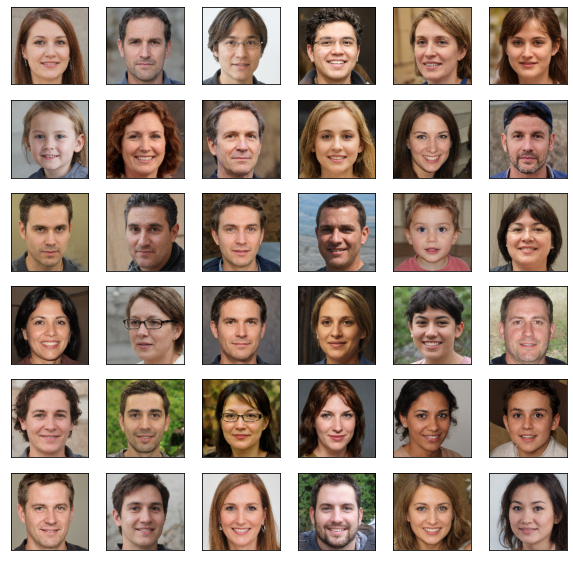

In [3]:
def plot_images(sqr = 5):
    plt.figure(figsize = (10,10))
    plt.title("Real Images",fontsize = 35)
    for i in range(sqr * sqr):
        plt.subplot(sqr,sqr,i+1)
        plt.imshow(_img[i]*0.5 + 0.5 )
        plt.xticks([])
        plt.yticks([])

# to plot images
plot_images(6)
    

Here, i have defined batch size so that these batches of images can be fed directly to the discriminator network

In [4]:
batch_size = 32
dataset=tf.data.Dataset.from_tensor_slices(np.array(_img)).batch(batch_size)

# Generator 
Here, I have defined generator network. It take random vector from normal distribution as input. This random vector is passed through dense layer and is reshaped and is finally fed through Convolution layers. Here, convolution layers does downsampling of our latent vector, after series of convolution batch normalization and leakyrelu layer our downsampled latent vector is upsampled using Conv2DTranspose.

The final output layer of Generator generate 128 by 128 by 3 image. The final layer of generator uses hyperbolic tangent as activation to squash the value in between -1 and 1. Generator model looks like simple autoencoder model, where input data is downsampled first and is finally upsampled .

In [5]:
latent_dim = 100
def Generator():
    model = tf.keras.Sequential()
    model.add(layers.Dense(128*128*3, use_bias=False, input_shape=(latent_dim,)))
    model.add(layers.Reshape((128,128,3)))
    # downsampling
    model.add(tf.keras.layers.Conv2D(128,4, strides=1, padding='same',kernel_initializer='he_normal', use_bias=False))
    model.add(tf.keras.layers.Conv2D(128,4, strides=2, padding='same',kernel_initializer='he_normal', use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Conv2D(256,4, strides=1, padding='same',kernel_initializer='he_normal', use_bias=False))
    model.add(tf.keras.layers.Conv2D(256,4, strides=2, padding='same',kernel_initializer='he_normal', use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Conv2DTranspose(512, 4, strides=1,padding='same',kernel_initializer='he_normal',use_bias=False))
    model.add(tf.keras.layers.Conv2D(512,4, strides=2, padding='same',kernel_initializer='he_normal', use_bias=False))
    
    model.add(tf.keras.layers.LeakyReLU())
    #upsampling
    model.add(tf.keras.layers.Conv2DTranspose(512, 4, strides=1,padding='same',kernel_initializer='he_normal',use_bias=False))
    model.add(tf.keras.layers.Conv2DTranspose(512, 4, strides=2,padding='same',kernel_initializer='he_normal',use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Conv2DTranspose(256, 4, strides=1,padding='same',kernel_initializer='he_normal',use_bias=False))
    model.add(tf.keras.layers.Conv2DTranspose(256, 4, strides=2,padding='same',kernel_initializer='he_normal',use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    
    model.add(tf.keras.layers.Conv2DTranspose(128, 4, strides=2,padding='same',kernel_initializer='he_normal',use_bias=False))
    model.add(tf.keras.layers.Conv2DTranspose(128, 4, strides=1,padding='same',kernel_initializer='he_normal',use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2DTranspose(3,4,strides = 1, padding = 'same',activation = 'tanh'))
    
    

    return model

In [6]:
generator = Generator()
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 49152)             4915200   
_________________________________________________________________
reshape (Reshape)            (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 128, 128)     6144      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 128)       262144    
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 128)       512       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 256)       5

# Discriminator
Here, discriminator model take 128 by 128 by 3 image that can be real or generated. This input image is downsampled using Convolution layer and is finally flattened and is fed to single neuron so that it can distinguish real and fake image. Since, final layer uses sigmoid function as activation, it output value in between 0 and 1. Here value greater than 0.5 refers to real and less than 0.5 refers to fake image. The output of discriminator is used in training of generator.

In [7]:
def Discriminator():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input((SIZE, SIZE, 3)))
    model.add(tf.keras.layers.Conv2D(128,4, strides=2, padding='same',kernel_initializer='he_normal', use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Conv2D(128,4, strides=2, padding='same',kernel_initializer='he_normal', use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Conv2D(256,4, strides=2, padding='same',kernel_initializer='he_normal', use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Conv2D(256,4, strides=2, padding='same',kernel_initializer='he_normal', use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Conv2D(512,4, strides=2, padding='same',kernel_initializer='he_normal', use_bias=False))
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1,activation = 'sigmoid'))
    return model
  


In [8]:
discriminator = Discriminator()
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 64, 64, 128)       6144      
_________________________________________________________________
batch_normalization_5 (Batch (None, 64, 64, 128)       512       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 128)       262144    
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 128)       512       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 256)      

### Let's plot image generated by generator before training

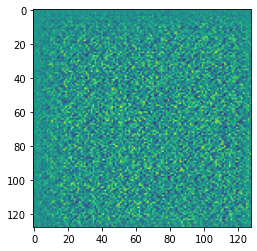

In [9]:
noise = np.random.normal(-1,1,(1,100))
img = generator(noise)
plt.imshow(img[0,:,:,0])
plt.show()

### Defining loss function and optimizer 

In [10]:
optimizer = tf.keras.optimizers.RMSprop(
        lr=.0001,
        clipvalue=1.0,
        decay=1e-8
    )
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits = True)

In [11]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output),fake_output)
def discriminator_loss(fake_output, real_output):
    fake_loss = cross_entropy(tf.zeros_like(fake_output),fake_output)
    real_loss = cross_entropy(tf.ones_like(real_output),real_output)
    return fake_loss + real_loss

In [12]:
### Defining training steps

def train_steps(images):
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise)
        fake_output = discriminator(generated_images)
        real_output = discriminator(images)

        gen_loss = generator_loss(fake_output)
        dis_loss = discriminator_loss(fake_output, real_output)

    gradient_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradient_of_discriminator = disc_tape.gradient(dis_loss, discriminator.trainable_variables)

    optimizer.apply_gradients(zip(gradient_of_generator, generator.trainable_variables))
    optimizer.apply_gradients(zip(gradient_of_discriminator, discriminator.trainable_variables))

    return {'gen loss': gen_loss, 'disc loss': dis_loss}

# Save model and generate images
def save_model_and_generate_images(generator, epoch, save_path="/kaggle/working/generated_images"):
    if not os.path.exists(save_path):
        os.makedirs(save_path)

    generator.save(f"/kaggle/working/generator_epoch_{epoch}.h5")

    square = 5
    plt.figure(figsize=(10, 10))
    for i in range(square * square):
        noise = np.random.normal(0, 1, (1, latent_dim))
        img = generator(noise)
        plt.subplot(square, square, i + 1)
        plt.imshow(np.clip((img[0, ...] + 1) / 2, 0, 1))
        plt.axis('off')
    plt.suptitle(f"Generated Images at Epoch {epoch}", fontsize=16)
    plt.savefig(f"{save_path}/generated_images_epoch_{epoch}.png")
    plt.close()

# Train function
def train(epochs, dataset, save_interval=5):
    for epoch in range(1, epochs + 1):
        start = time.time()
        print(f"\nEpoch: {epoch}")
        for images in dataset:
            loss = train_steps(images)

        print(f"Time: {np.round(time.time() - start, 2)} seconds")
        print(f"Generator Loss: {loss['gen loss']}, Discriminator Loss: {loss['disc loss']}")

        if epoch % save_interval == 0:
            save_model_and_generate_images(generator, epoch)

# Train the model
train(100, dataset)


Epoch: 1


Time: 259.68 seconds


Generator Loss: 0.5397189259529114, Discriminator Loss: 1.3778784275054932

Epoch: 2


Time: 257.6 seconds


Generator Loss: 0.49576449394226074, Discriminator Loss: 1.5558196306228638

Epoch: 3


Time: 257.54 seconds


Generator Loss: 0.7623632550239563, Discriminator Loss: 1.2083044052124023

Epoch: 4


Time: 257.57 seconds


Generator Loss: 1.0087417364120483, Discriminator Loss: 1.299850344657898

Epoch: 5


Time: 257.5 seconds


Generator Loss: 0.434823215007782, Discriminator Loss: 1.3602337837219238



Epoch: 6


Time: 257.58 seconds


Generator Loss: 0.6862908601760864, Discriminator Loss: 1.2056277990341187

Epoch: 7


Time: 257.52 seconds


Generator Loss: 0.7880545258522034, Discriminator Loss: 1.005230188369751

Epoch: 8


Time: 257.55 seconds


Generator Loss: 0.476944237947464, Discriminator Loss: 1.1300873756408691

Epoch: 9


Time: 257.57 seconds


Generator Loss: 0.6839771270751953, Discriminator Loss: 0.953018307685852

Epoch: 10


Time: 257.47 seconds


Generator Loss: 0.44618499279022217, Discriminator Loss: 1.2252929210662842



Epoch: 11


Time: 257.5 seconds


Generator Loss: 1.4456777572631836, Discriminator Loss: 0.7006291151046753

Epoch: 12


Time: 257.45 seconds


Generator Loss: 0.8084598779678345, Discriminator Loss: 0.7996140122413635

Epoch: 13


Time: 257.52 seconds


Generator Loss: 0.6365436911582947, Discriminator Loss: 0.8804382085800171

Epoch: 14


Time: 257.54 seconds


Generator Loss: 1.4845643043518066, Discriminator Loss: 0.5623766779899597

Epoch: 15


Time: 257.66 seconds


Generator Loss: 1.2204645872116089, Discriminator Loss: 0.5513366460800171



Epoch: 16


Time: 257.46 seconds


Generator Loss: 0.8194733262062073, Discriminator Loss: 0.676277756690979

Epoch: 17


Time: 257.49 seconds


Generator Loss: 0.5597758293151855, Discriminator Loss: 0.9455586671829224

Epoch: 18


Time: 257.52 seconds


Generator Loss: 0.7624572515487671, Discriminator Loss: 0.742735743522644

Epoch: 19


Time: 257.4 seconds


## function to plot generated images


In [ ]:
def plot_generated_images(square = 5, epochs = 0):
    
    
  plt.figure(figsize = (10,10))
  for i in range(square * square):
    if epochs != 0:    
        if(i == square //2):
            plt.title("Generated Image at Epoch:{}\n".format(epochs), fontsize = 32, color = 'black')
    plt.subplot(square, square, i+1)
    noise = np.random.normal(0,1,(1,latent_dim))
    img = generator(noise)
    plt.imshow(np.clip((img[0,...]+1)/2, 0, 1))
    
    plt.xticks([])
    plt.yticks([])
    plt.grid()

## Training

# Some Generated Images


In [ ]:
plot_generated_images(1)

In [ ]:
plot_generated_images(2)

In [ ]:
plot_generated_images(5)

In [ ]:
plot_generated_images(7)

In [ ]:
generator.save('generatorlast.h5')
discriminator.save("discriminatorlast.h5")